<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/rl/dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQN on OpenAI


## Step 1: Installation for Colab - just execute these cells and do not worry too much

* http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb 
* https://docs.microsoft.com/en-us/message-passing-interface/microsoft-mpi
* https://nyu-cds.github.io/python-mpi/setup/
* https://medium.com/@kaleajit27/reinforcement-learning-on-google-colab-9cb2e1ef51e


In [0]:
# !apt-get install python-opengl -y  >/dev/null
# !apt install xvfb -y >/dev/null

In [0]:
# !pip install pyvirtualdisplay >/dev/null
# !pip install piglet >/dev/null

In [3]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1057'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1057'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
# !pip install git+https://github.com/openai/baselines >/dev/null
# !pip install gym >/dev/null

In [0]:
# !pip install JSAnimation >/dev/null

In [0]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 144)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='once'))

## Step 2: Deep Q Network

* https://github.com/openai/baselines
* https://github.com/openai/baselines/tree/master/baselines/deepq
* https://github.com/openai/baselines/blob/master/baselines/deepq/experiments/train_cartpole.py
* https://github.com/openai/baselines/blob/master/docs/viz/viz.ipynb


In [0]:
!rm -r /content/logs/dqn

In [8]:
%env OPENAI_LOGDIR=/content/logs/dqn
# %env OPENAI_LOG_FORMAT=csv

env: OPENAI_LOGDIR=/content/logs/dqn


In [9]:
%env

{'CLICOLOR': '1',
 'CLOUDSDK_CONFIG': '/content/.config',
 'COLAB_GPU': '1',
 'CUDA_PKG_VERSION': '9-2=9.2.148-1',
 'CUDA_VERSION': '9.2.148',
 'CUDNN_VERSION': '7.4.1.5',
 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}',
 'DEBIAN_FRONTEND': 'noninteractive',
 'DISPLAY': ':1057',
 'ENV': '/root/.bashrc',
 'GIT_PAGER': 'cat',
 'GLIBCPP_FORCE_NEW': '1',
 'GLIBCXX_FORCE_NEW': '1',
 'HOME': '/root',
 'HOSTNAME': '8c99bec65f40',
 'JPY_PARENT_PID': '64',
 'LANG': 'en_US.UTF-8',
 'LD_LIBRARY_PATH': '/usr/lib64-nvidia',
 'LD_PRELOAD': '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
 'NCCL_VERSION': '2.3.7',
 'NVIDIA_DRIVER_CAPABILITIES': 'compute,utility',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=9.2',
 'NVIDIA_VISIBLE_DEVICES': 'all',
 'OLDPWD': '/',
 'OPENAI_LOGDIR': '/content/logs/dqn',
 'PAGER': 'cat',
 'PATH': '/usr/local/bin:/usr/local/nvidia/bin:/us

In [10]:
import gym
from baselines import deepq

env = gym.make("MsPacman-v0")

# https://en.wikipedia.org/wiki/Q-learning#Influence_of_variables
# %time model = deepq.learn(\
#         env,\
#         seed=42,\                          
#         network='mlp',\
#         lr=1e-3,\
#         total_timesteps=100000,\
#         buffer_size=50000,\
#         exploration_fraction=0.1,\
#         exploration_final_eps=0.02,\
#         print_freq=10)

%time model = deepq.learn(\
        env,\
        seed=42,\
        network='cnn',\
        lr=1e-3,\
        total_timesteps=50000,\
        buffer_size=50000,\
        exploration_fraction=0.5,\
        exploration_final_eps=0.02,\
        print_freq=10)

Logging to /content/logs/dqn


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


--------------------------------------
| % time spent exploring  | 78       |
| episodes                | 10       |
| mean 100 episode reward | 197      |
| steps                   | 5395     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 53       |
| episodes                | 20       |
| mean 100 episode reward | 237      |
| steps                   | 11899    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 28       |
| episodes                | 30       |
| mean 100 episode reward | 248      |
| steps                   | 18252    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 40       |
| mean 100 episode reward | 300      |
| steps                   | 25258    |
--------------------------------------
--------------------------------------
| % time spent exploring 

In [0]:
# from baselines.common import plot_util as pu
# results = pu.load_results('/content/logs/dqn')

In [0]:
# import matplotlib.pyplot as plt
# import numpy as np
# r = results[0]
# plt.plot(r.progress.total_timesteps, r.progress.eprewmean)

In [13]:
import numpy as np 

observation = env.reset()

state = np.zeros((1, 2*128))
dones = np.zeros((1))

frames = []
cumulated_reward = 0

for t in range(1000):
    frames.append(env.render(mode = 'rgb_array'))
    actions, _, state, _ = model.step(observation, S=state, M=dones)
    observation, reward, done, info = env.step(actions)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
env.close()

Episode finished after 642 timesteps, accumulated reward = 310.0



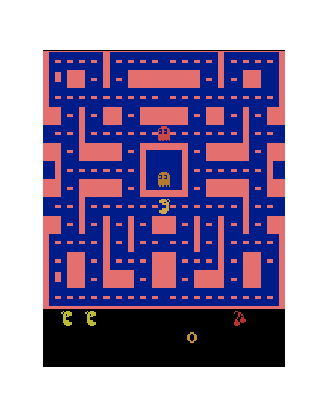
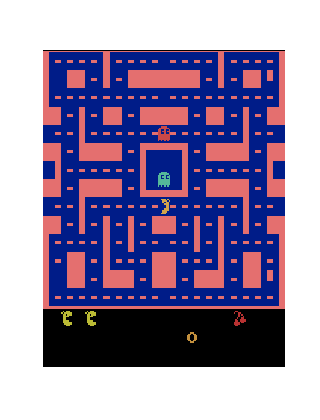
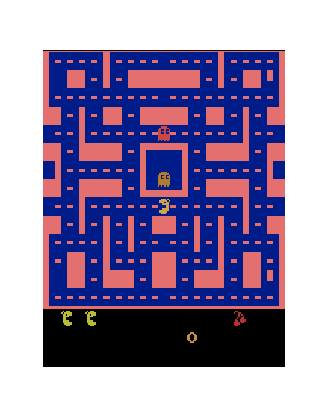
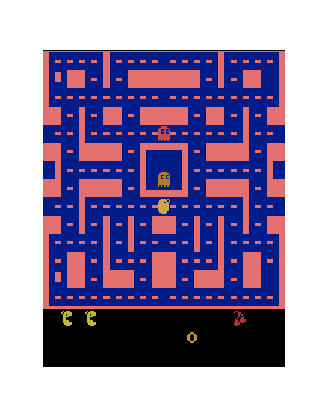
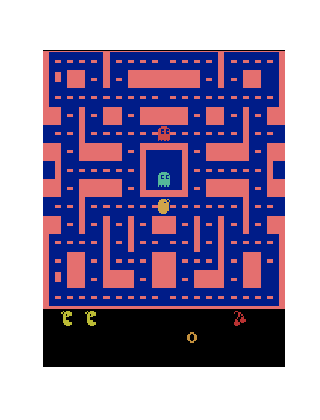
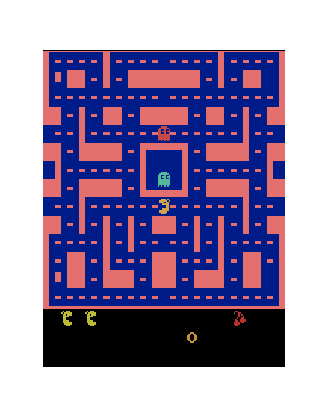
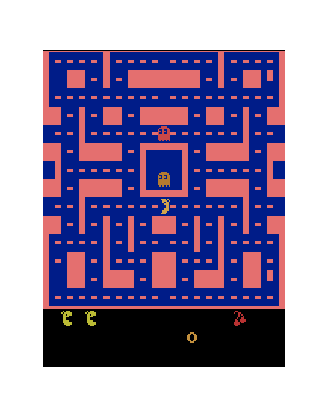
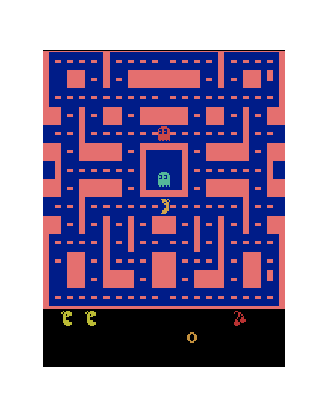
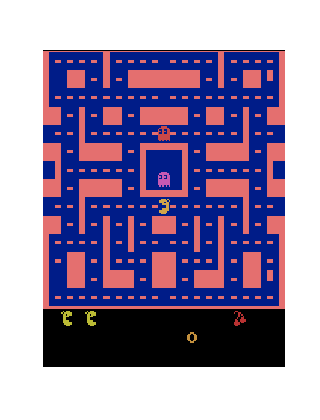
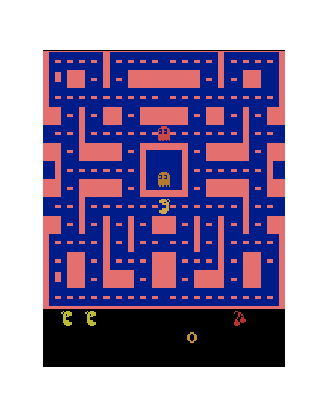
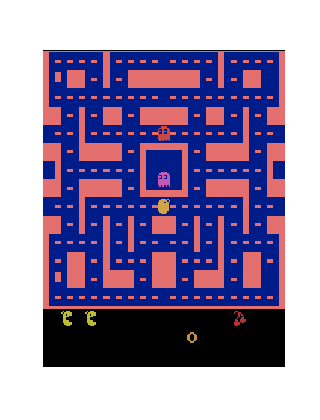
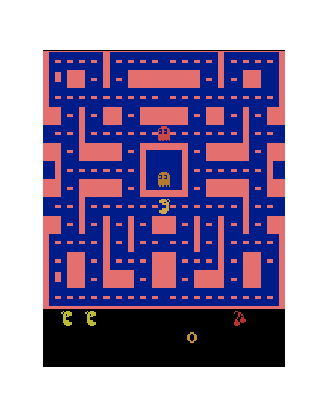
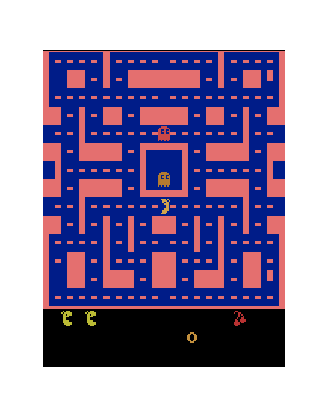
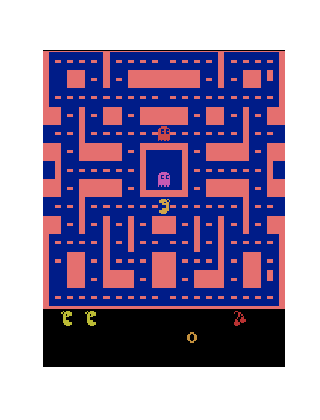
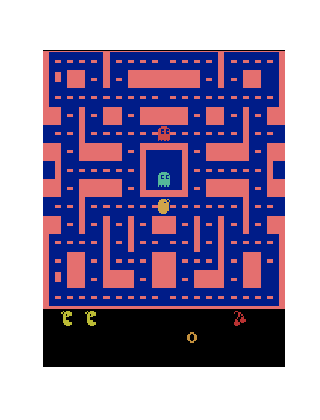
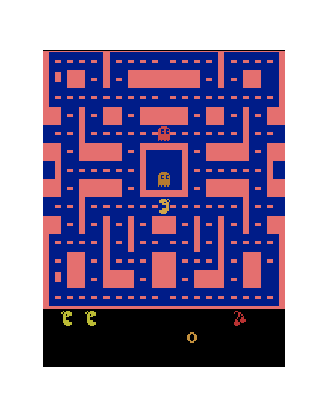
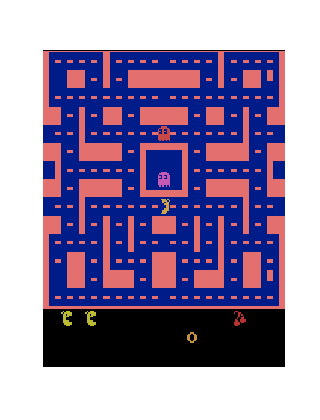
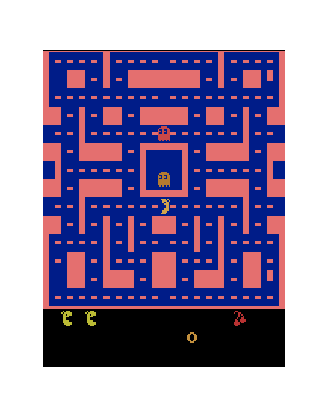
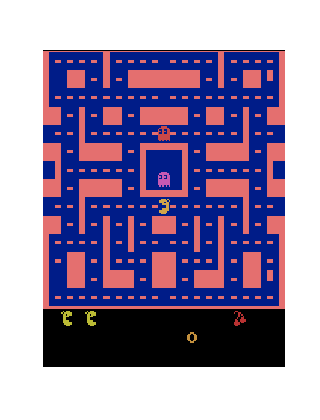
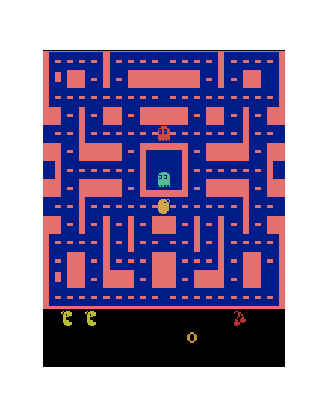
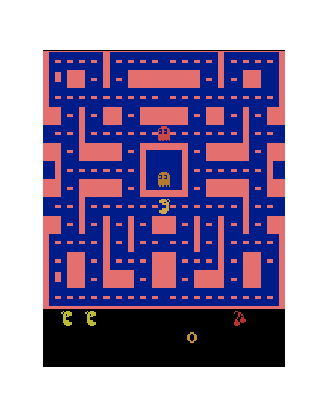
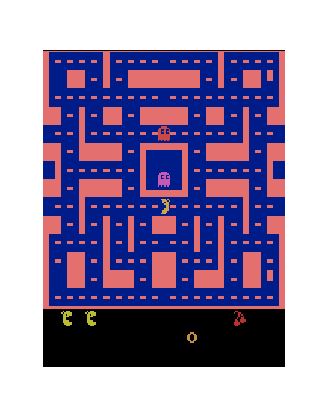
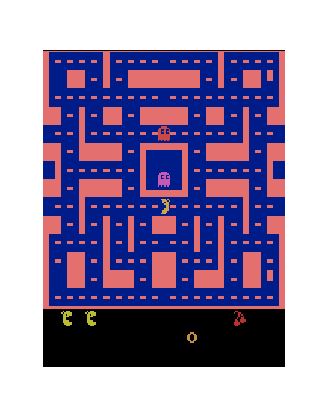
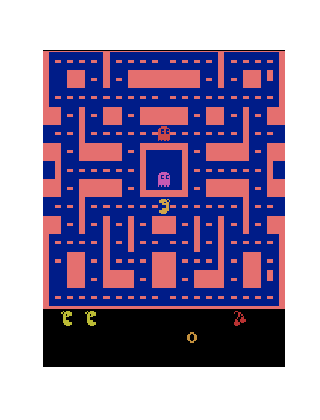
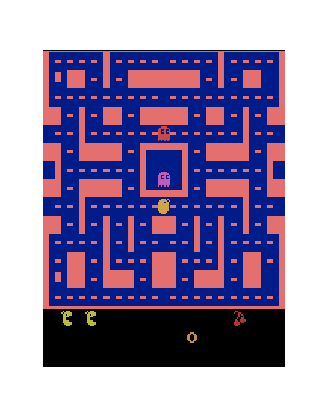
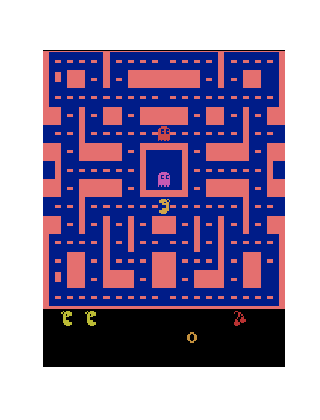
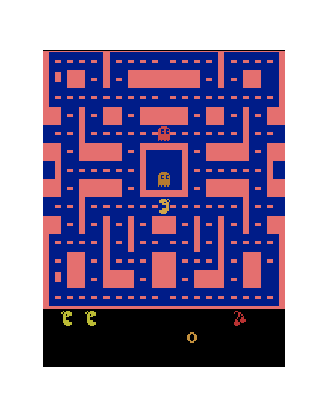
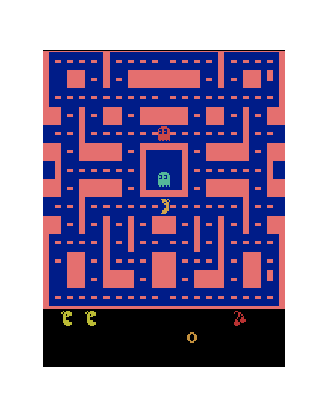
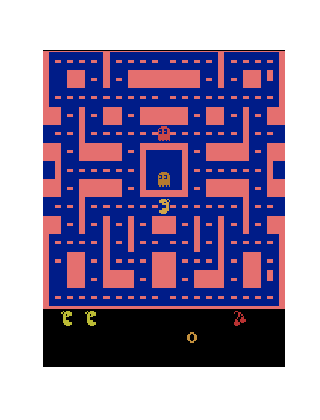
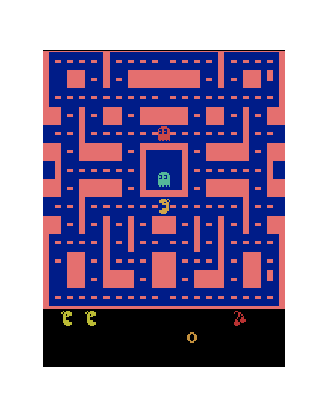
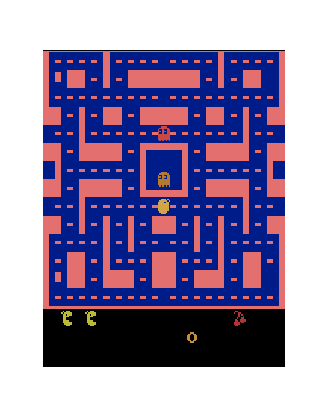
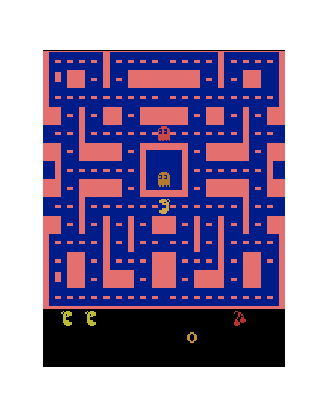
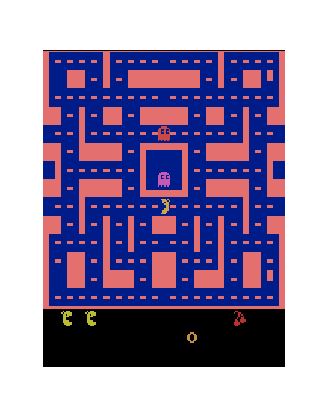
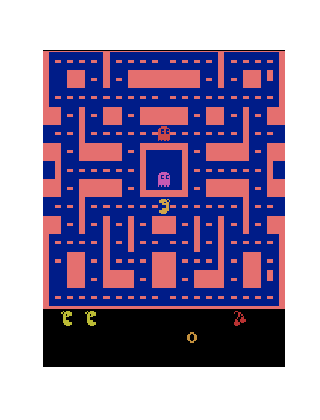
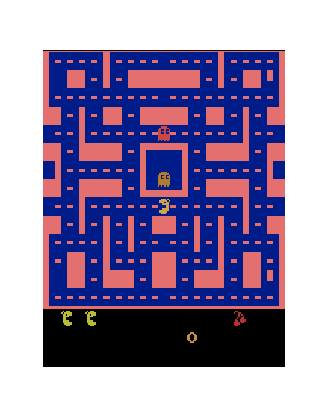
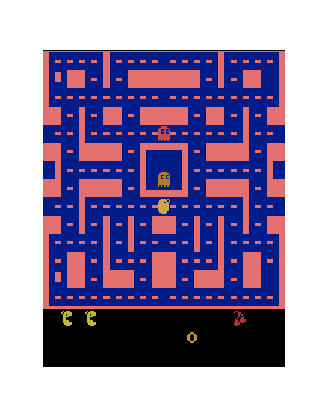
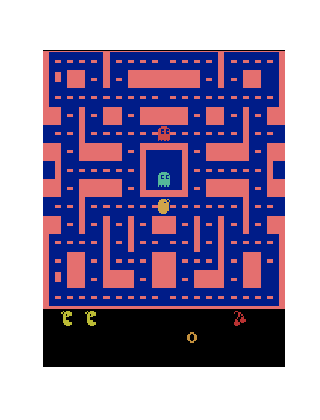
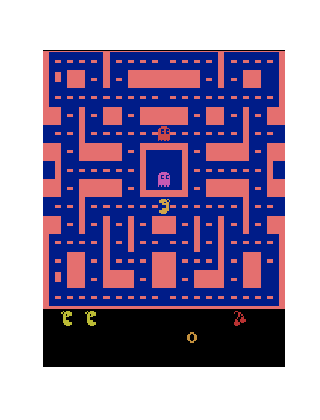
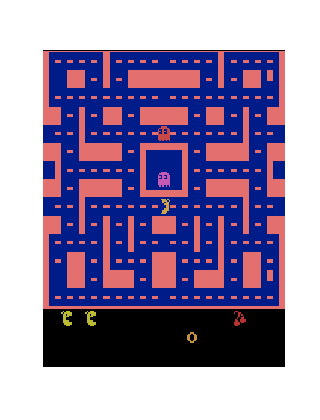
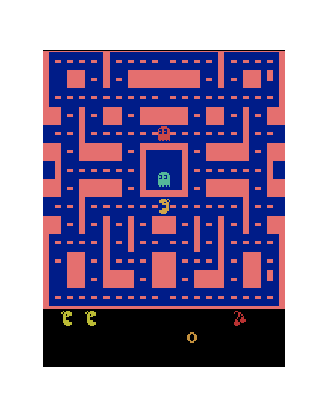
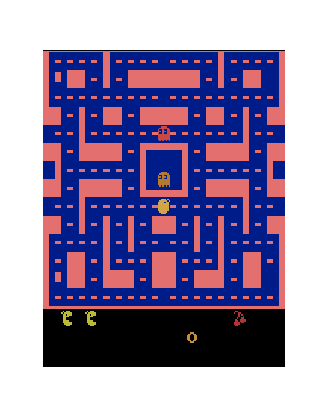
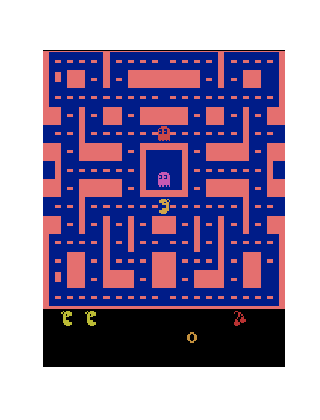
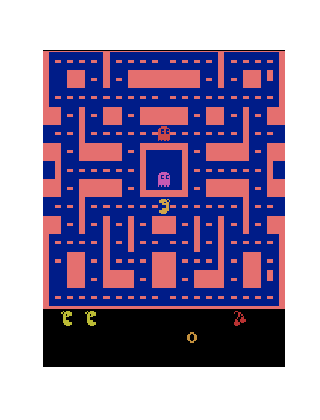
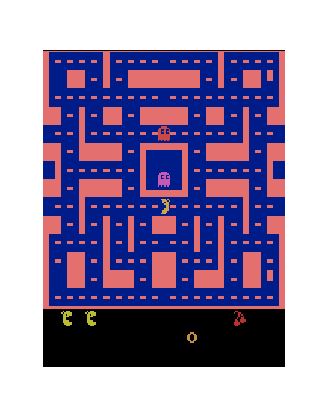
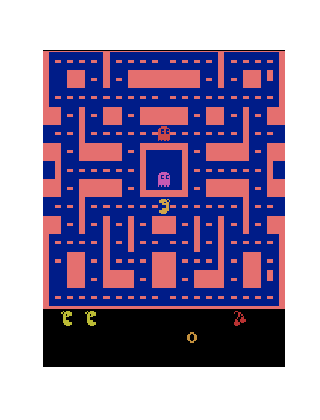
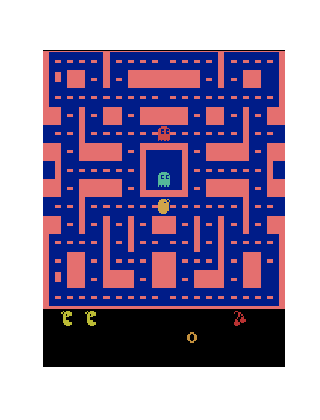
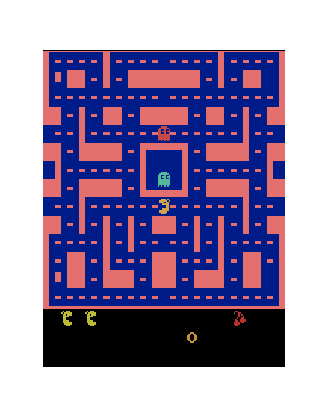
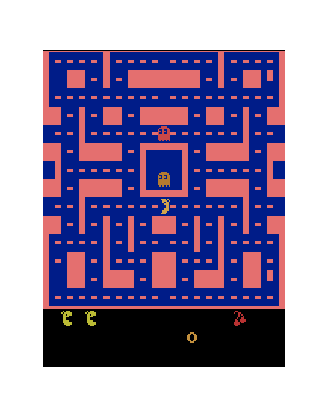
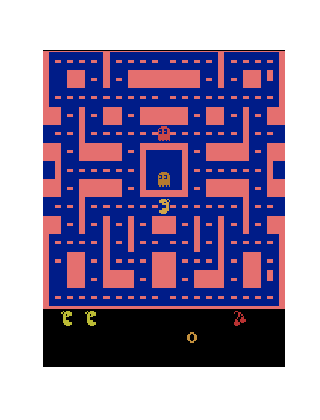
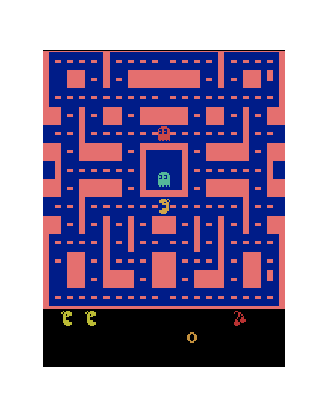
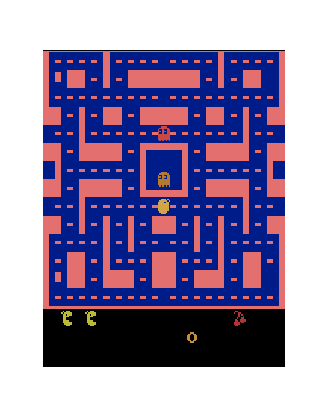
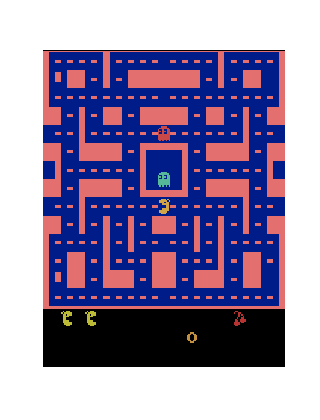
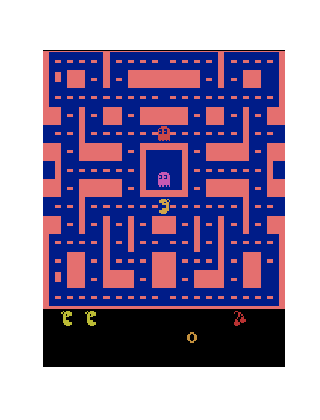
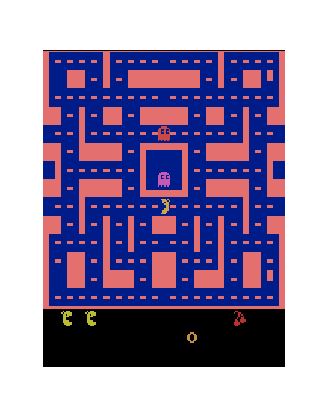
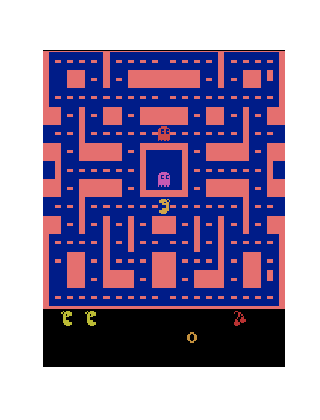
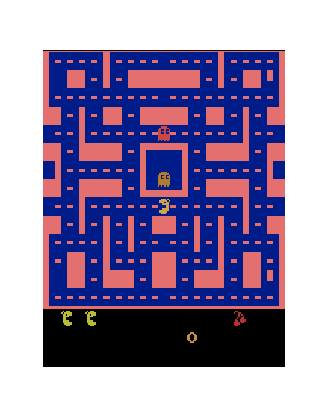
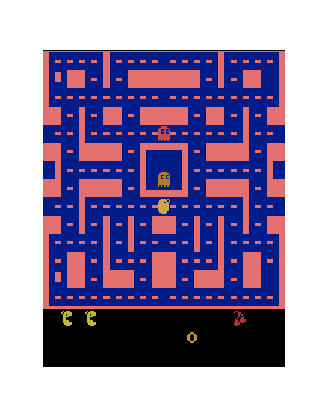
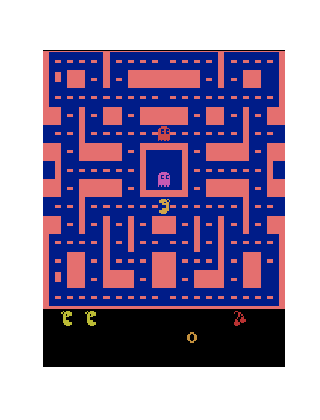
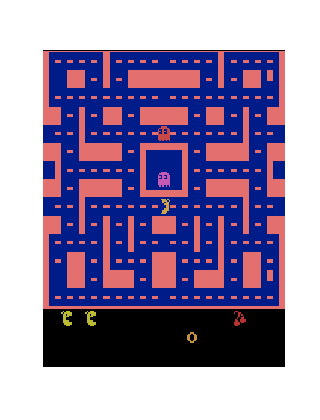
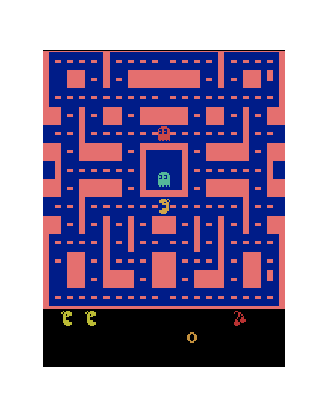
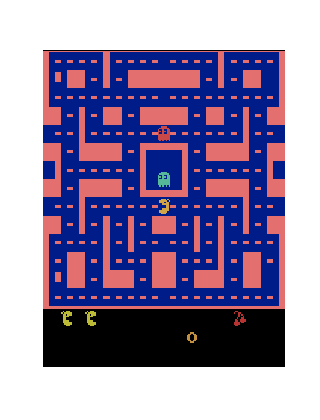
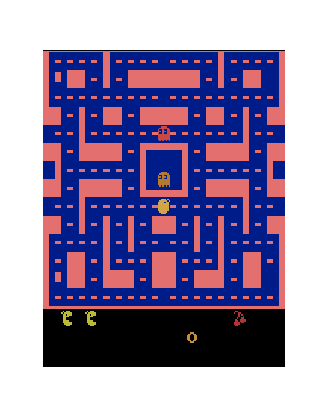
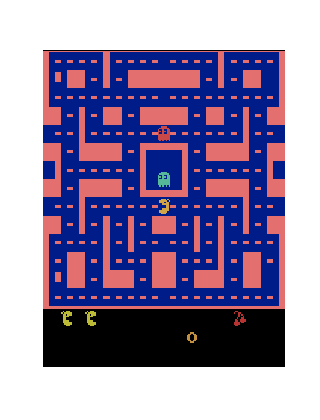
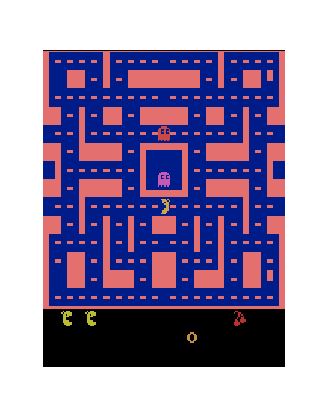
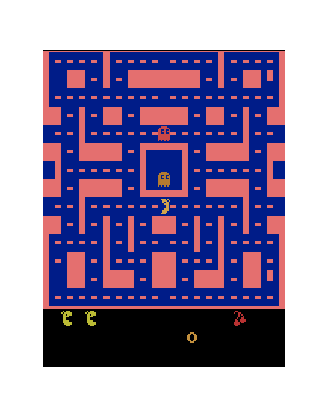
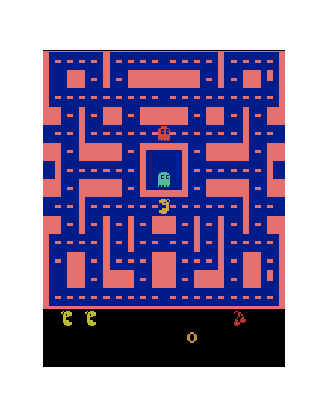
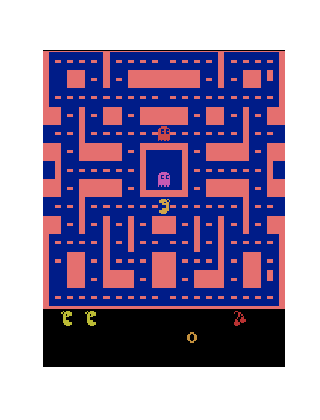
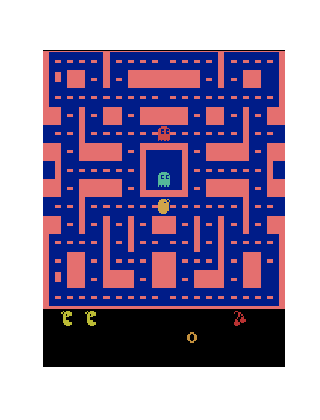
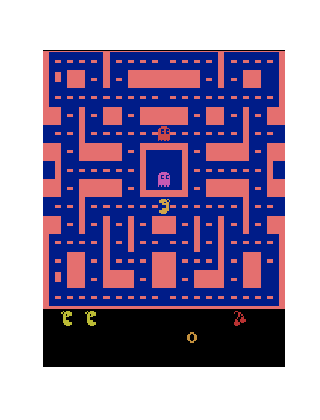
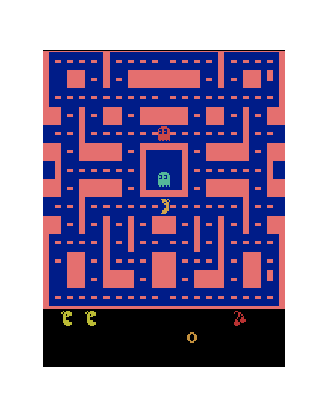
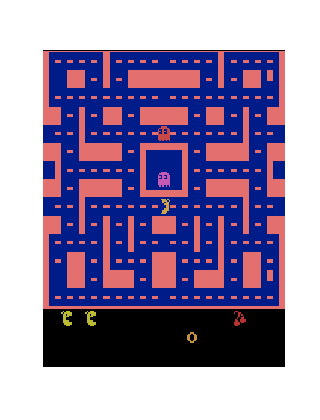
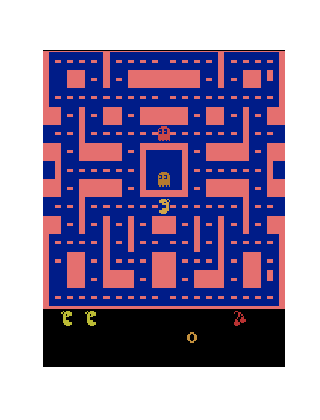
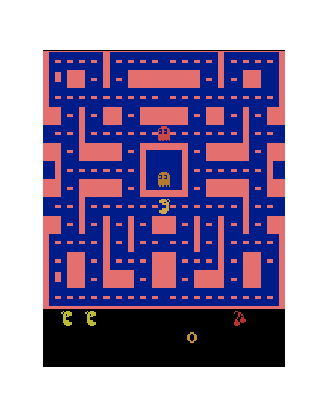
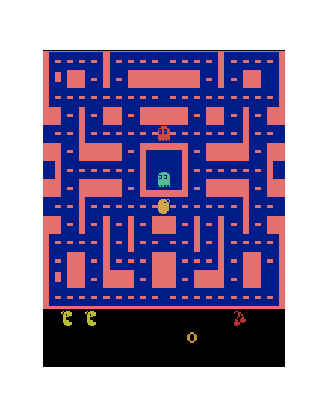
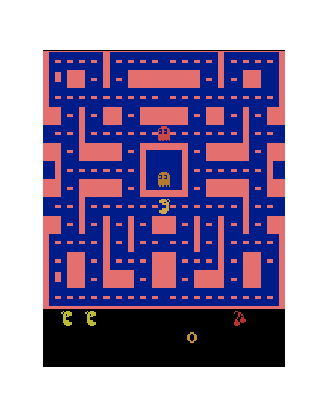
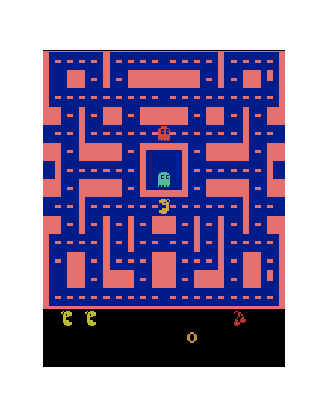
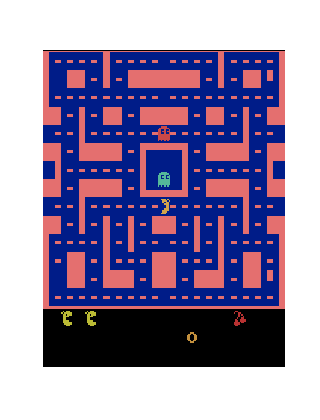
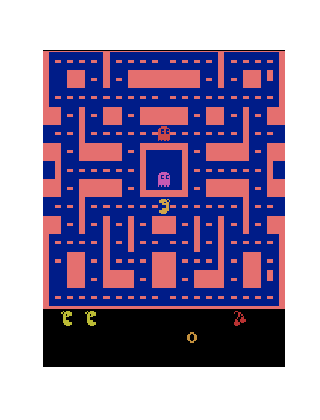
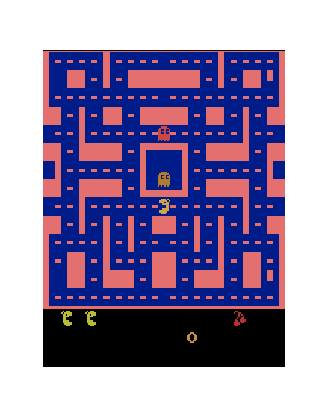
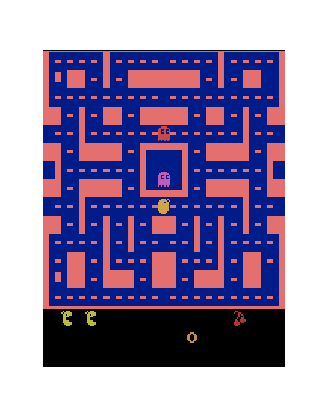
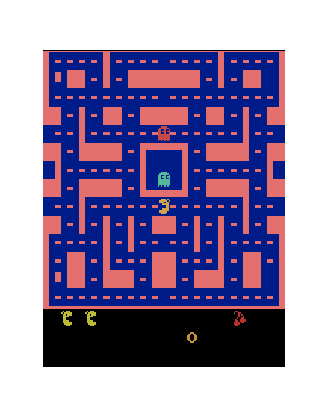
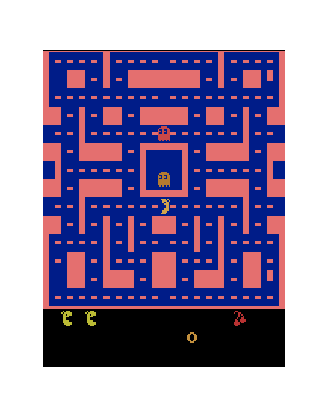
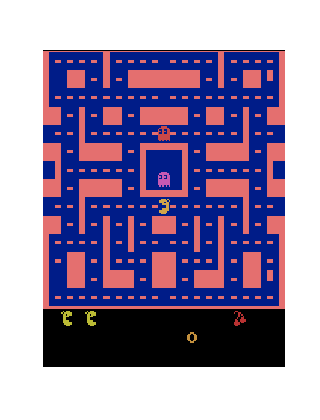
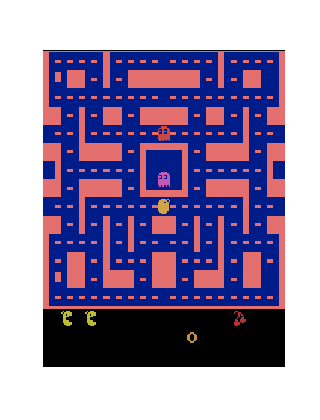
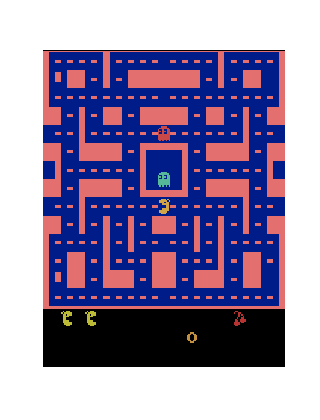
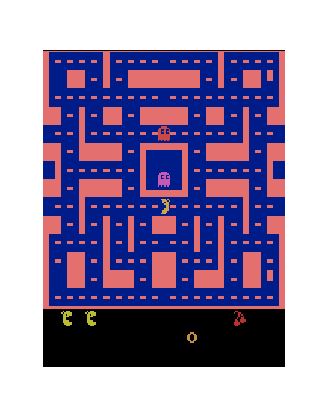
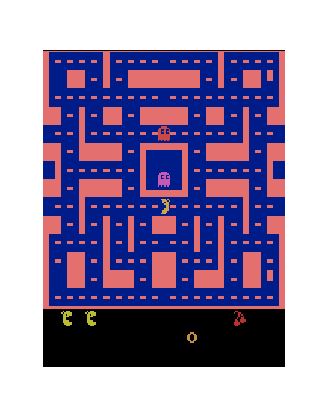
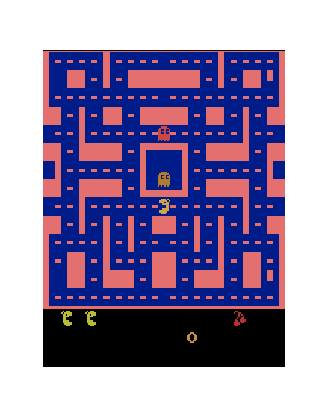
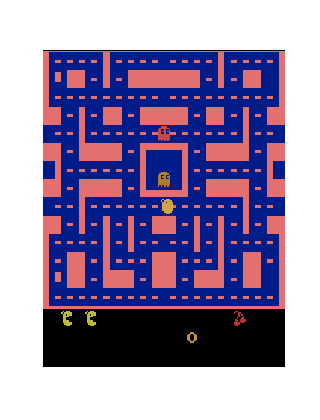
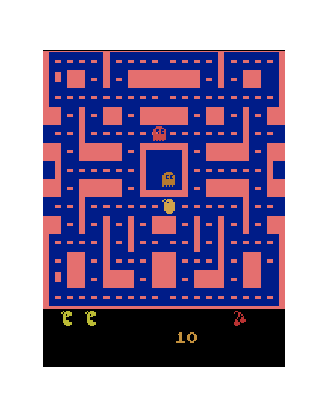
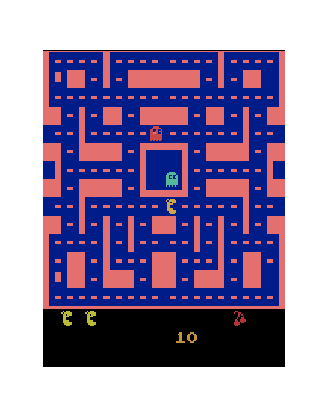
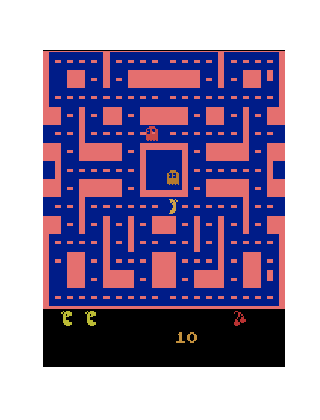
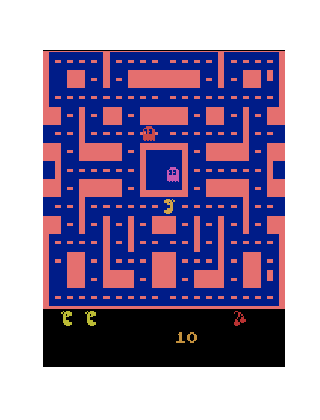
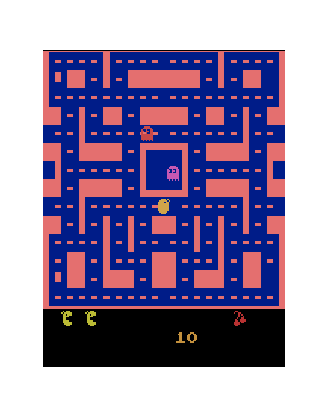
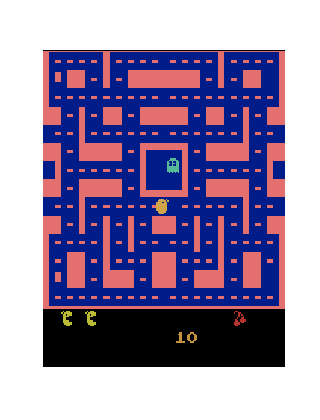
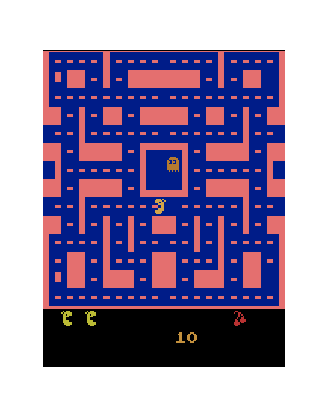
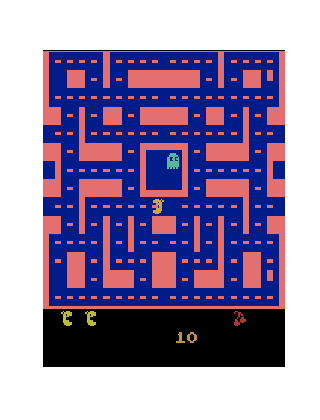
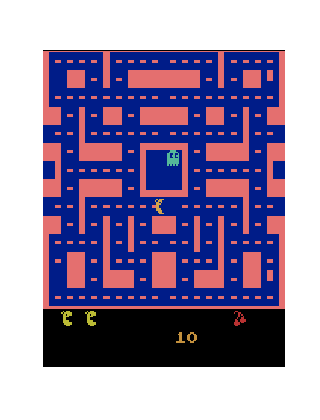
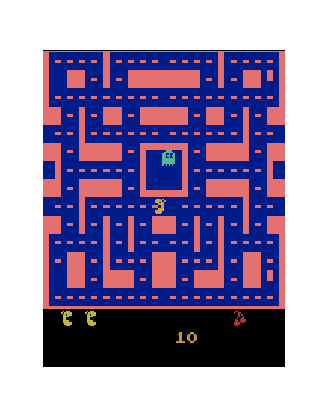
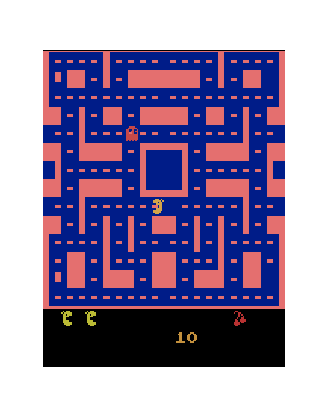
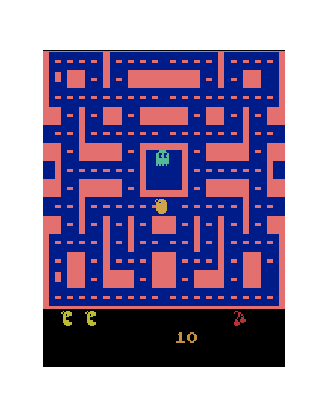
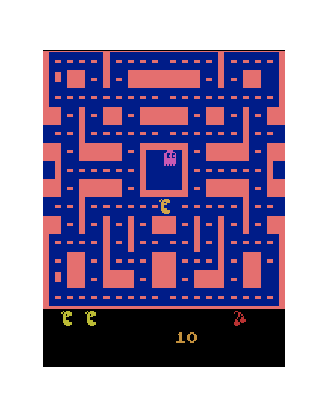
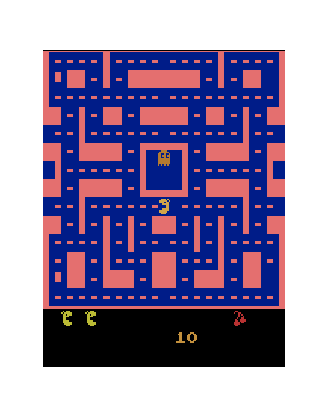
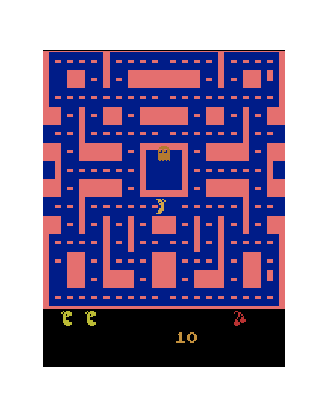
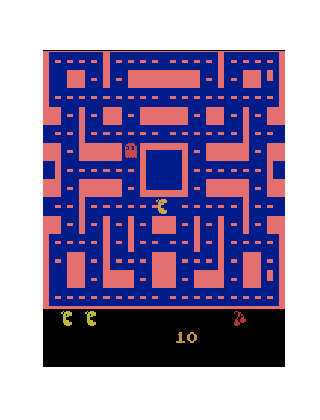
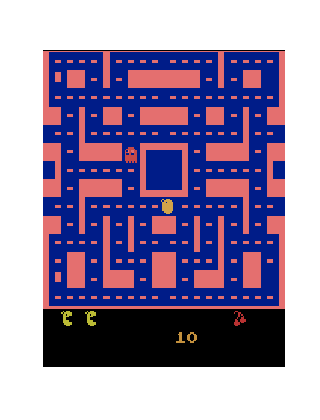
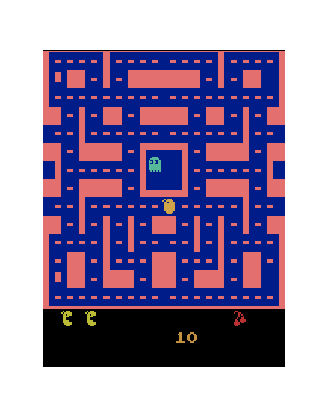
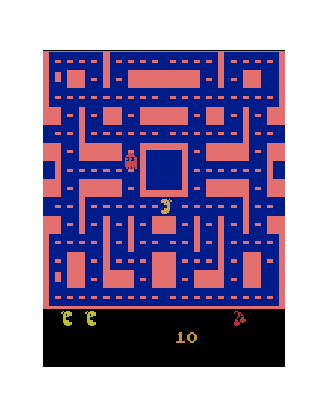
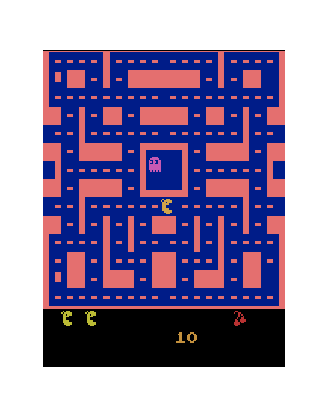
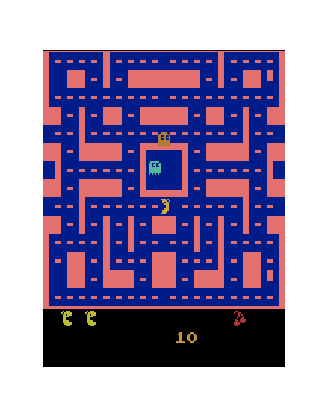
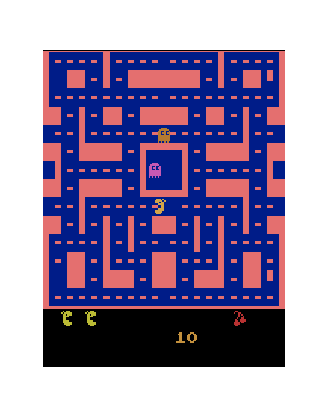
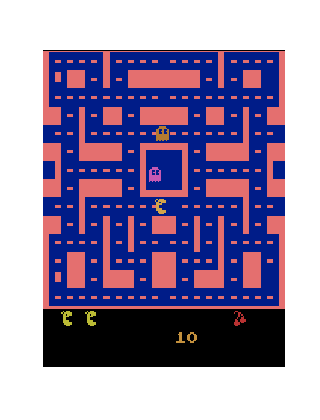
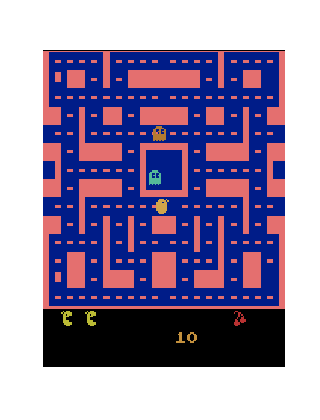
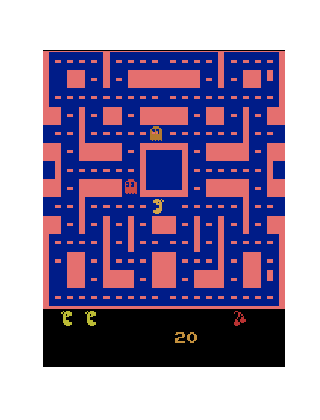
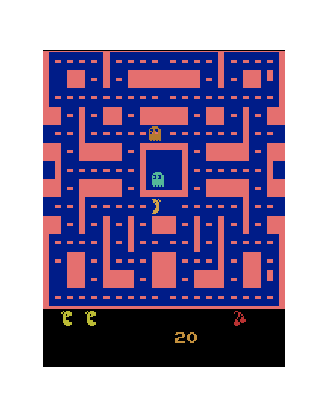
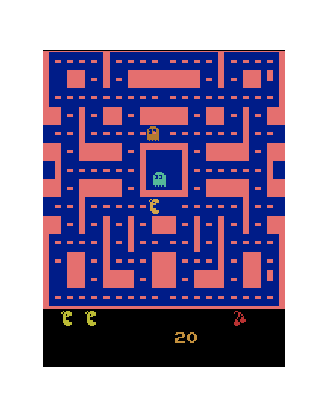
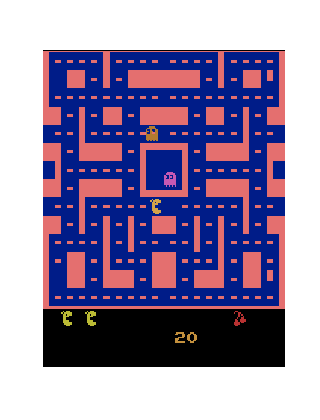
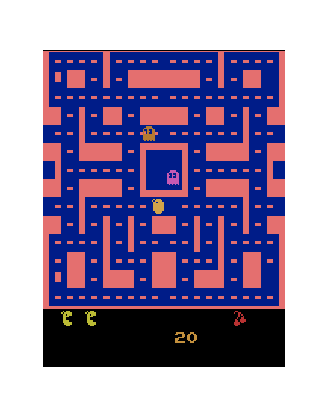
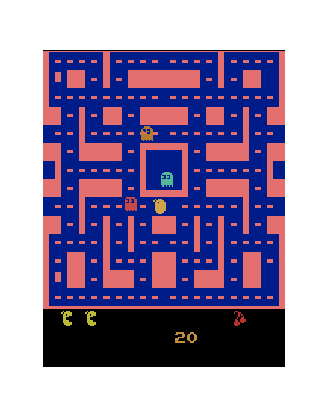
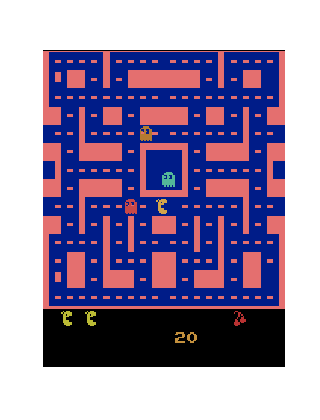
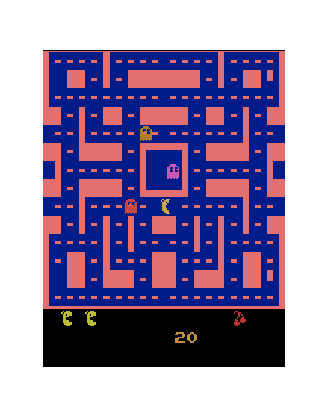
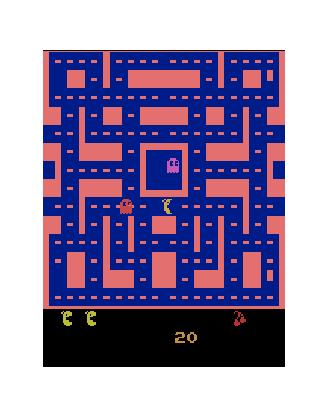
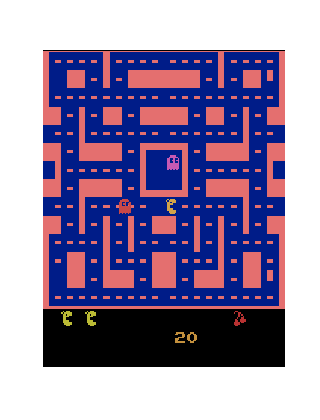
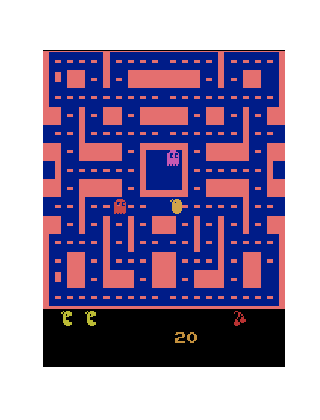
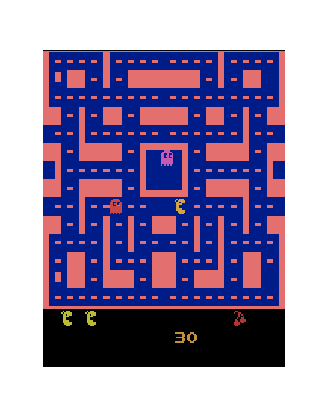
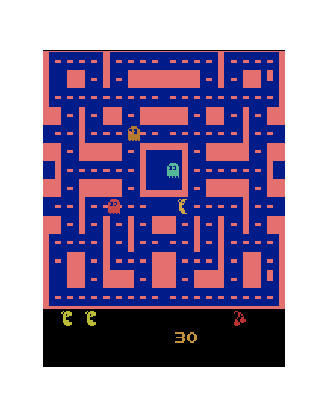
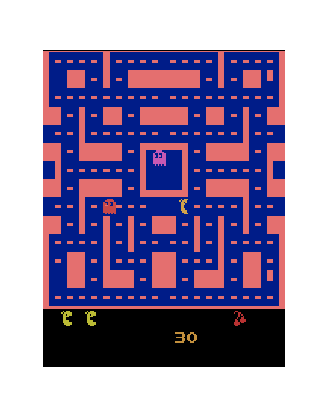
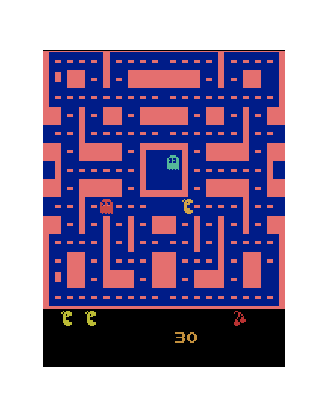
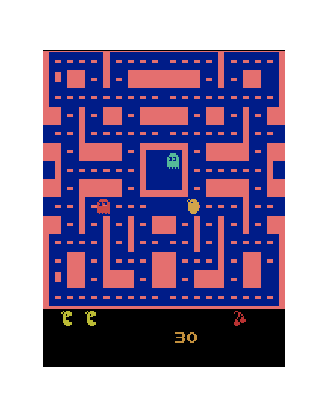
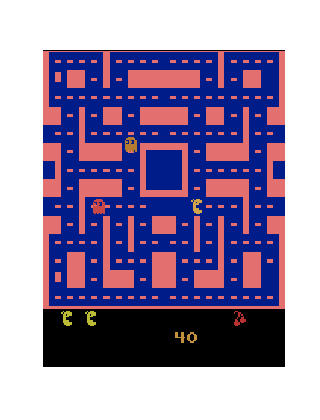
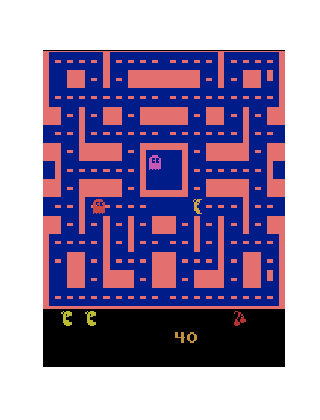
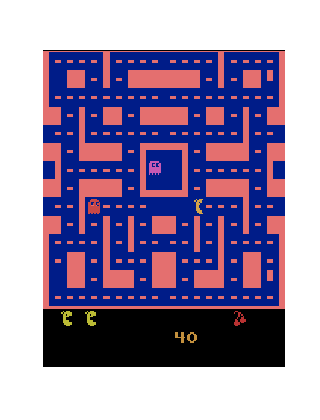
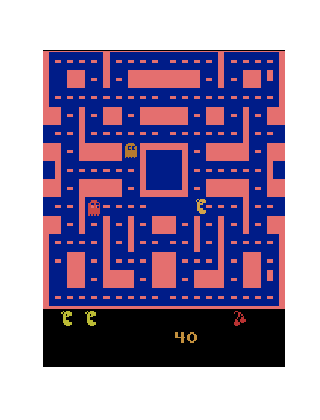
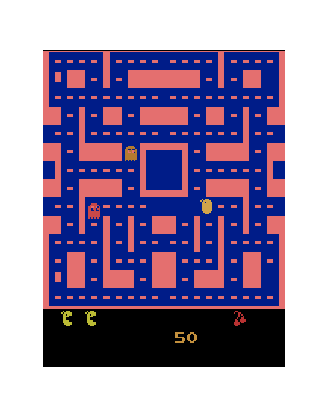
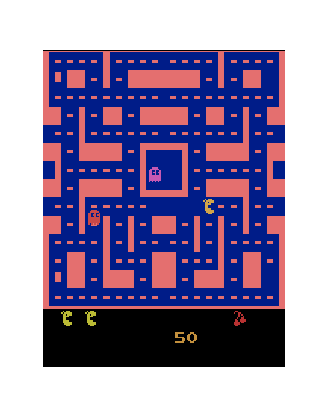
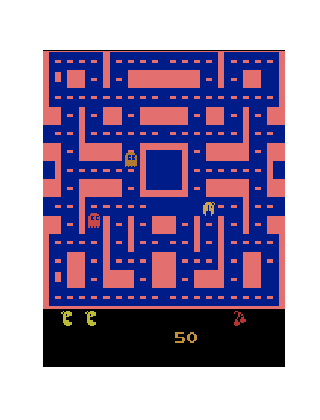
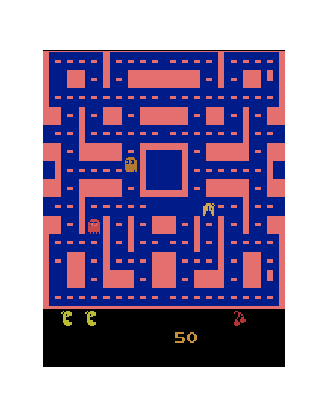
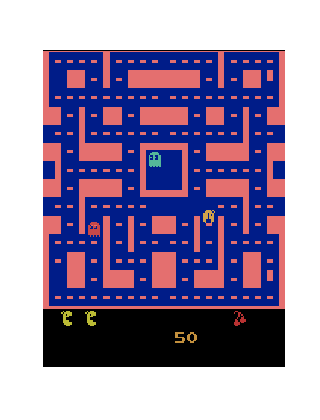
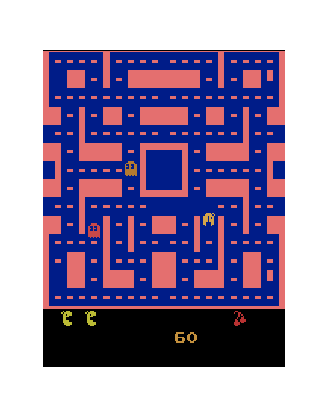
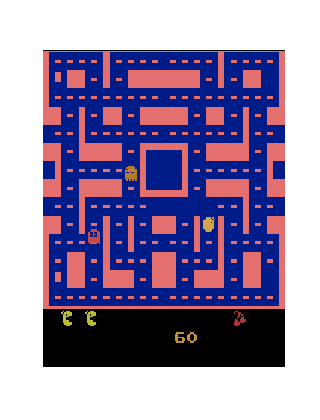
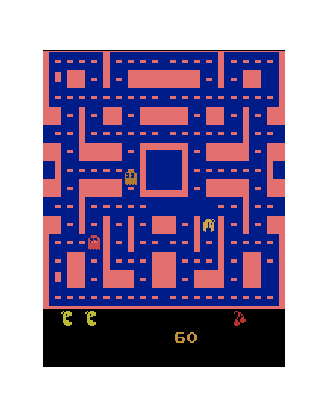
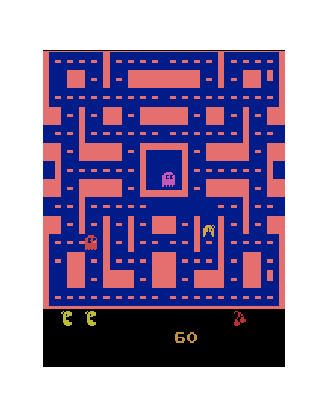
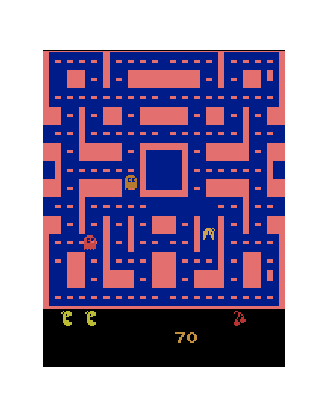
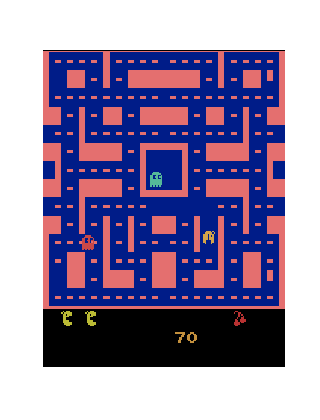
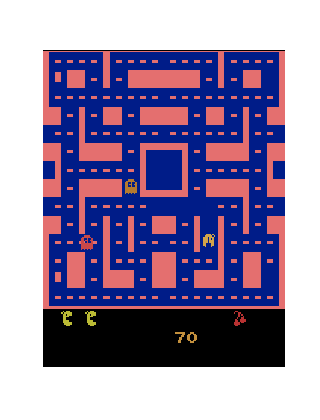
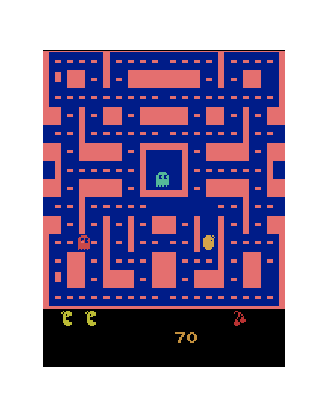
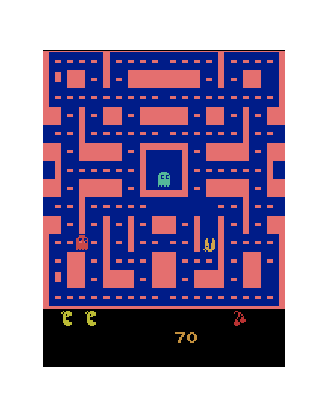
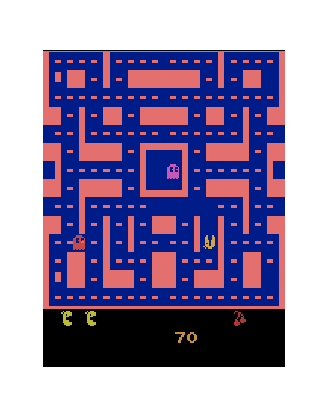
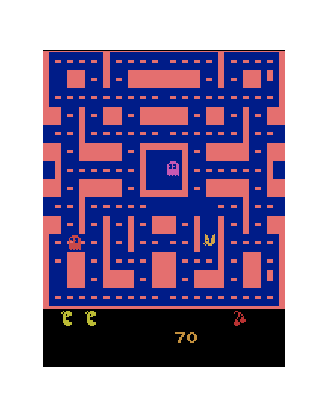
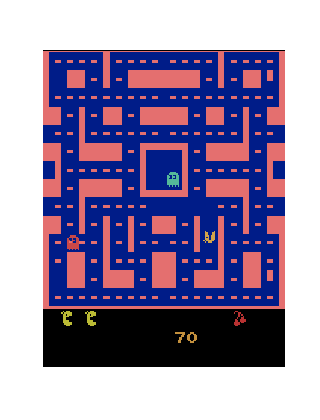
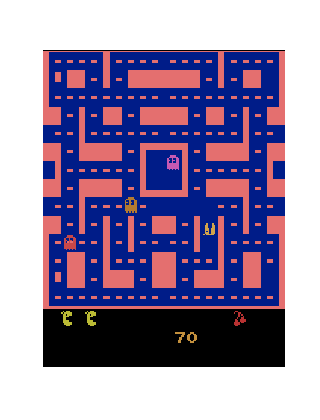
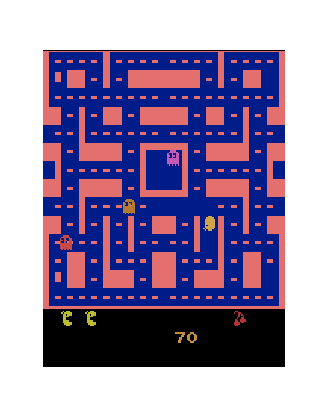
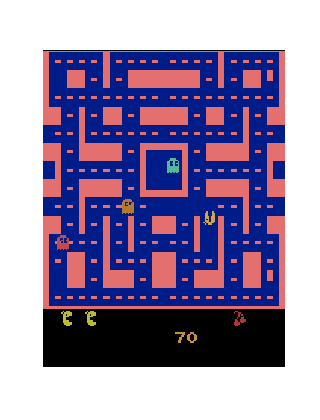
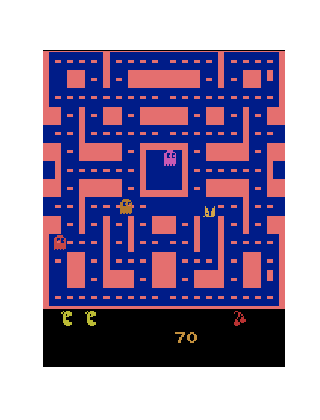
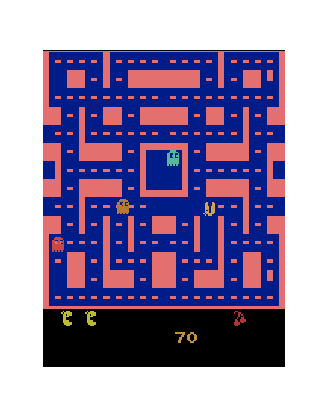
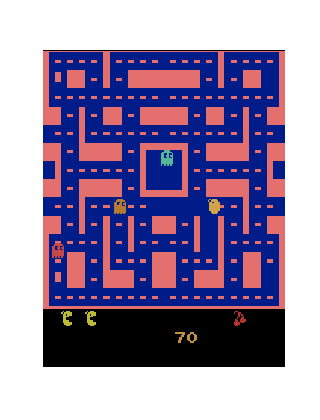
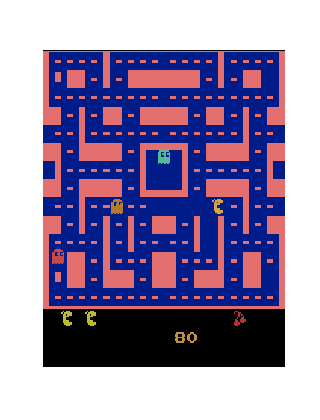
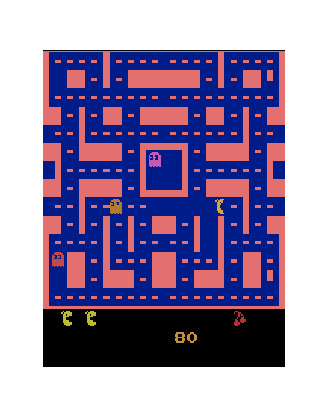
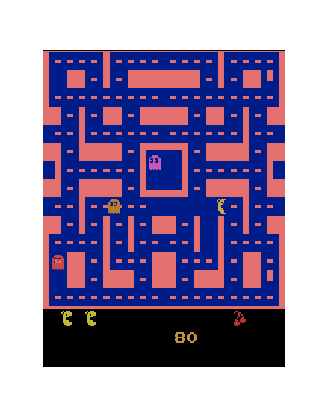
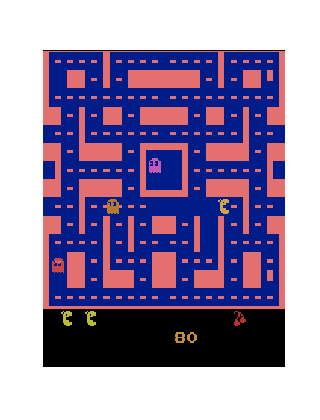
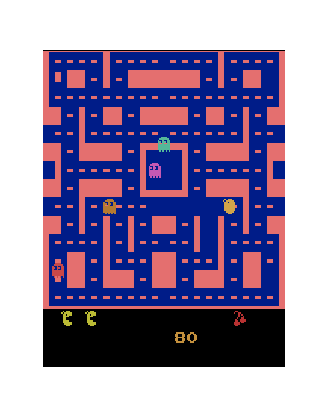
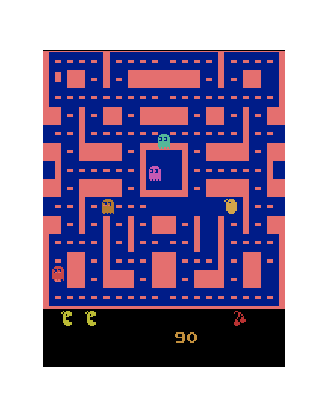
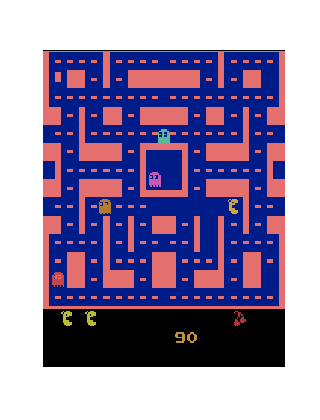
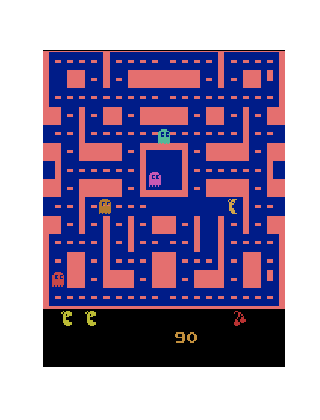
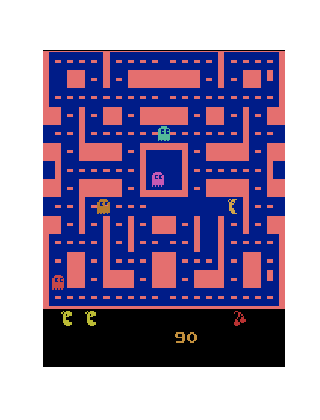
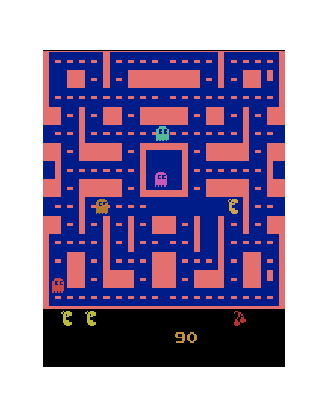
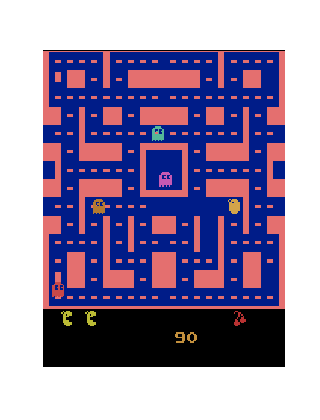
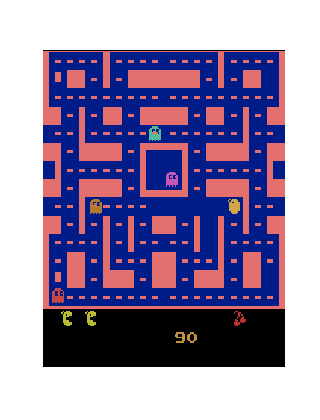
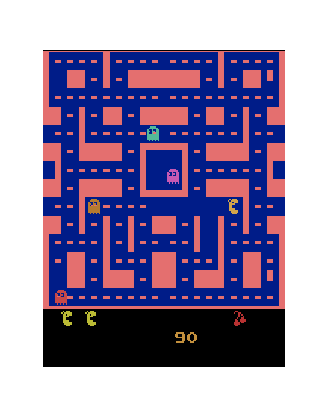
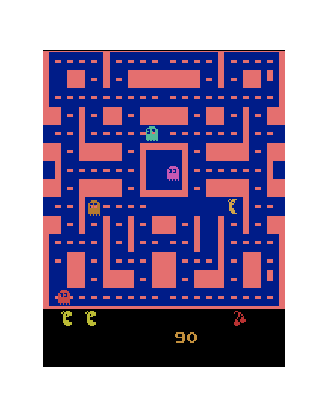
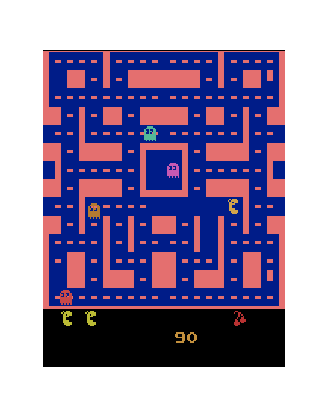
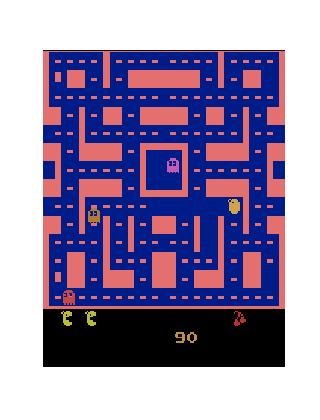
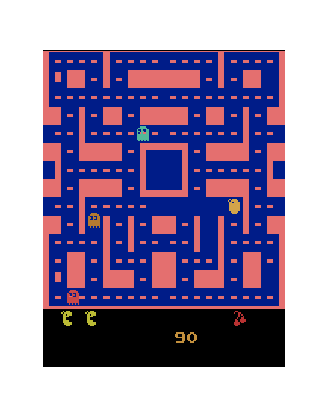
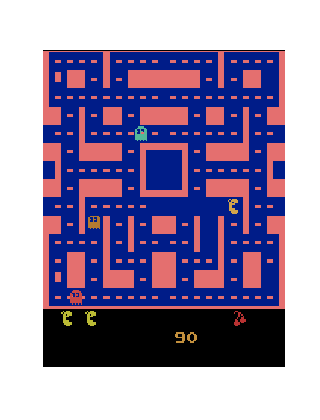
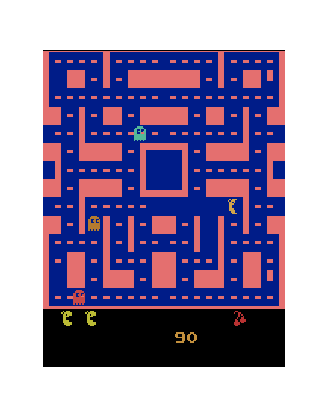
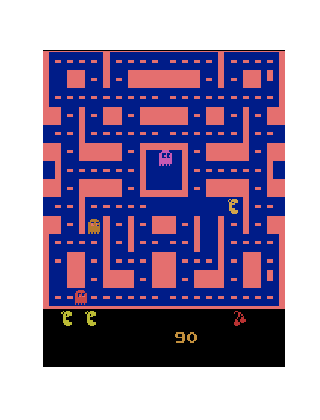
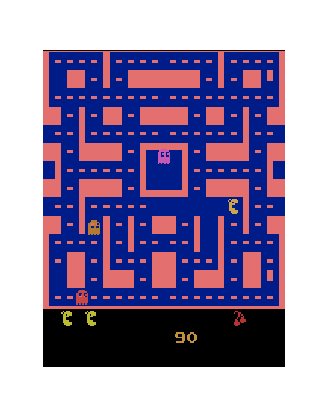
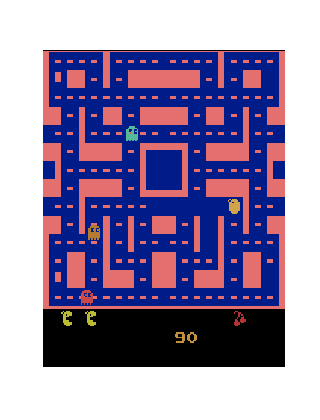
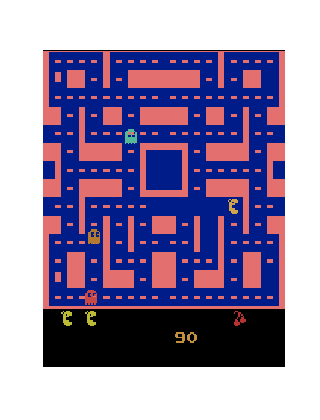
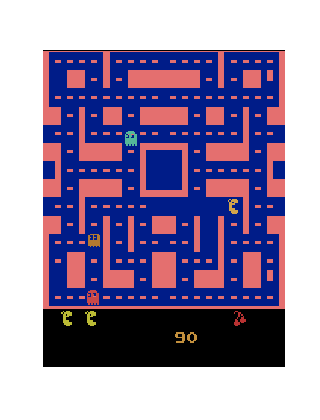
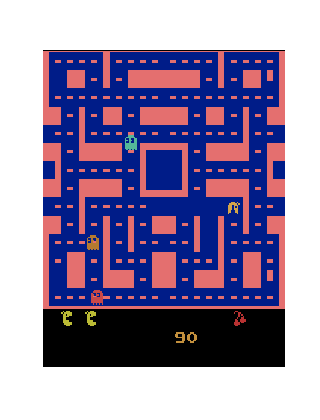
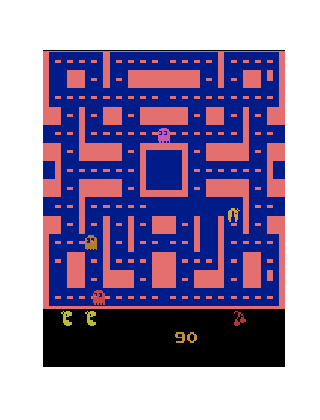
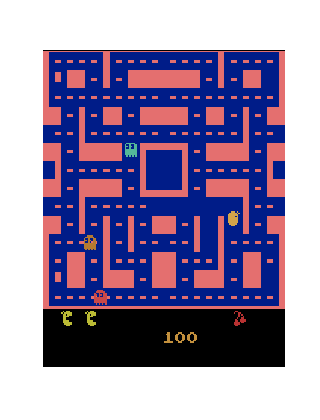
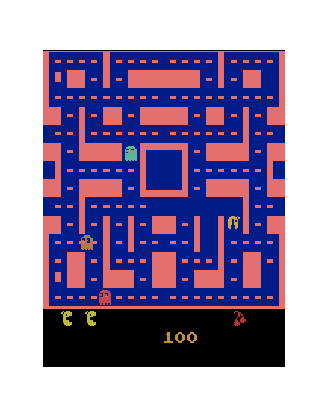
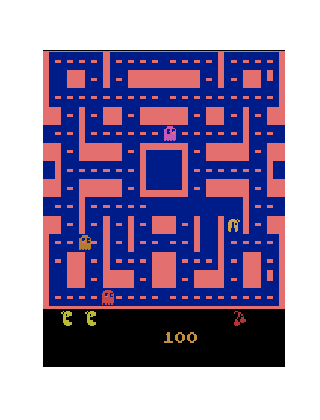
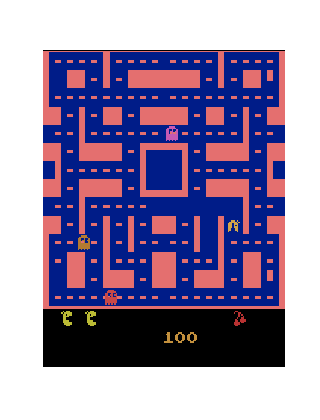
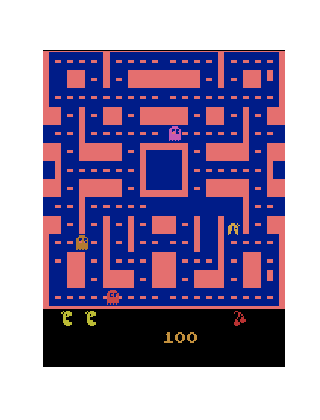
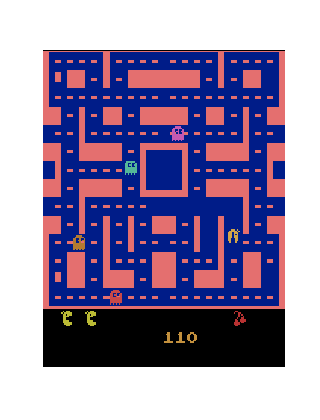
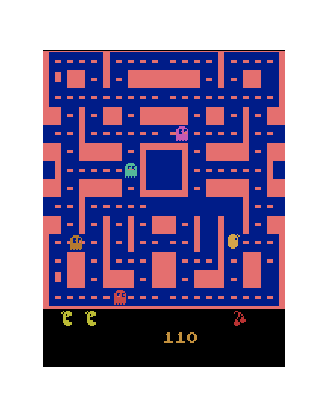
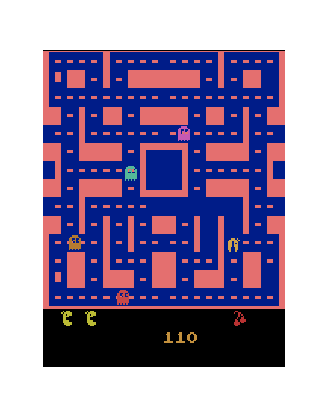
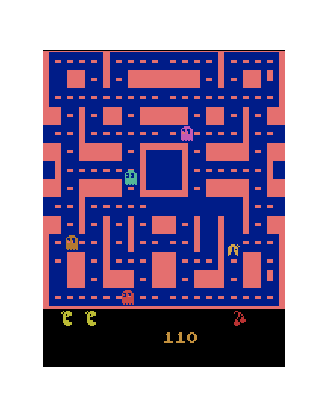
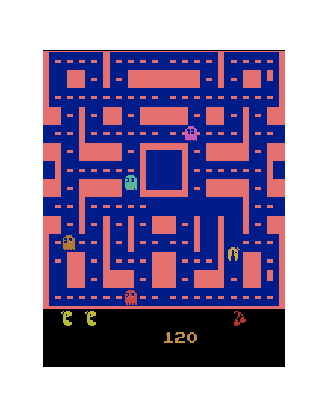
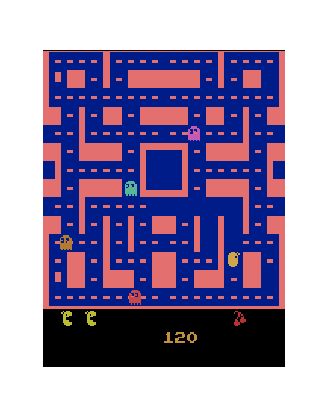
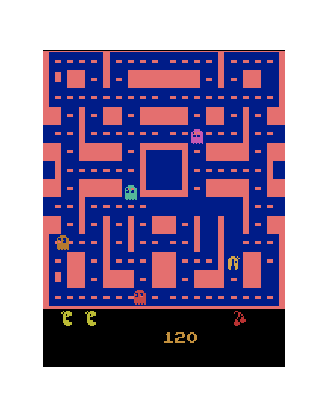
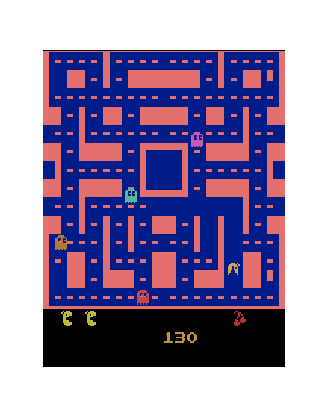
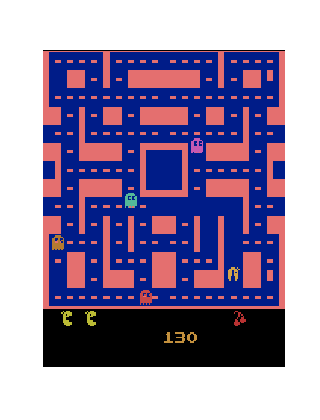
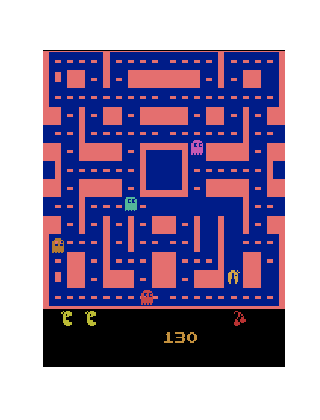
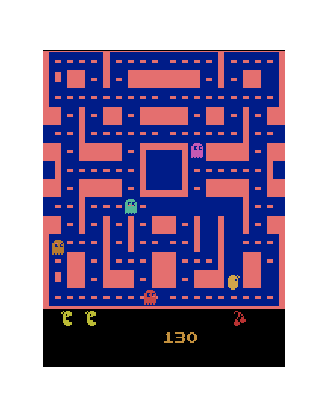
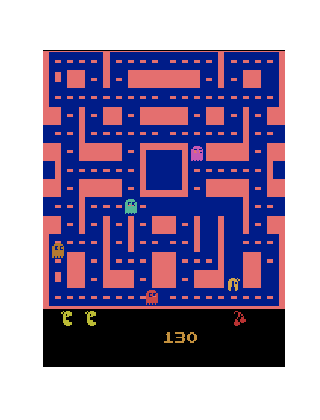
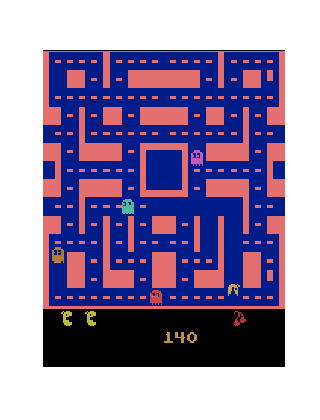
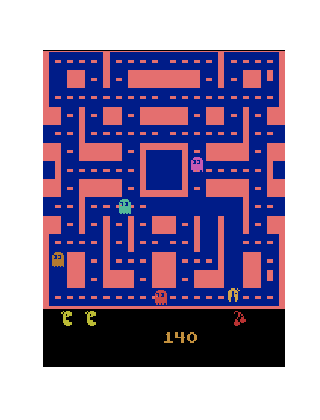
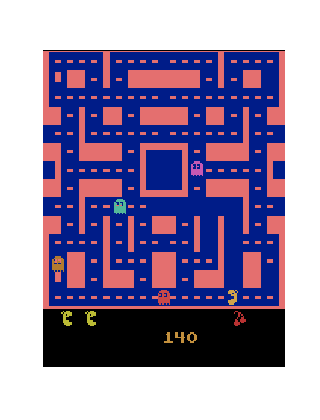
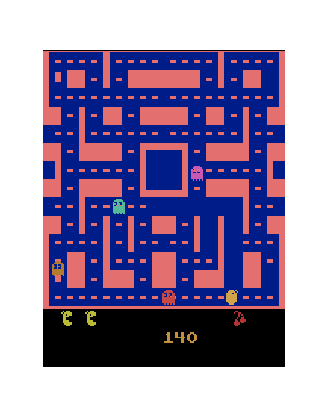
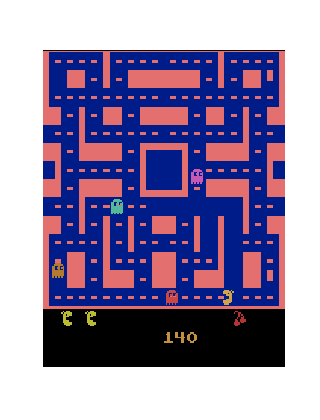
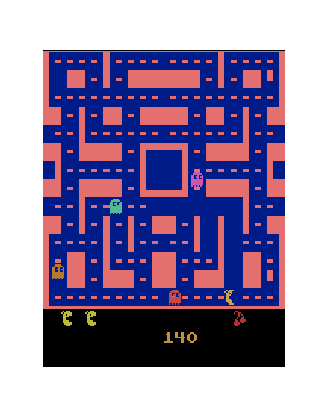
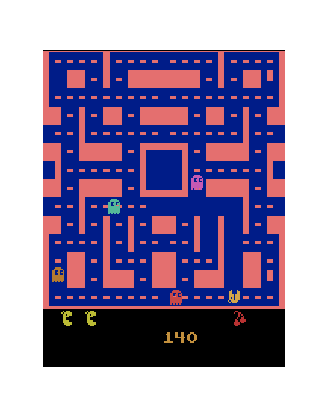
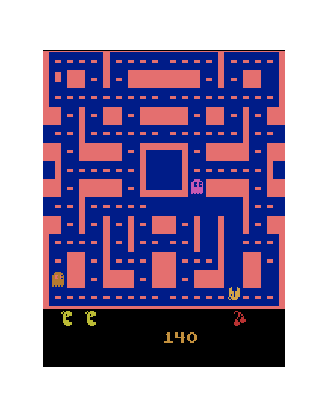
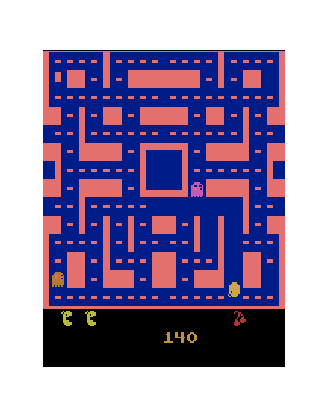
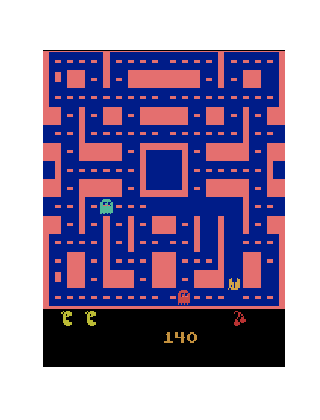
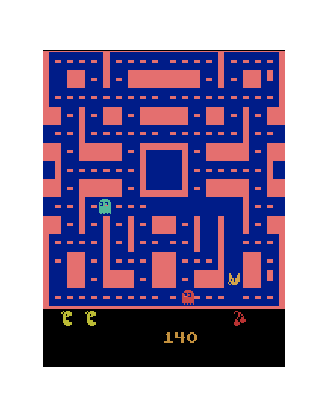
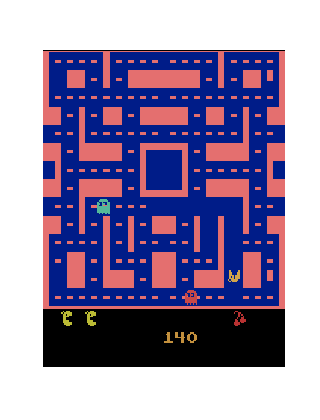
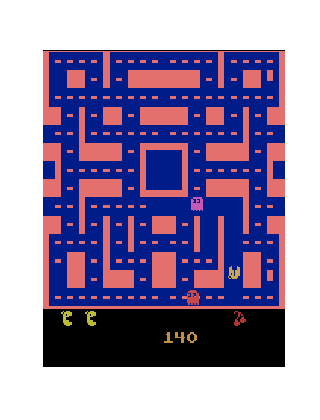
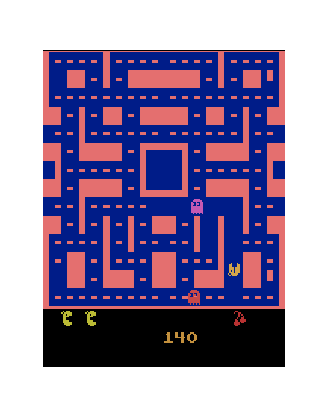
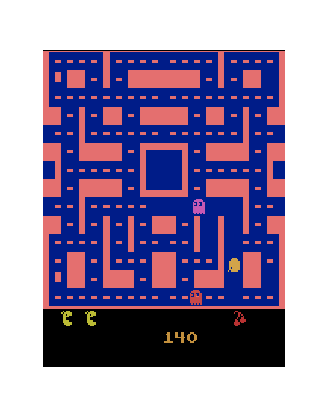
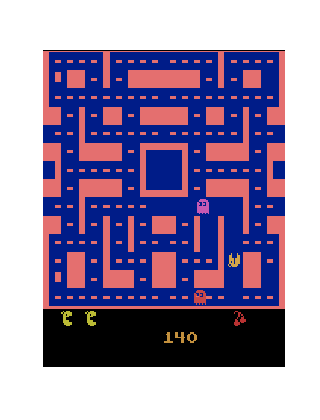
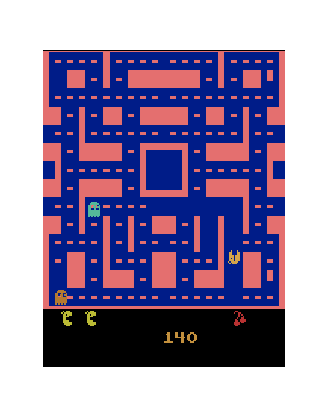
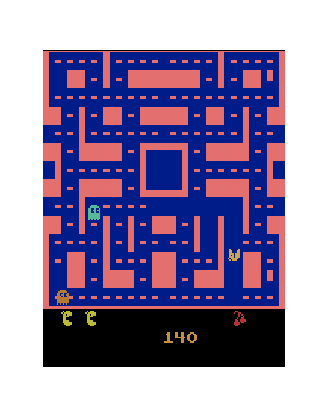
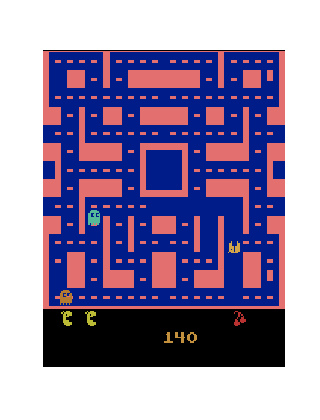
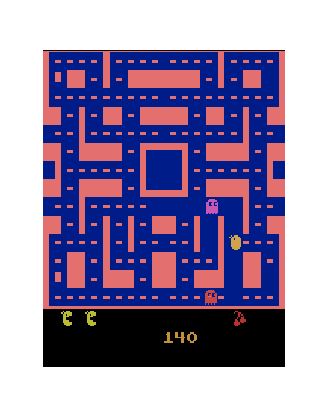
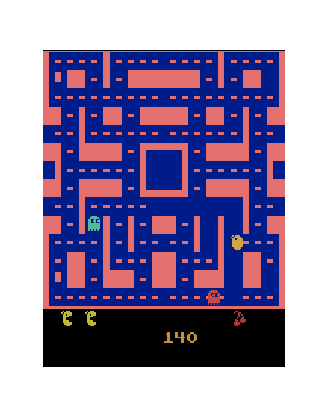
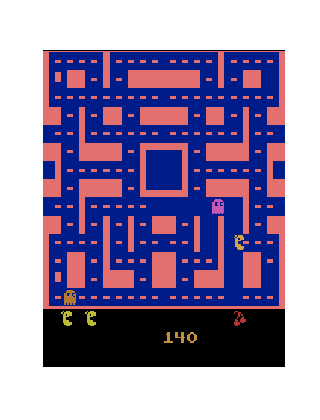
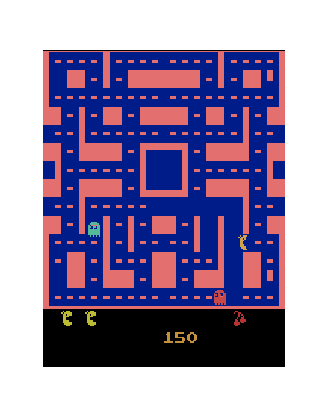
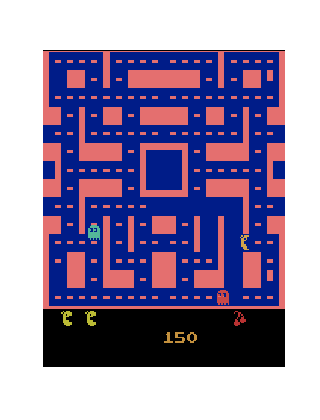
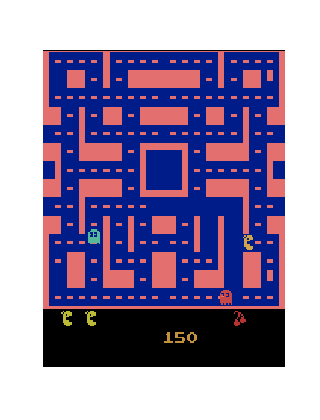
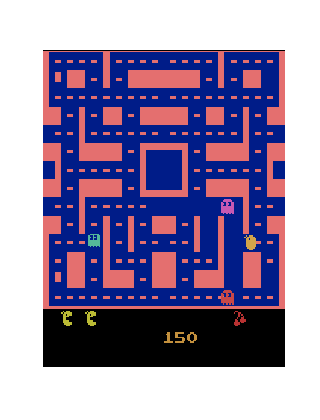
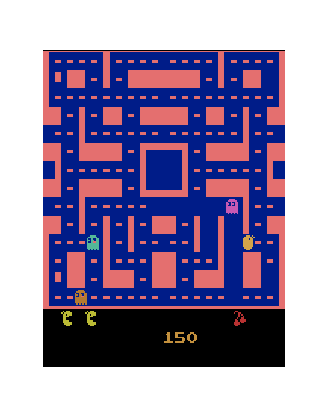
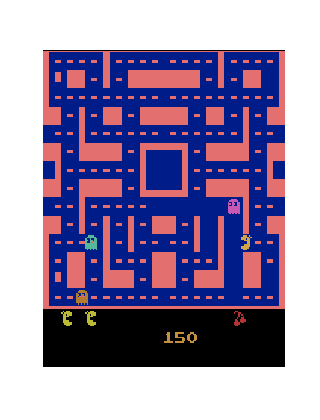
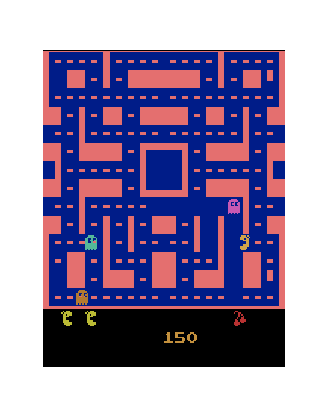
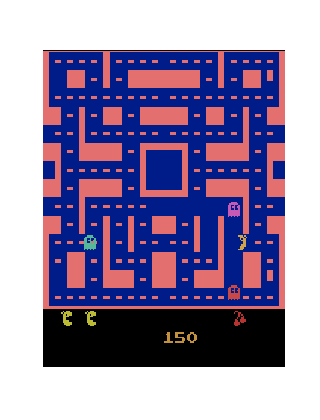
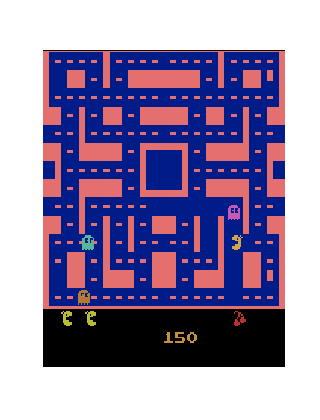
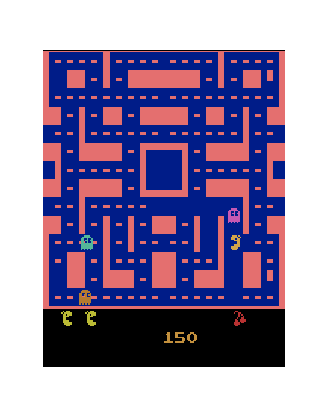
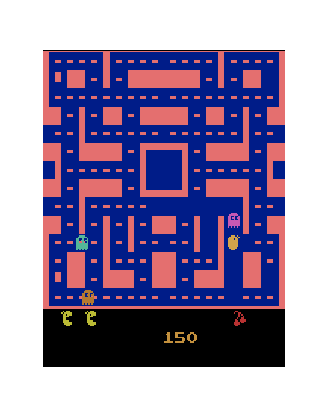
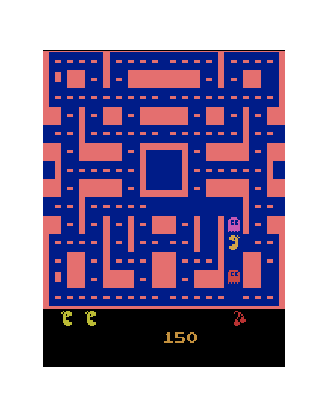
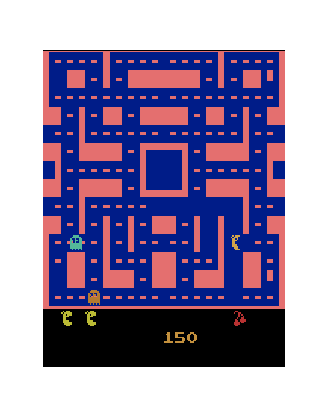
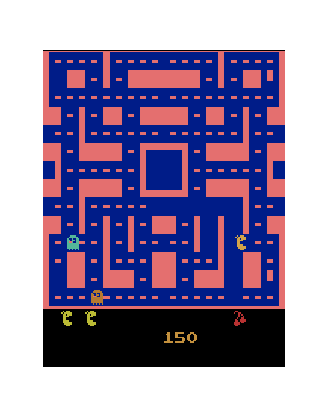
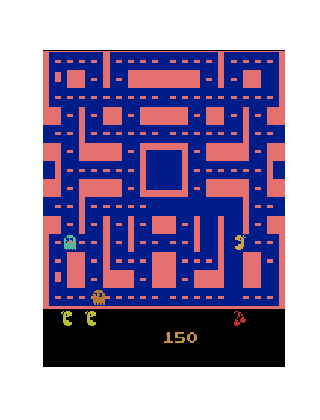
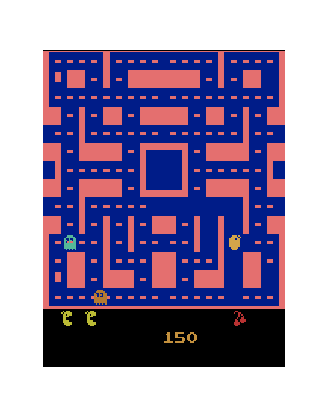
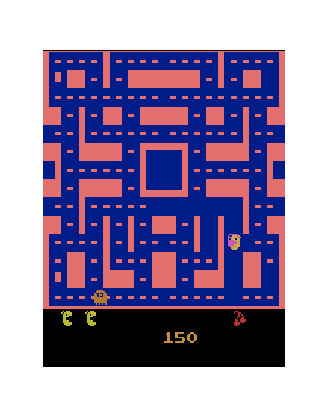
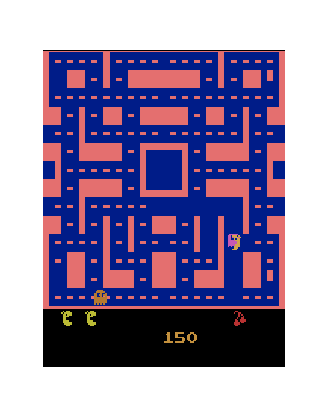
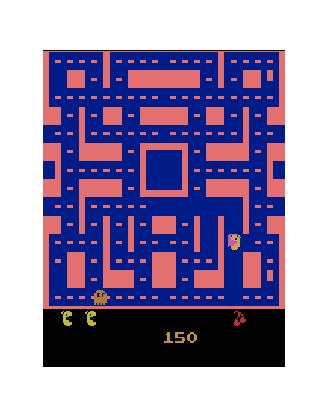
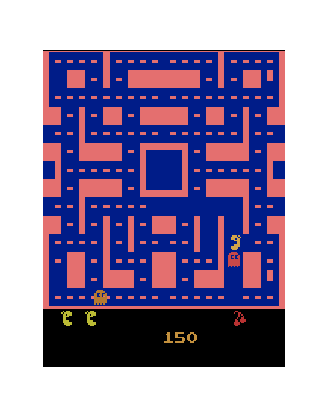
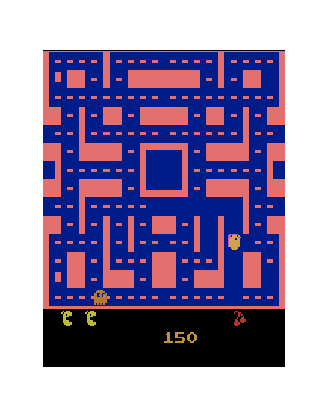
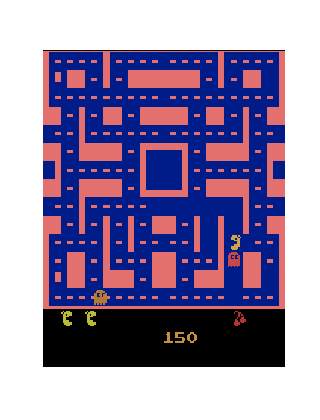
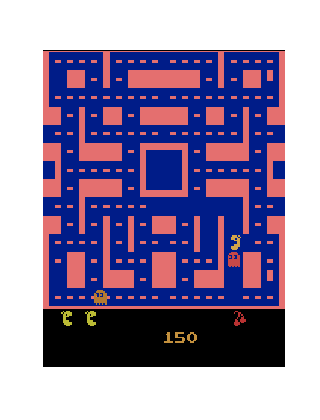
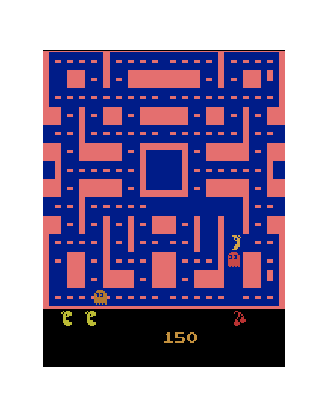
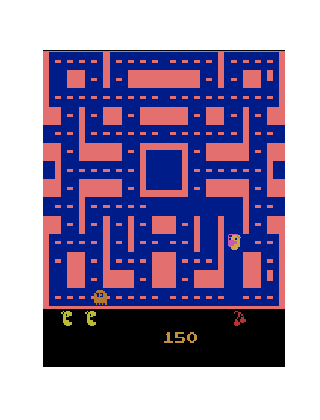
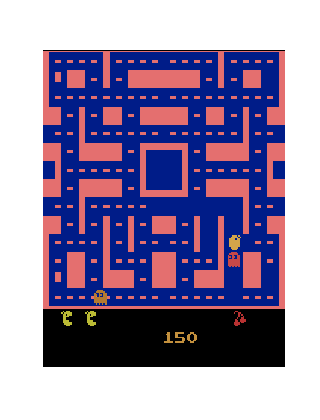
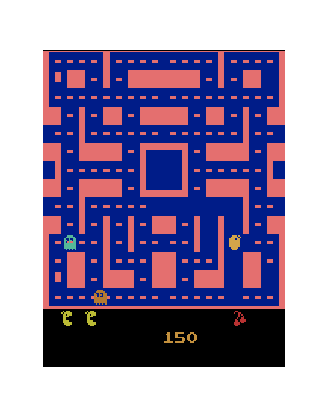
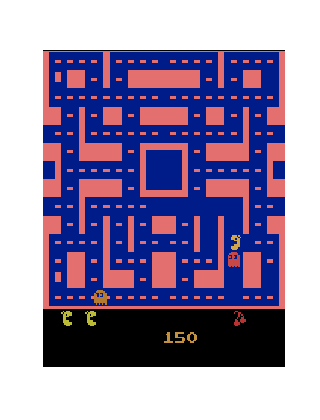
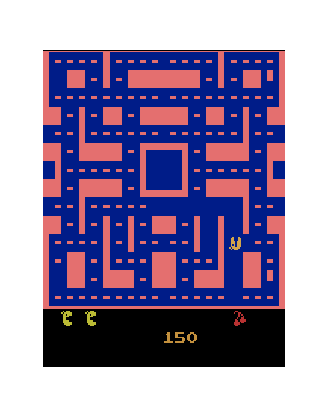
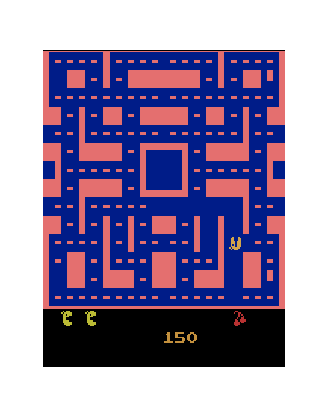
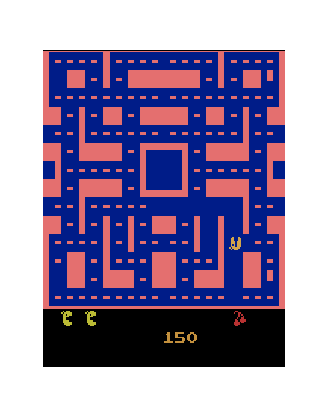
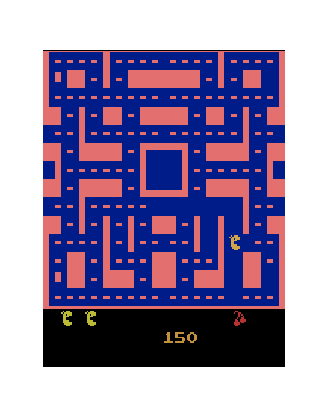
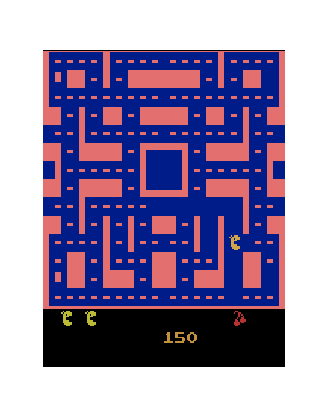
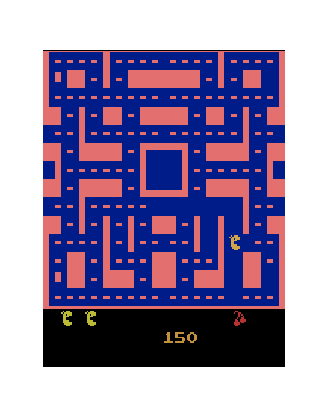
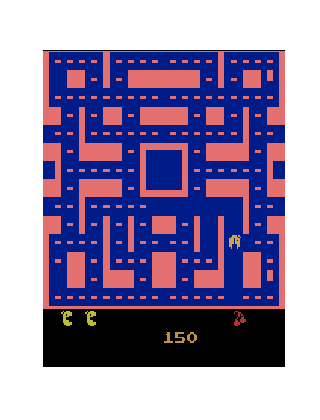
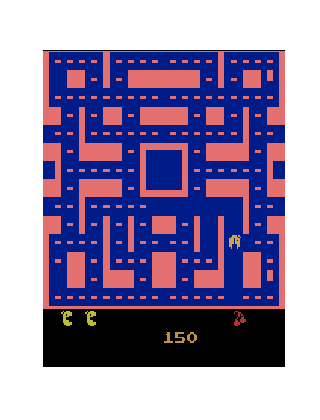
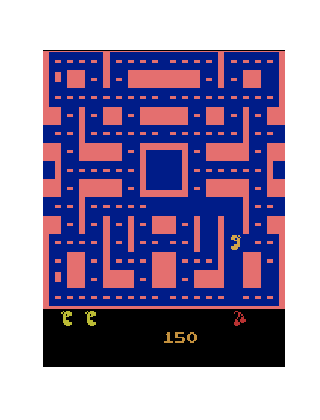
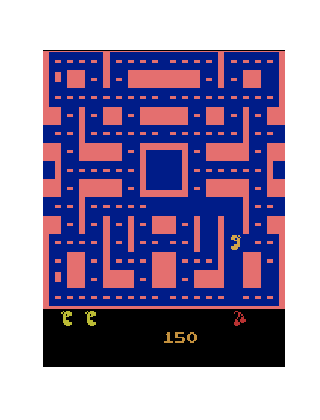
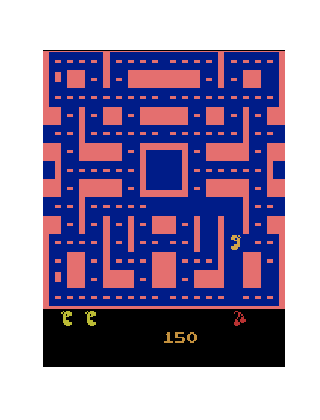
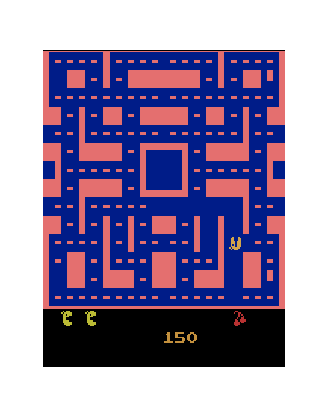
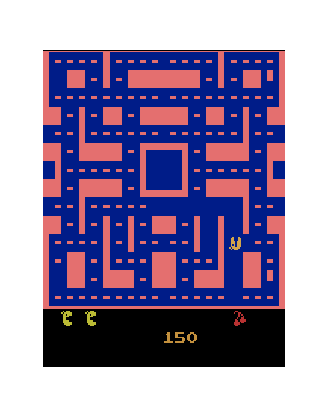
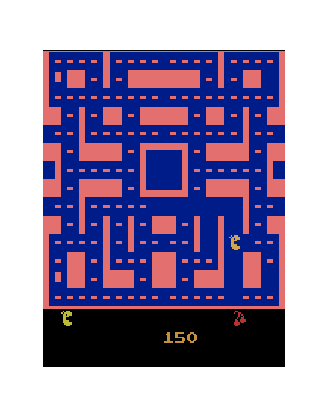
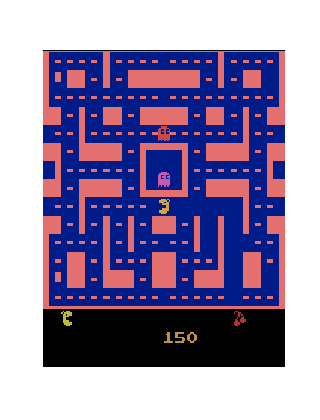
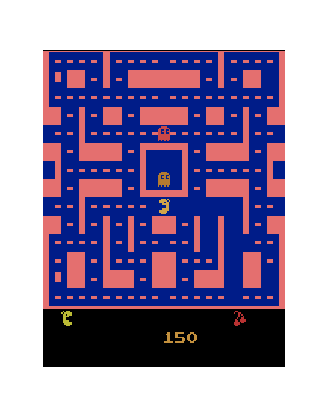
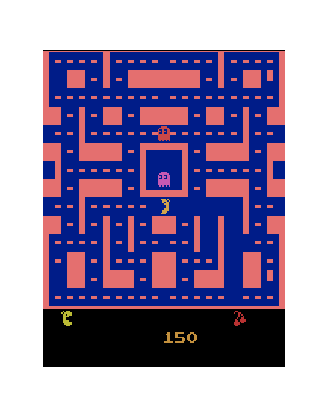
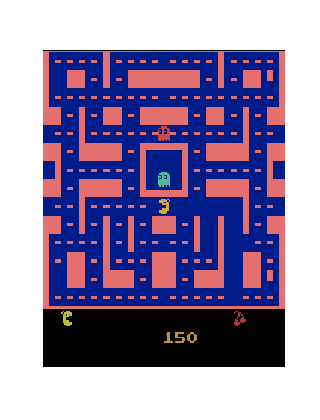
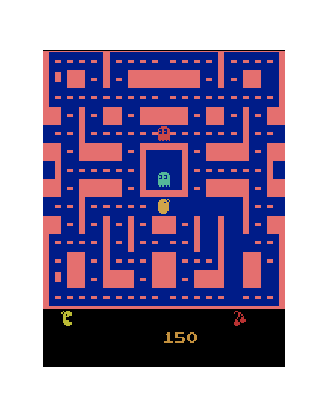
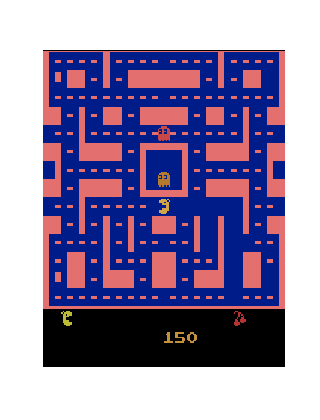
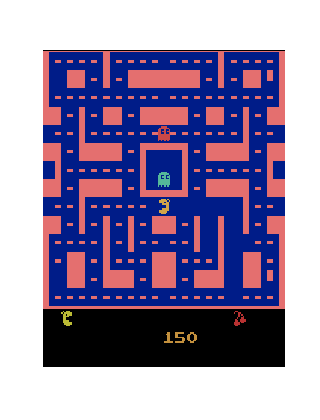
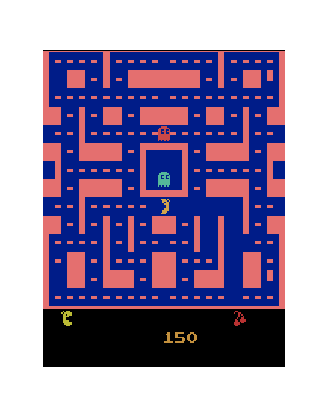
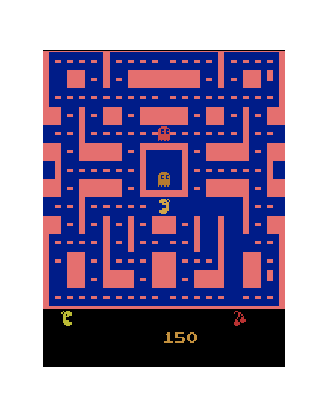
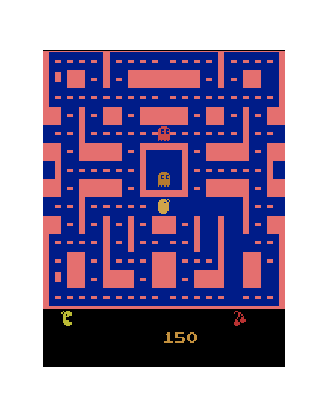
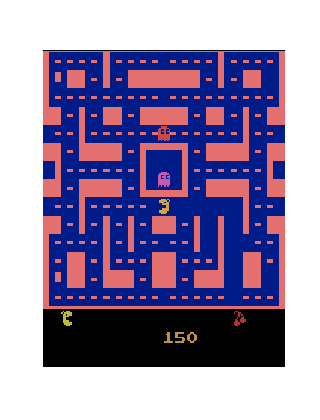
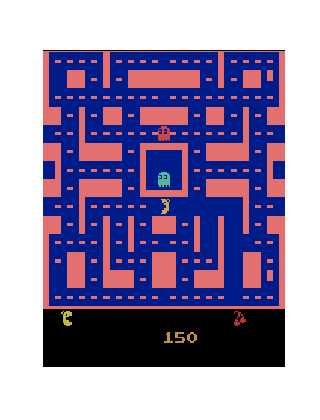
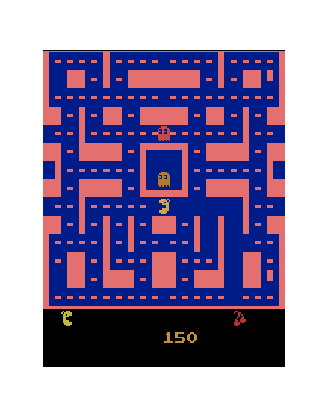
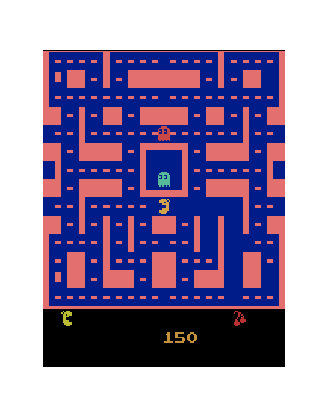
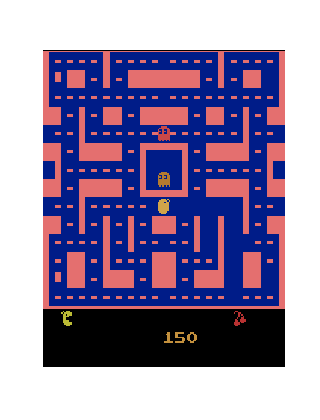
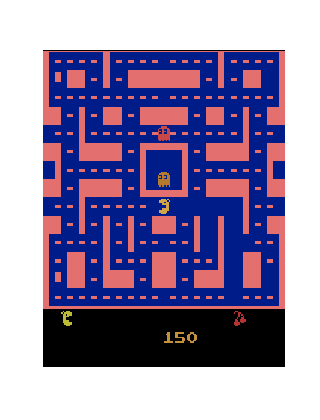
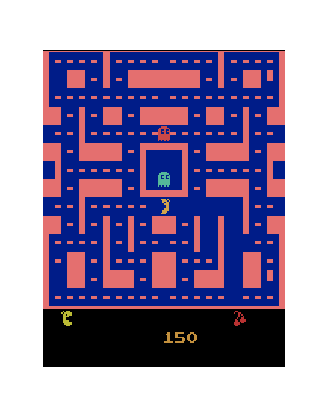
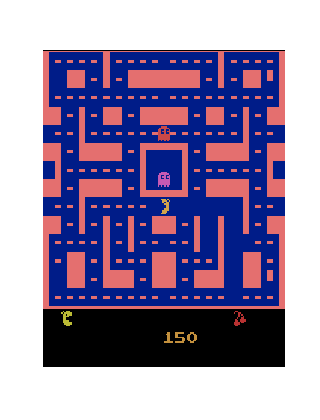
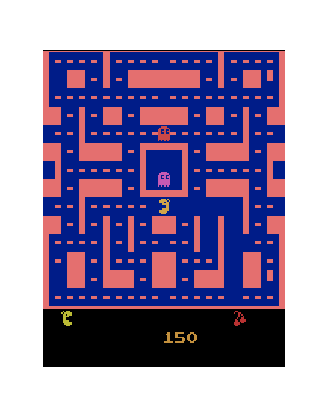
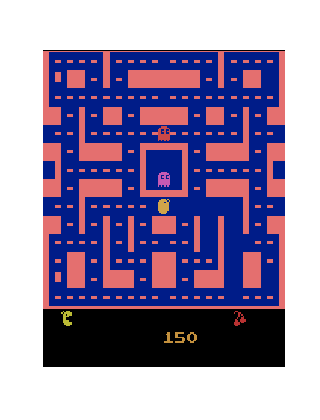
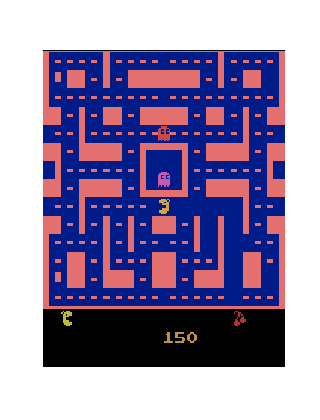
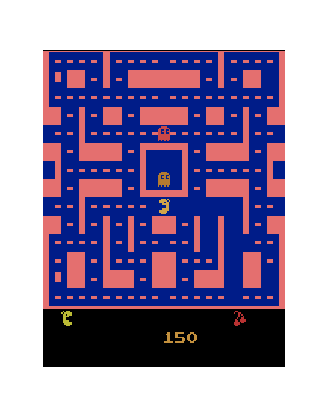
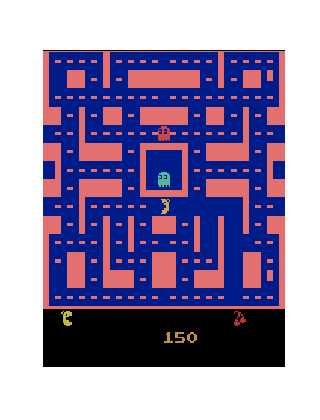
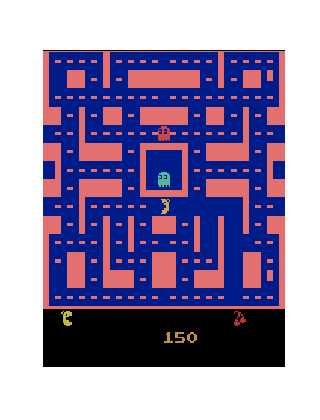
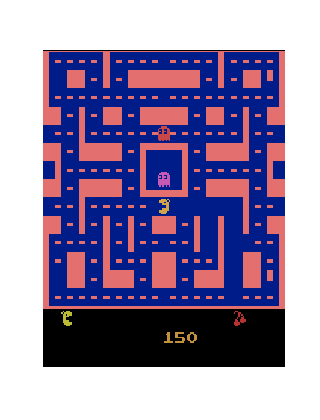
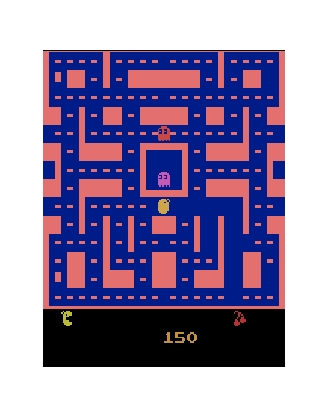
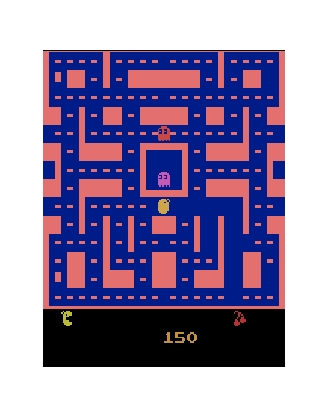
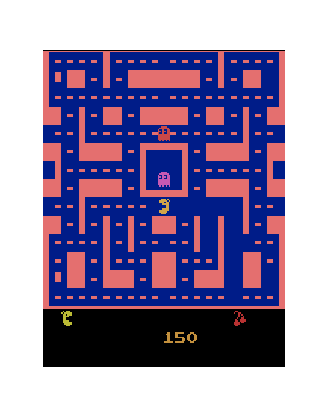
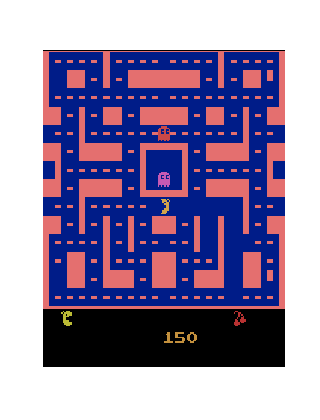
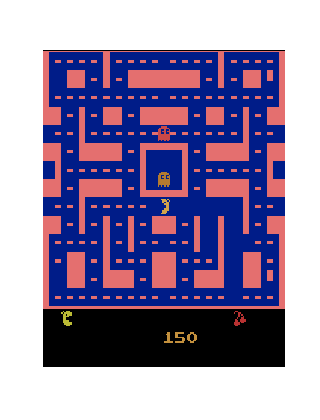
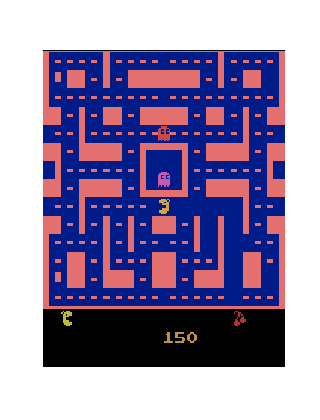
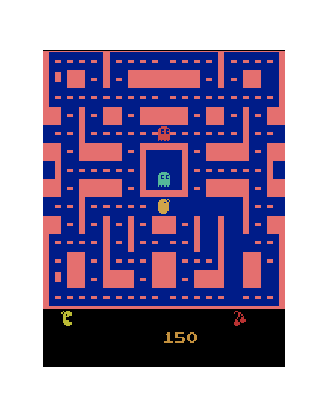
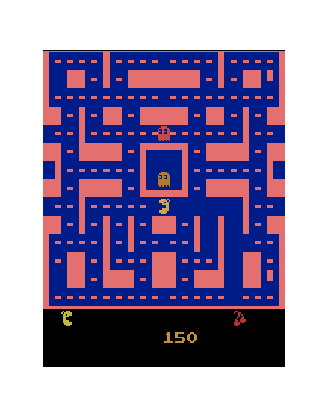
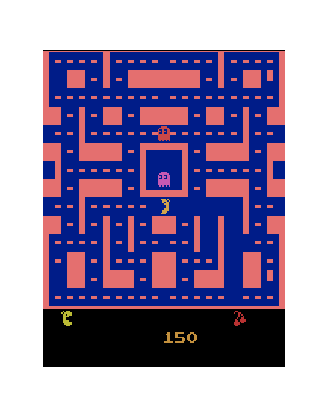
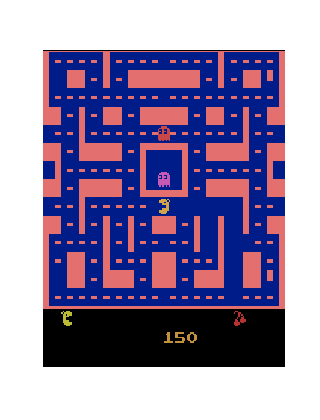
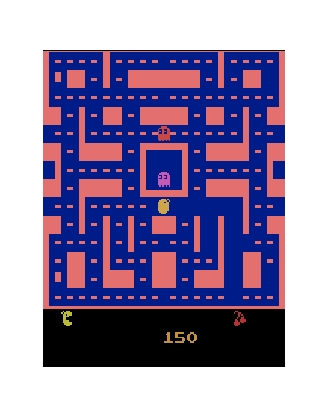
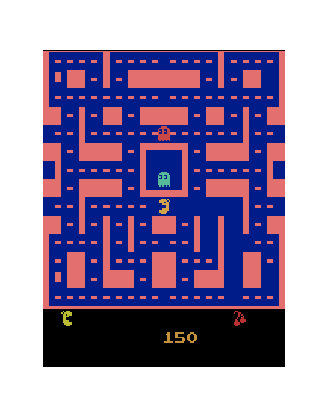
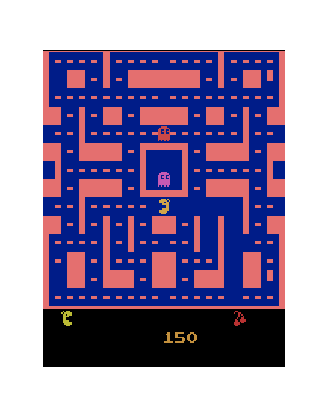
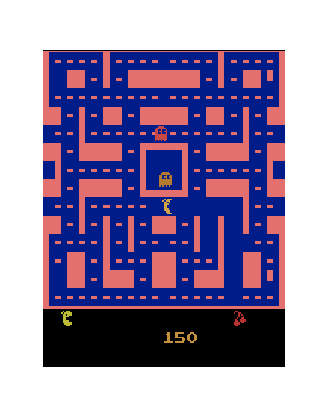
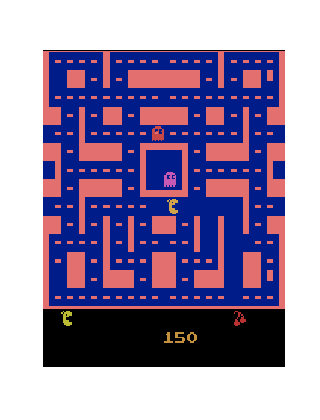
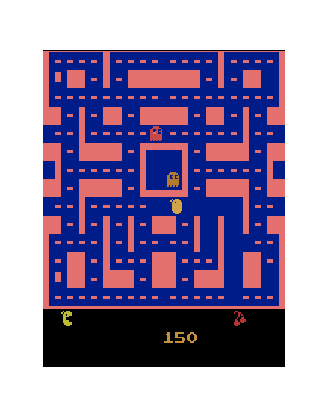
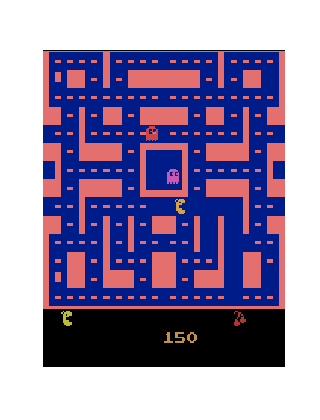
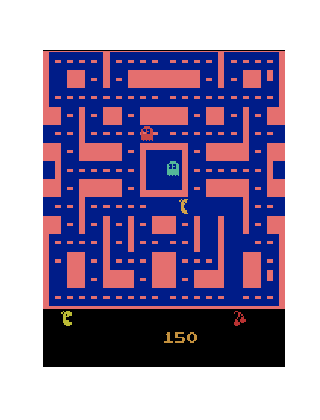
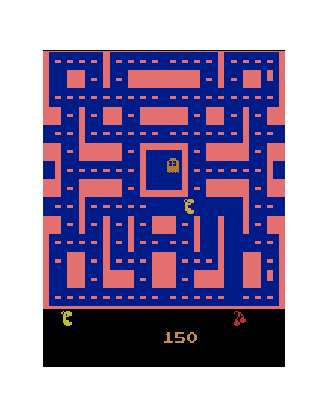
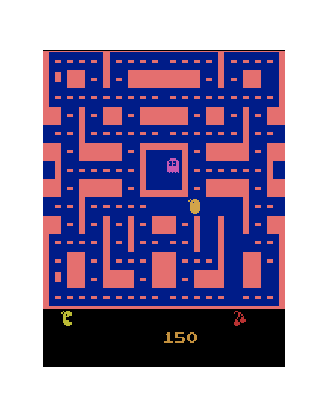
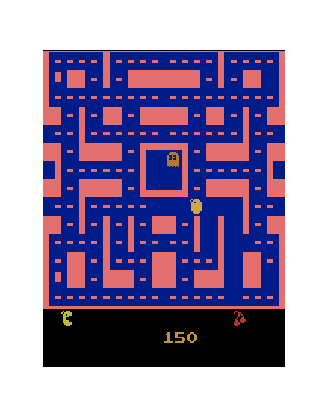
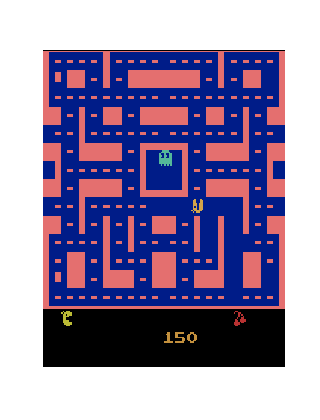
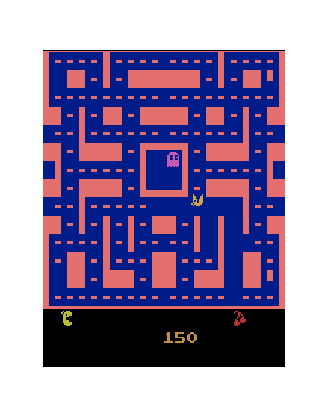
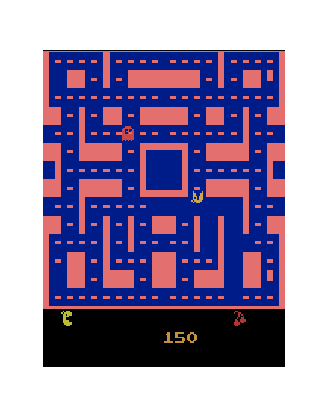
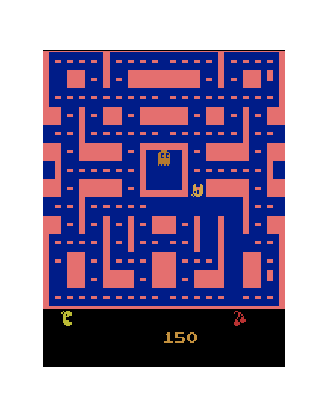
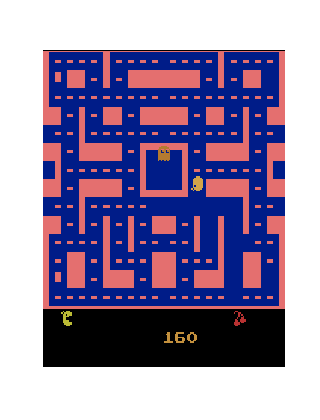
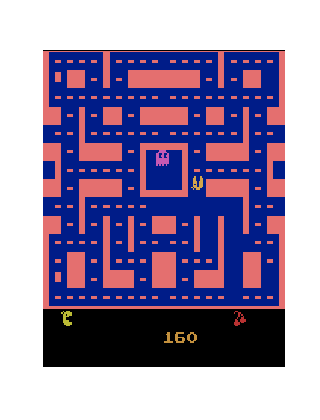
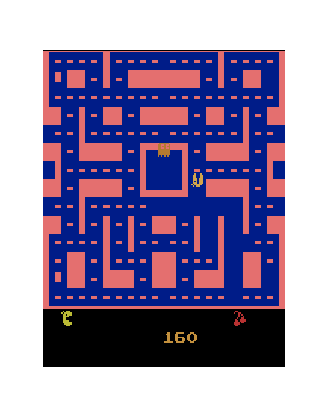
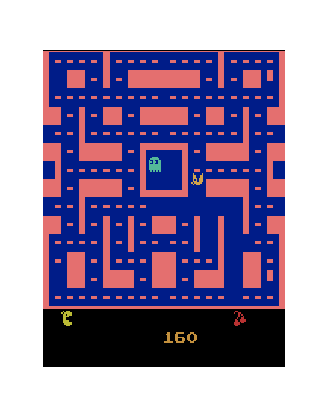
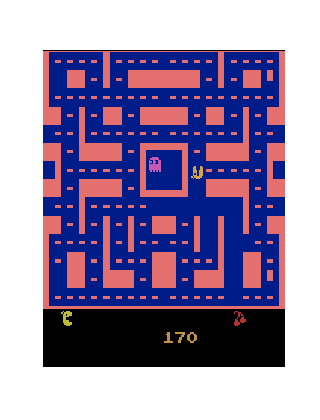
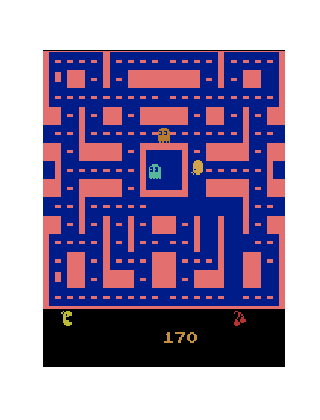
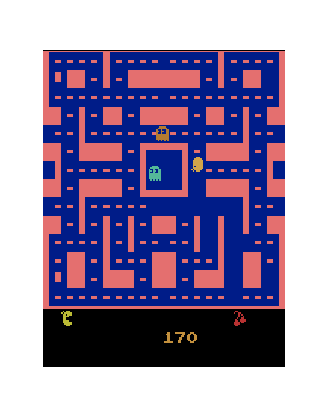
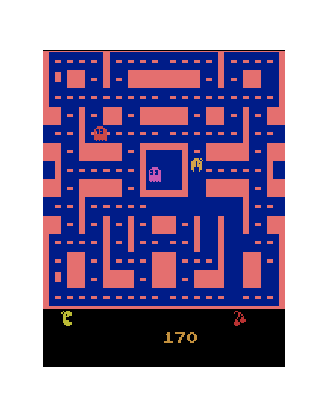
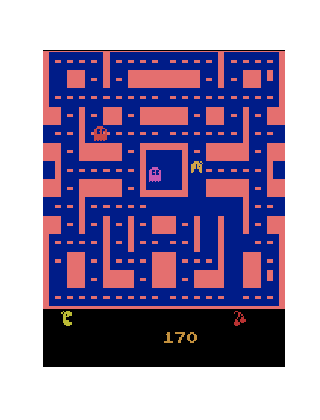
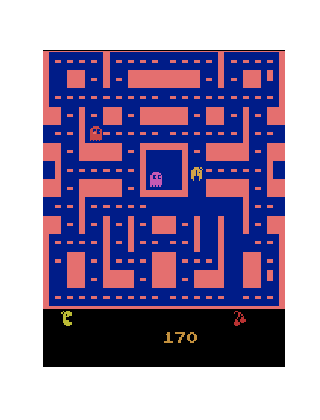
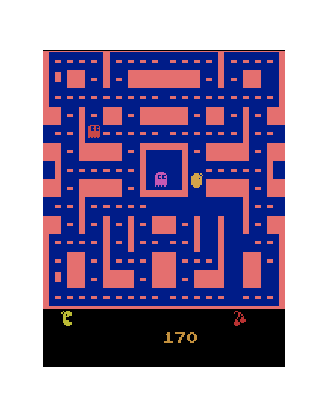
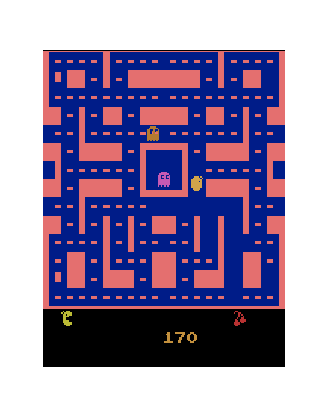
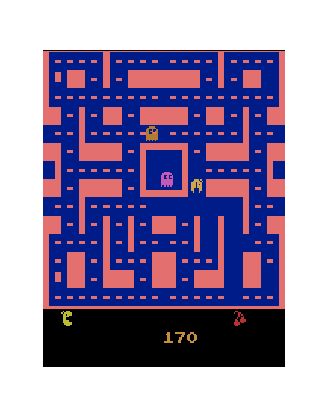
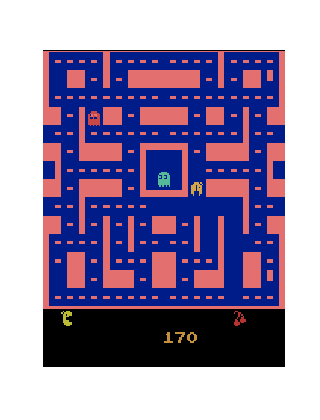
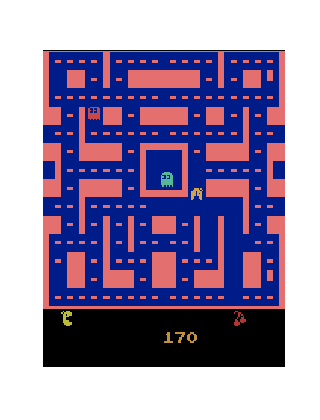
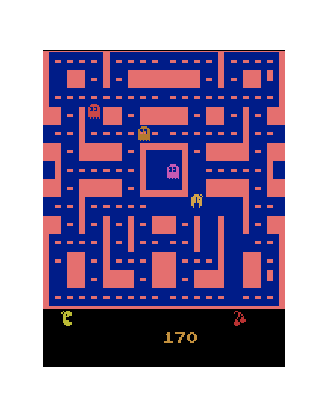
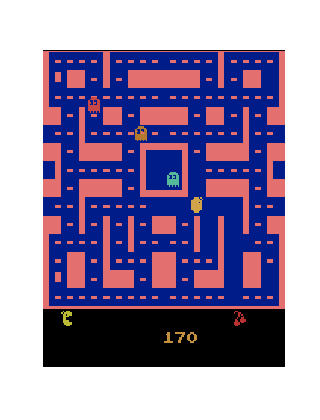
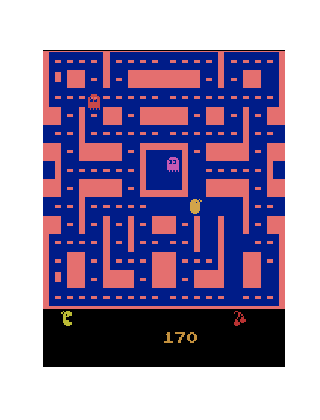
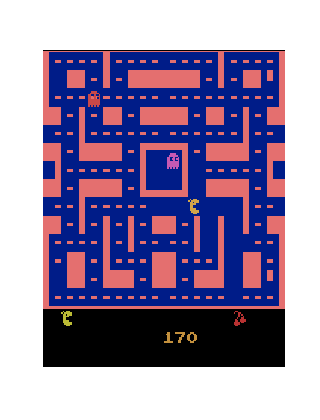
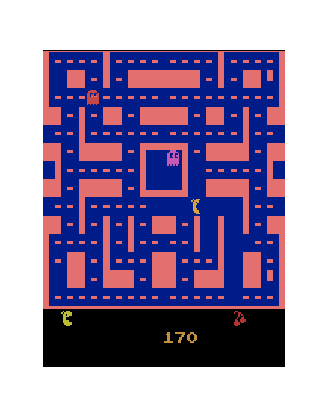
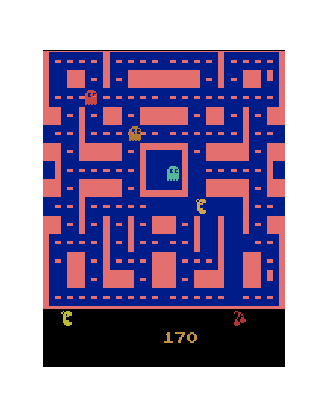
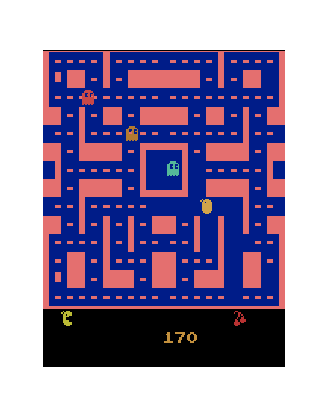
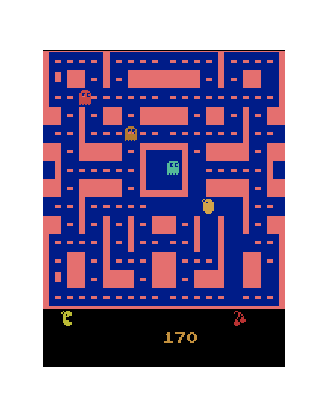
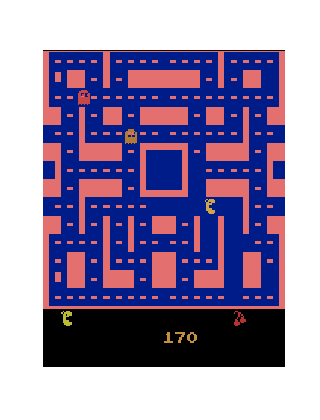
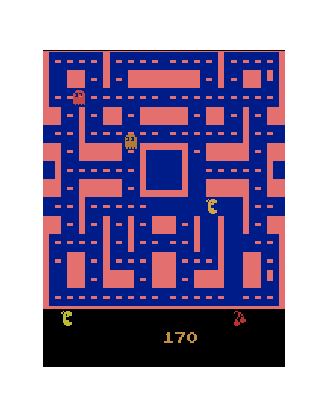
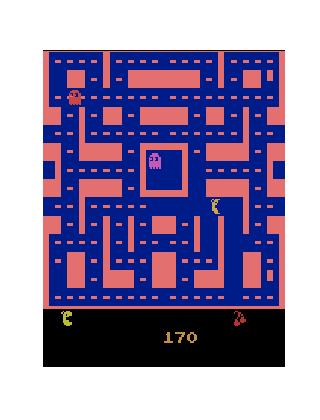
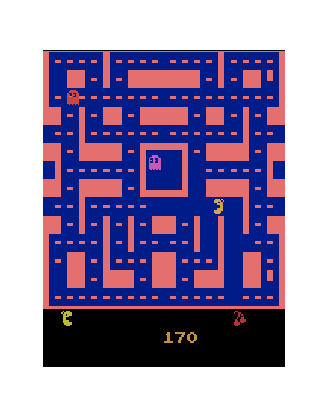
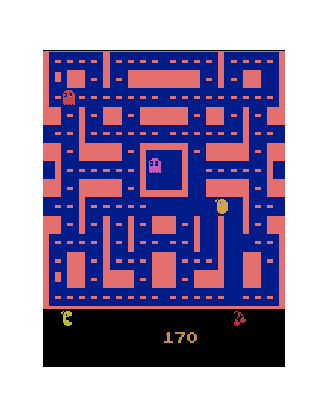
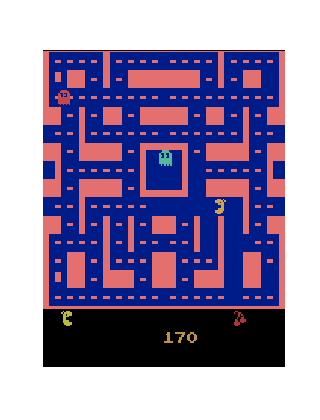
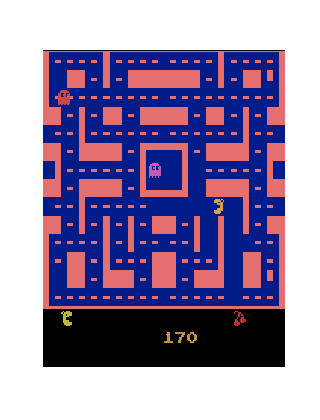
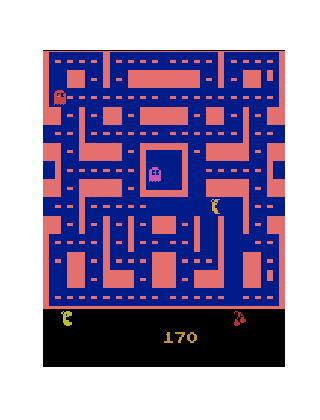
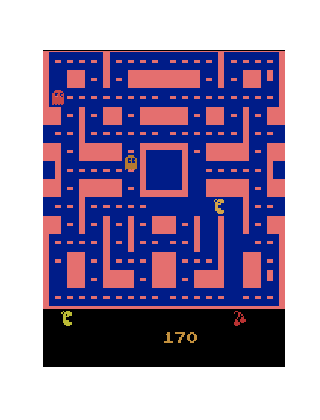
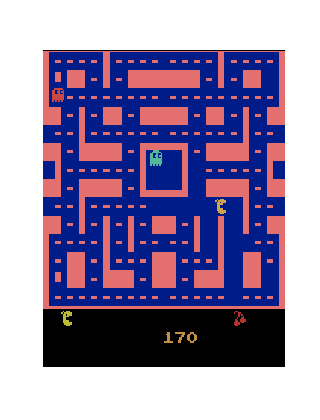
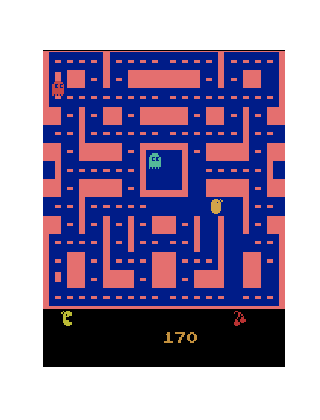
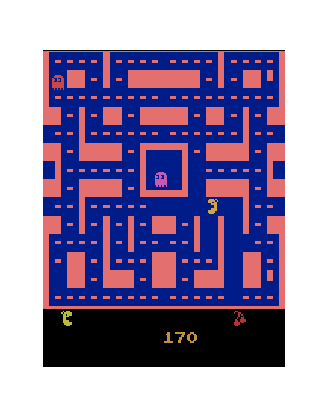
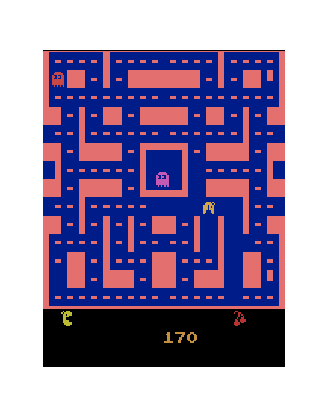
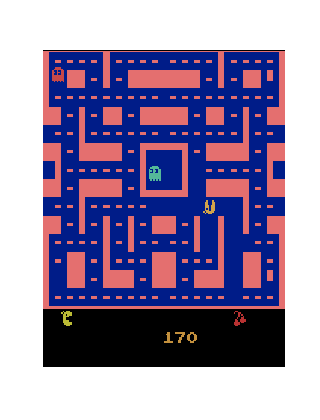
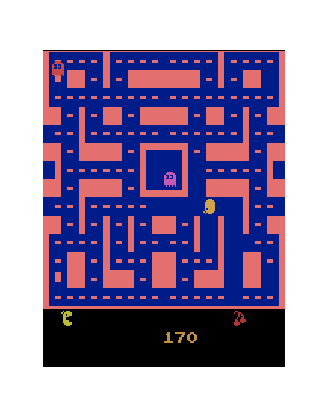
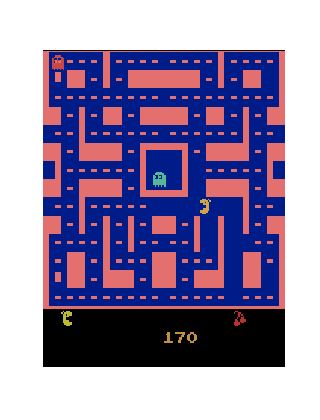
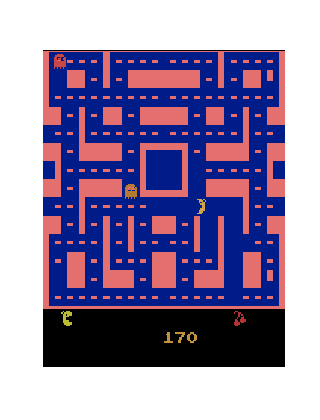
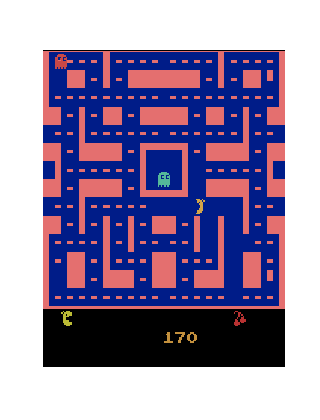
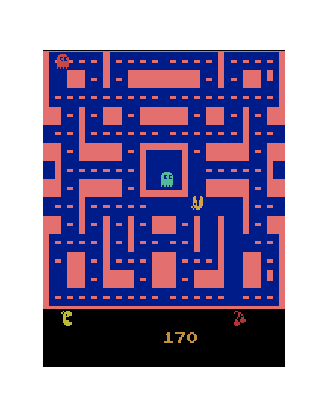
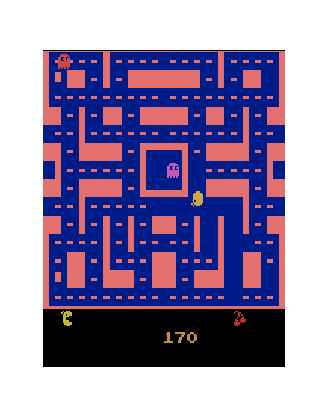
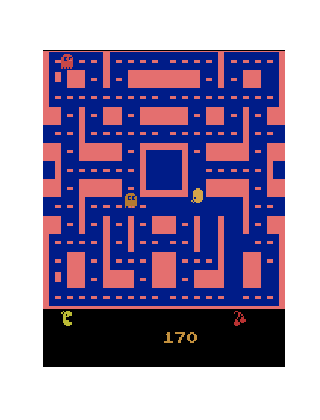
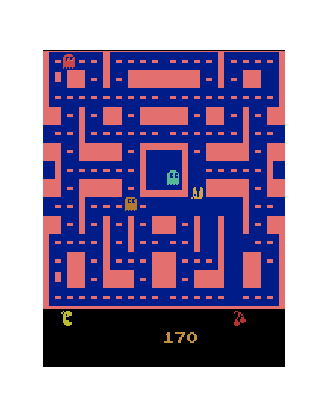
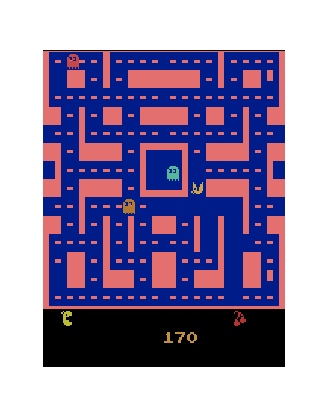
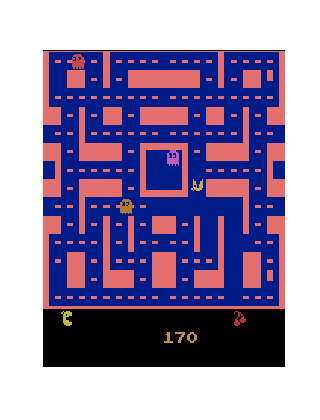
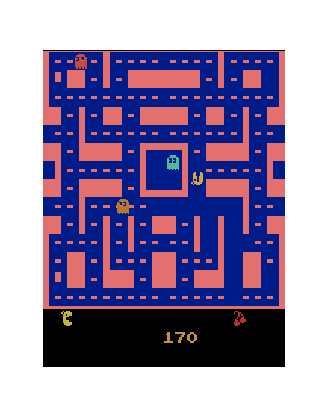
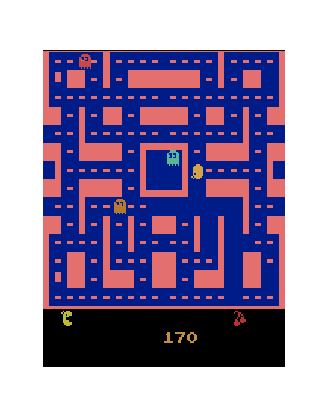
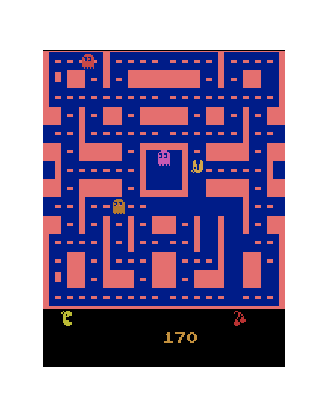
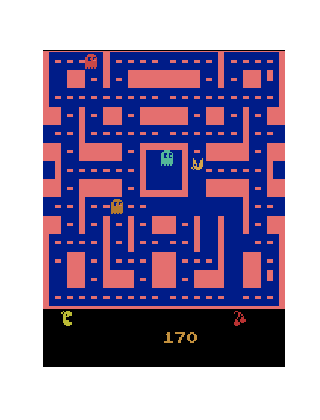
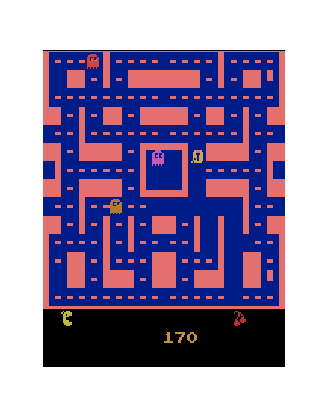
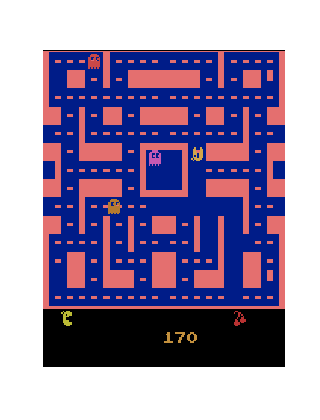
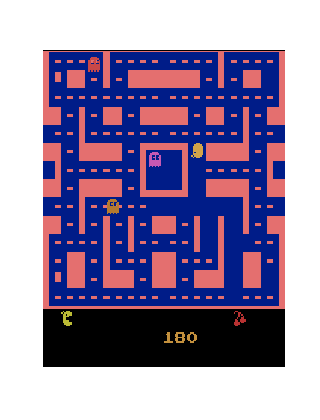
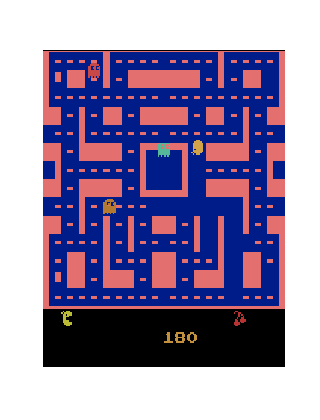
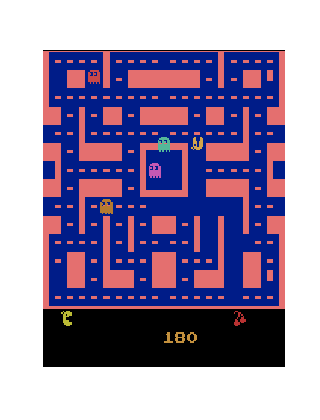
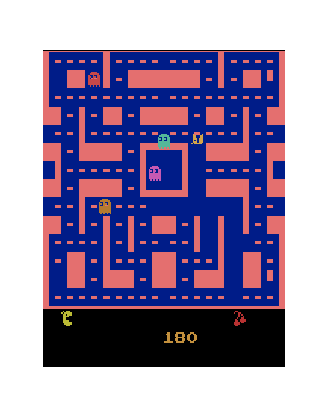
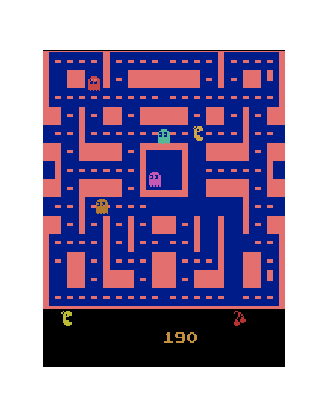
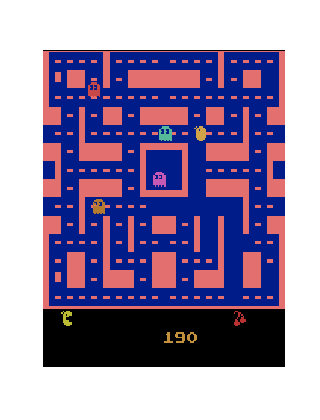
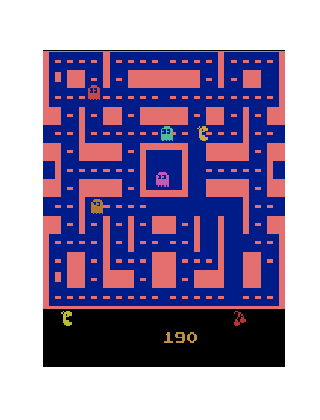
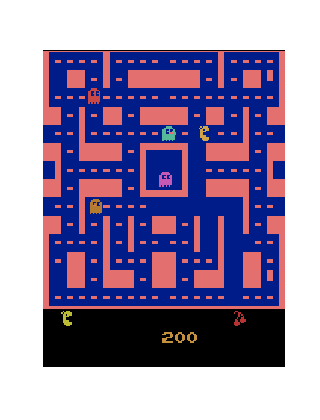
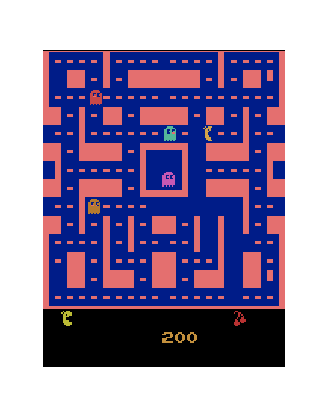
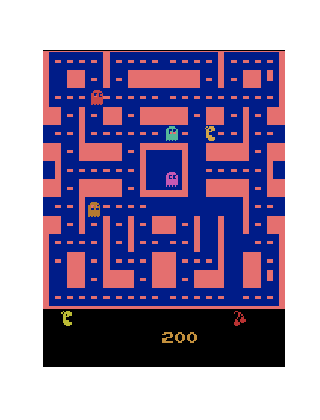
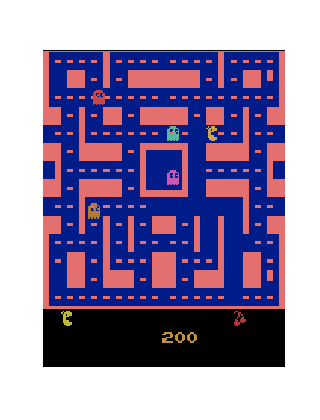
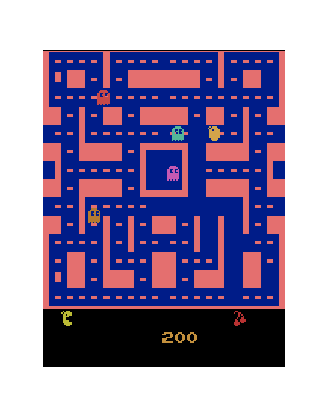
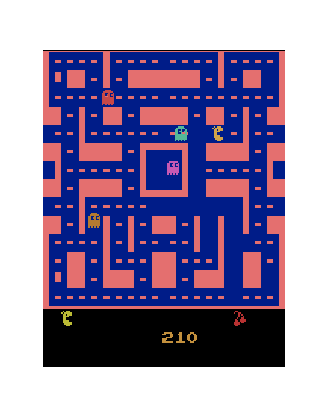
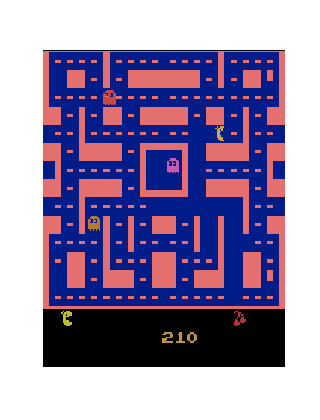
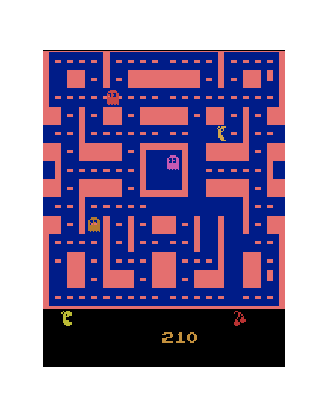
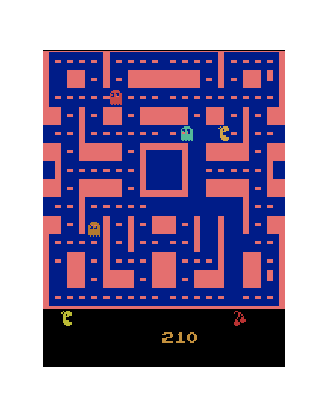
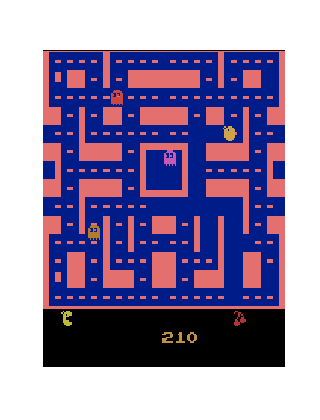
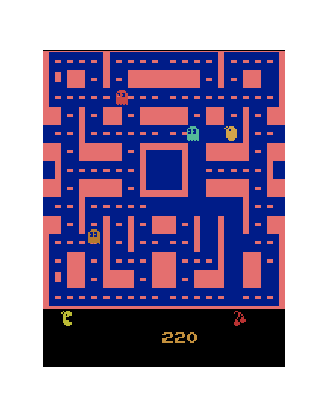
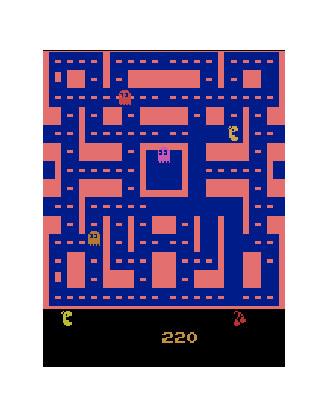
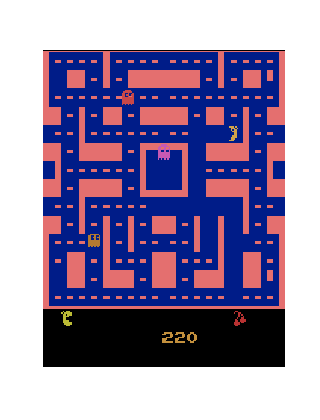
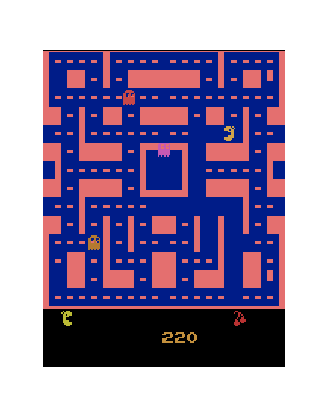
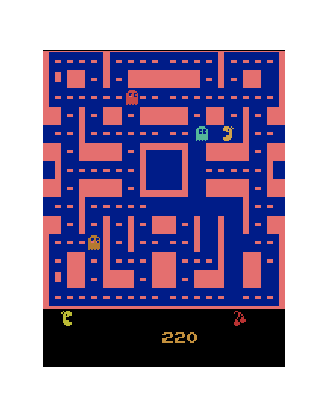
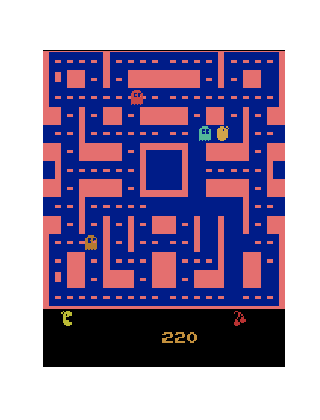
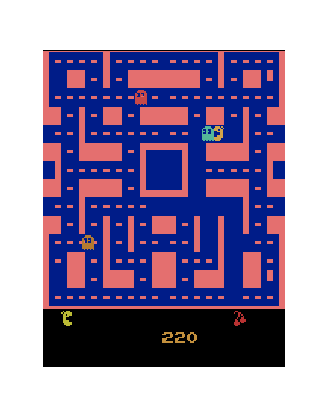
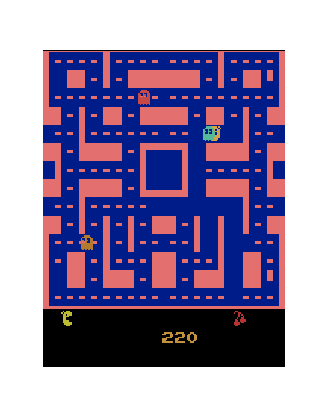
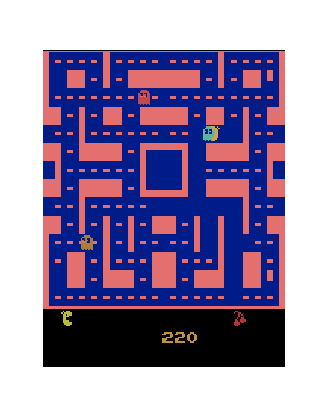
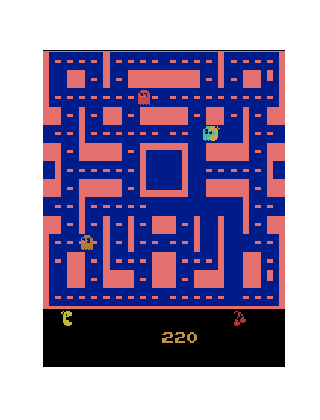
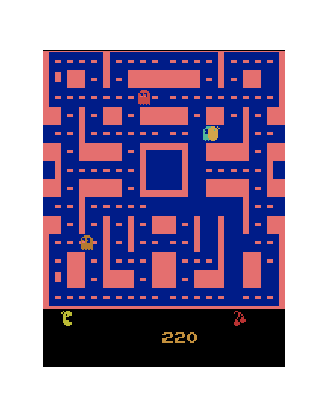
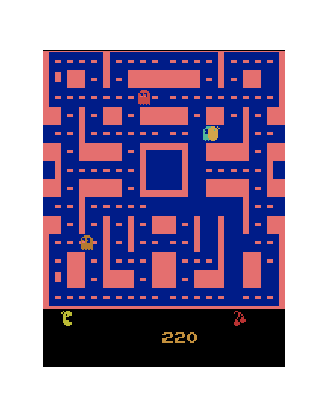
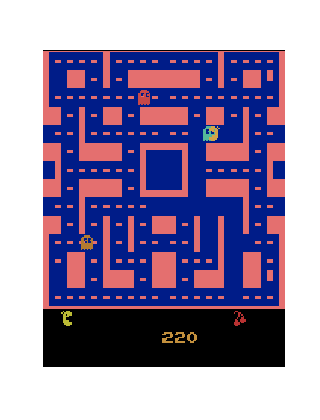
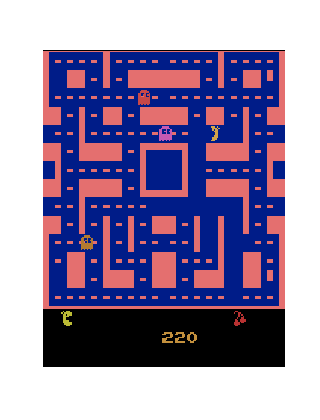
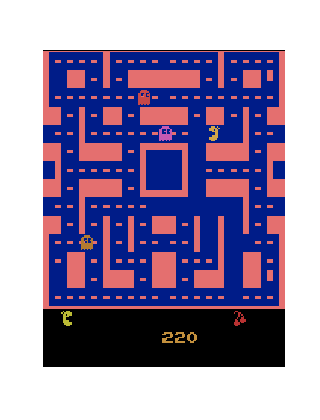
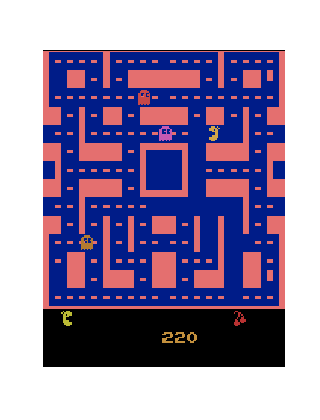
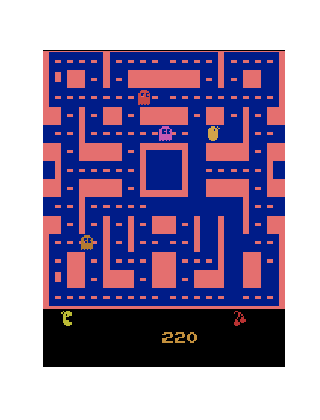
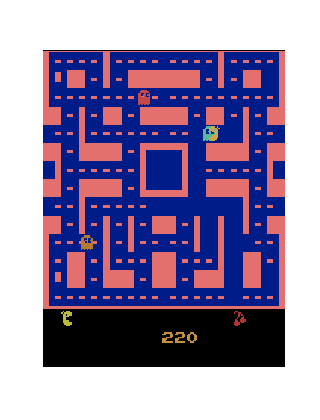
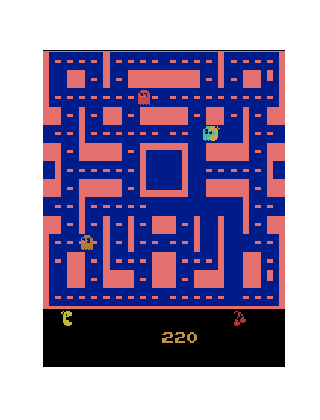
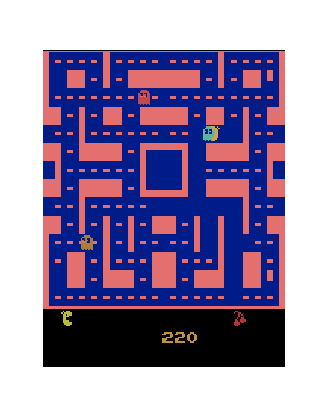
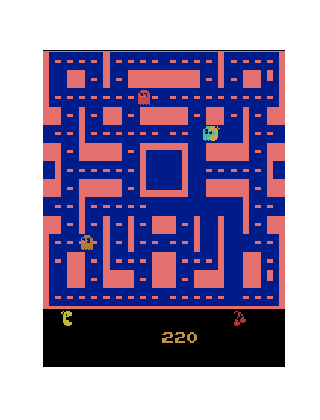
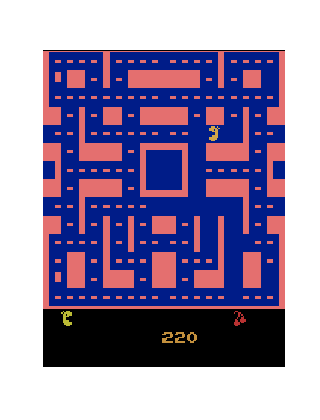
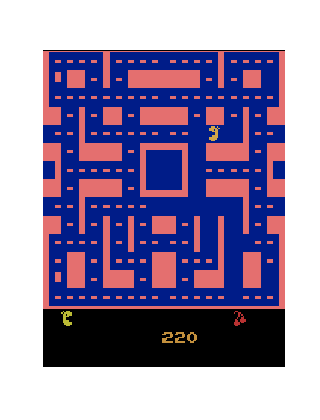
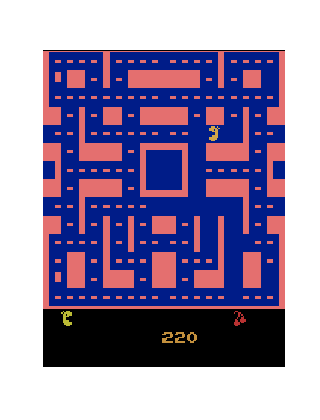
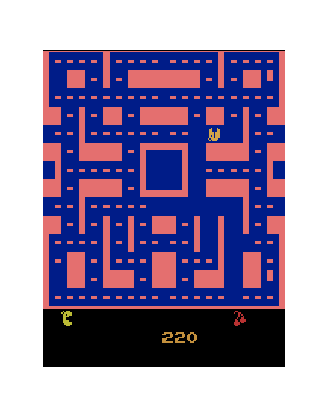
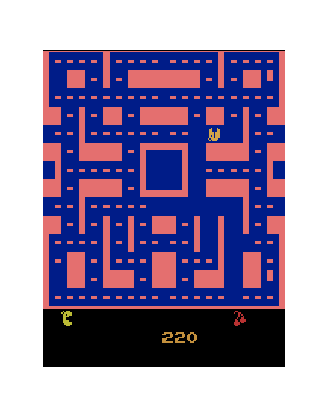
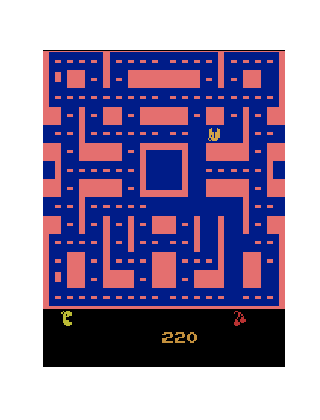
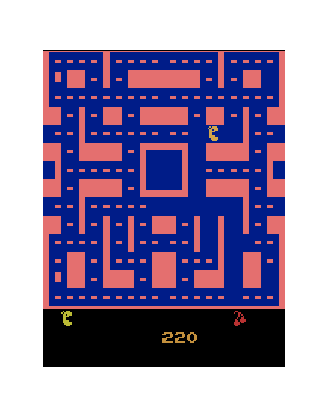
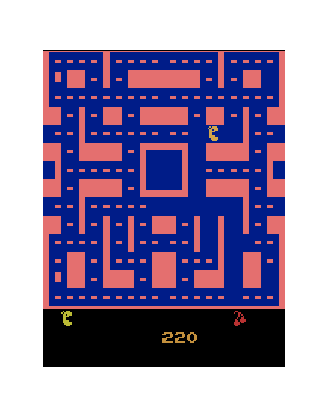
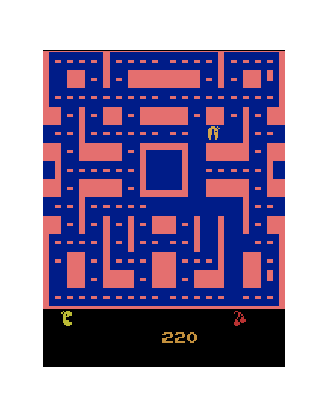
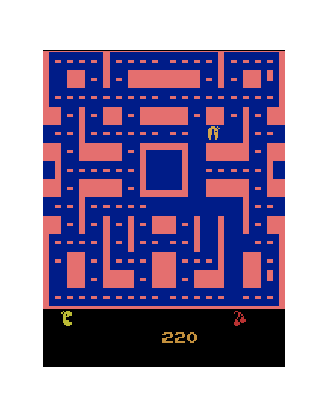
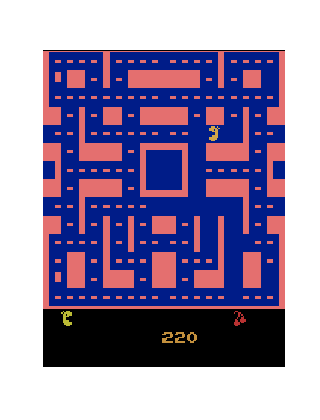
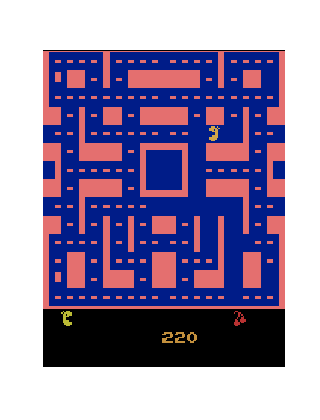
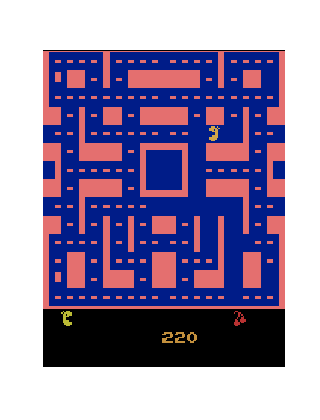
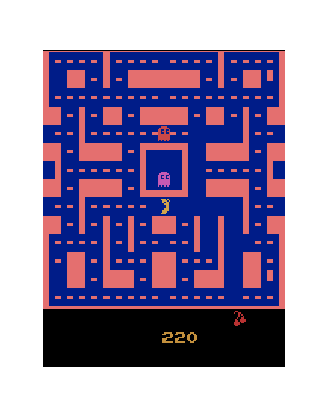
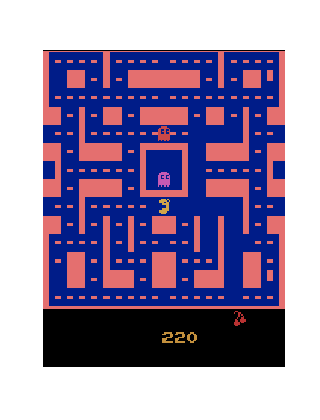
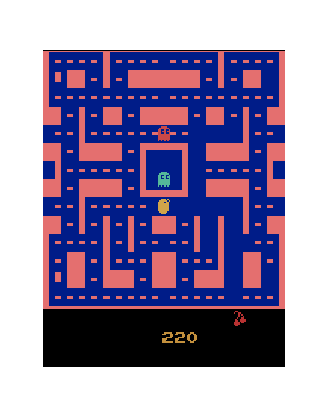
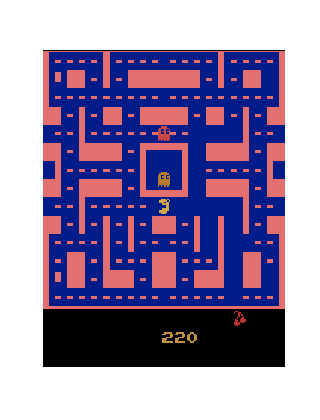
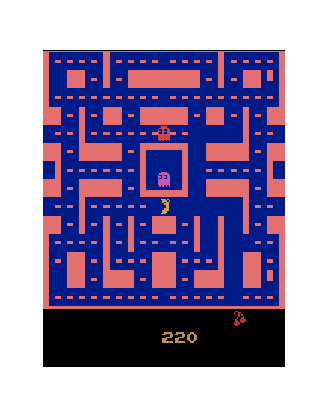
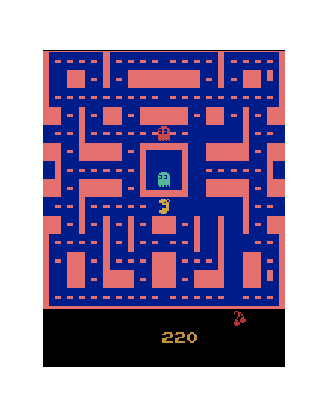
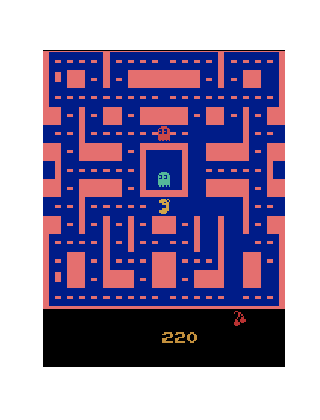
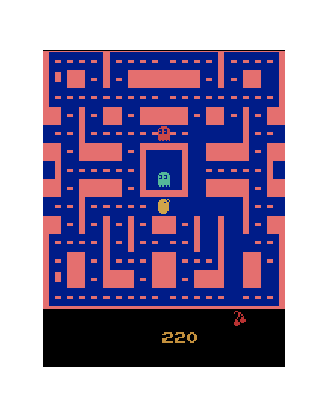
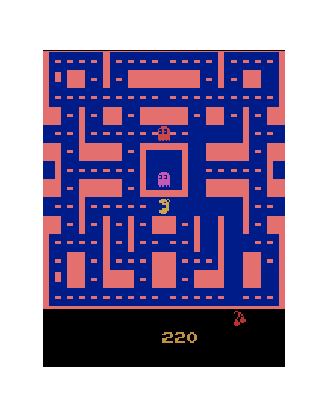
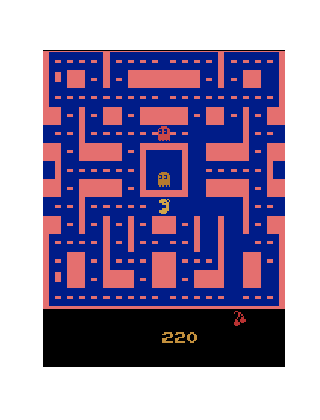
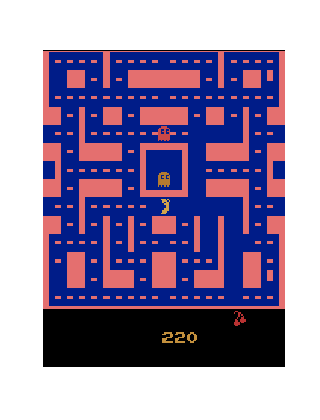
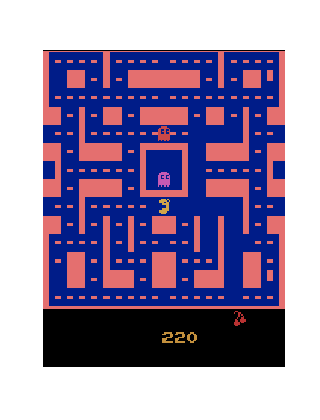
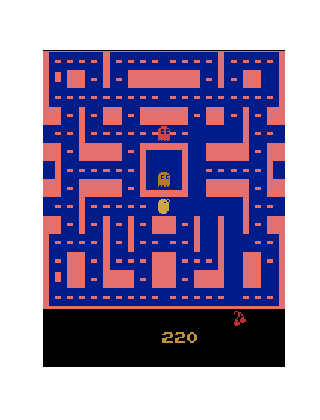
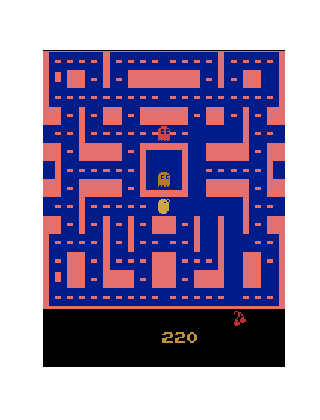
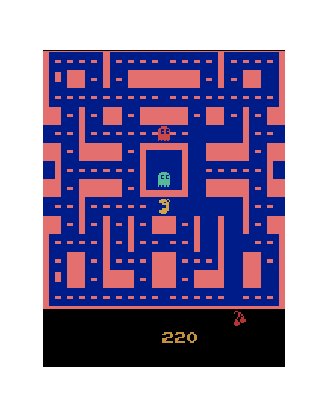
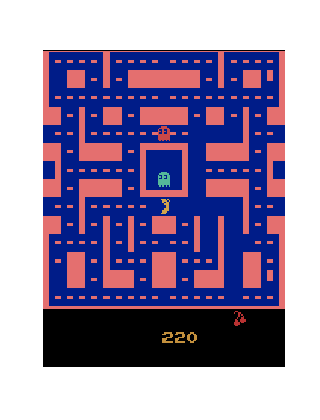
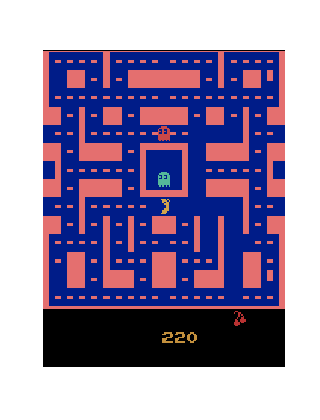
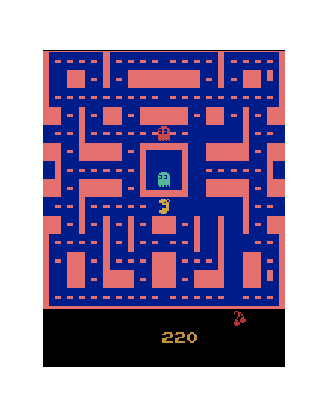
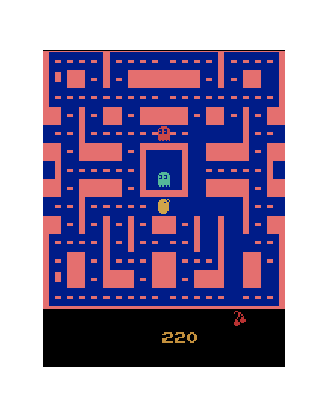
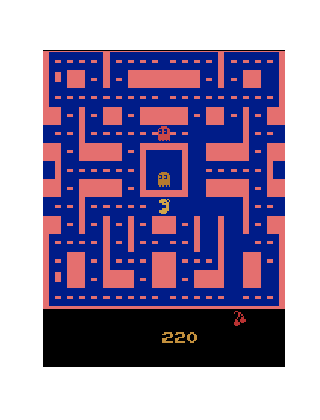
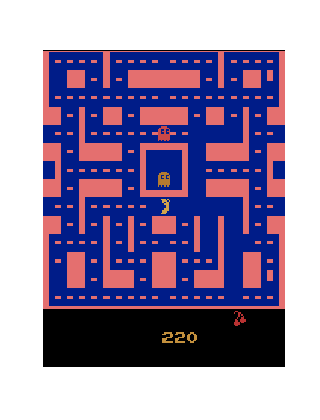
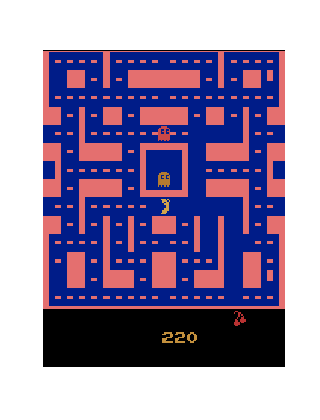
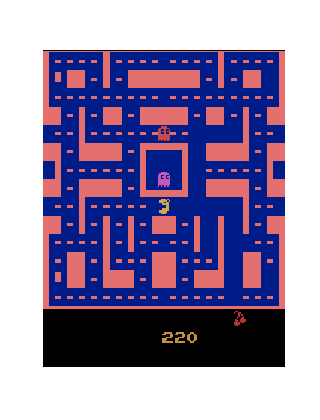
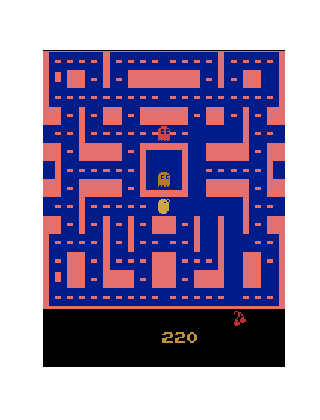
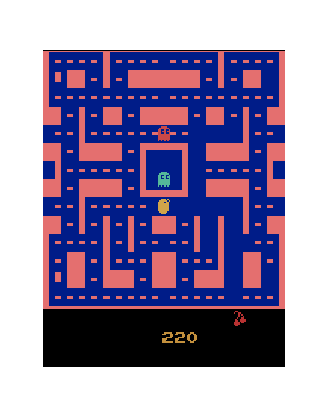
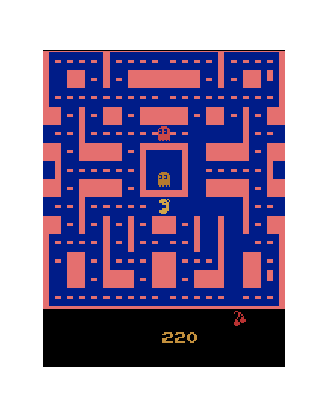
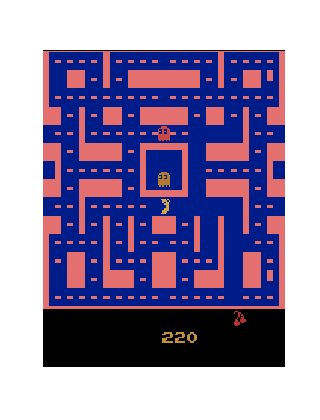
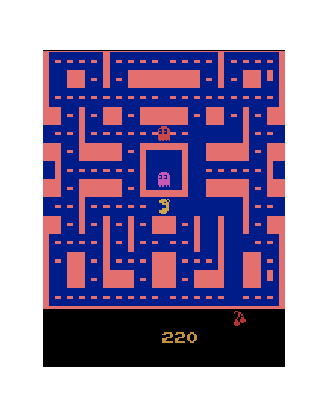
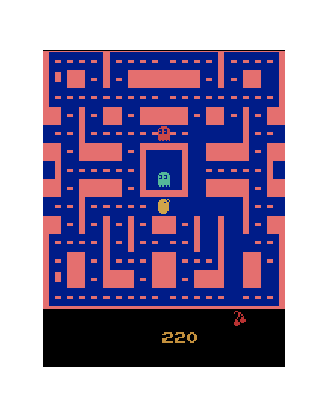
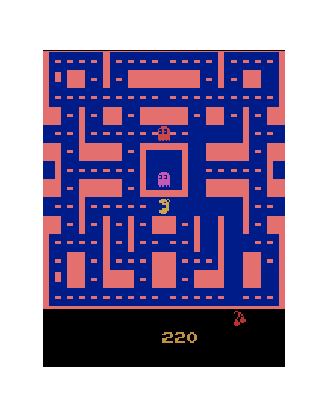
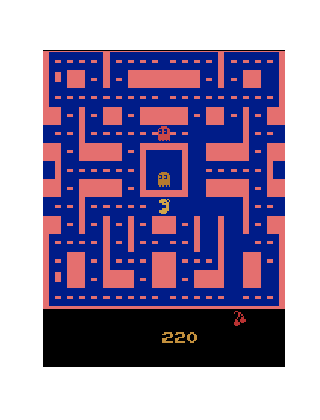
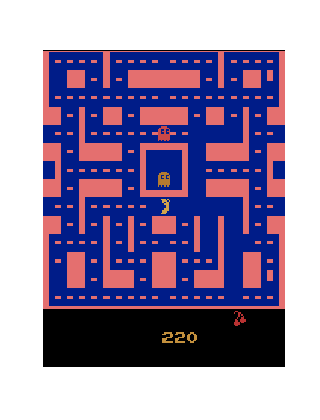
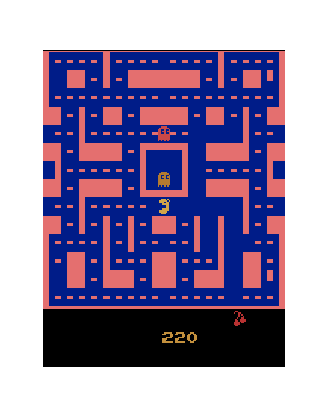
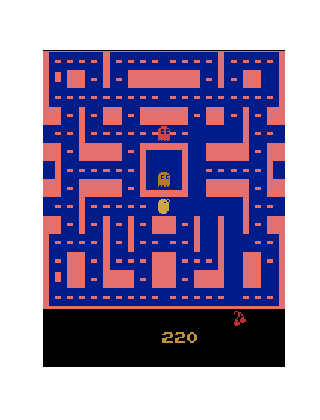
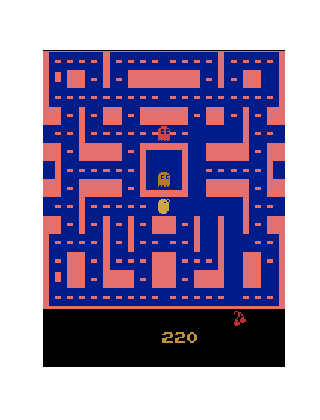
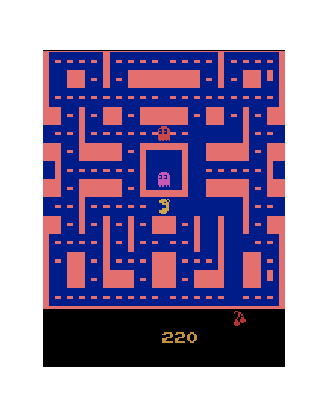
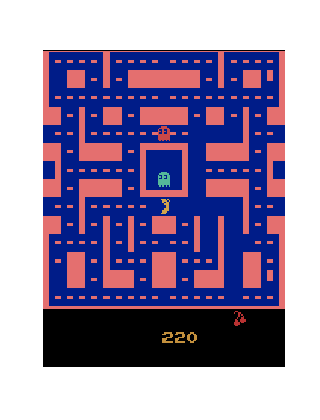
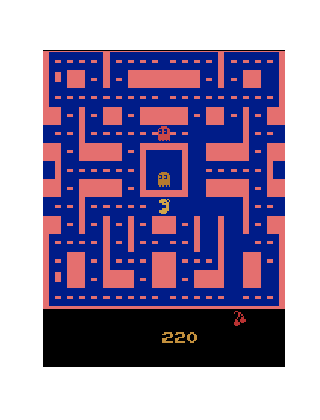
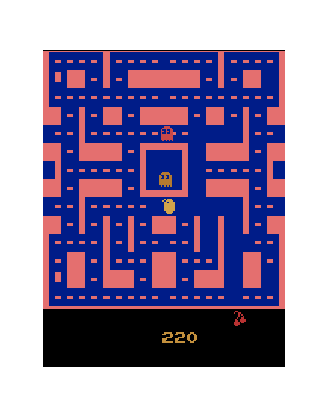
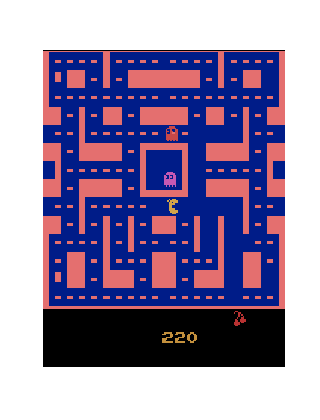
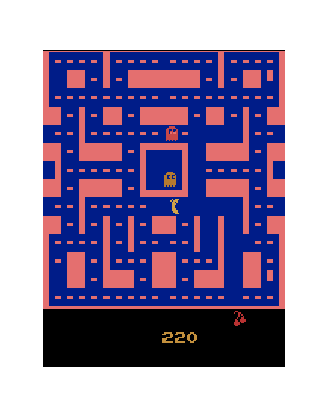
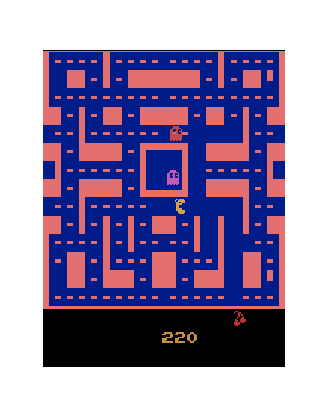
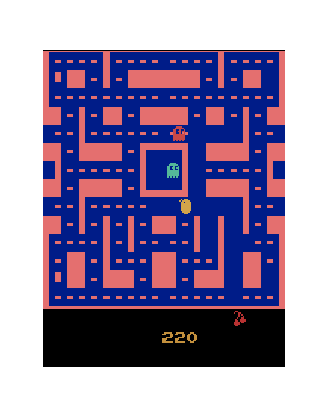
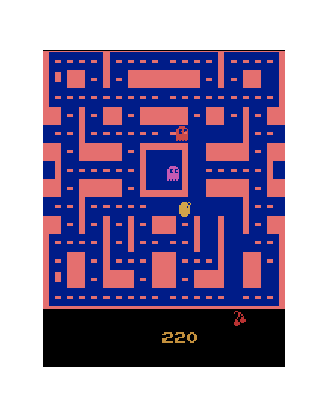
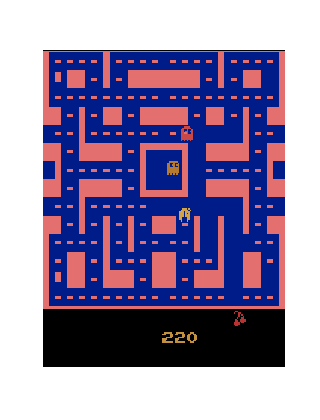
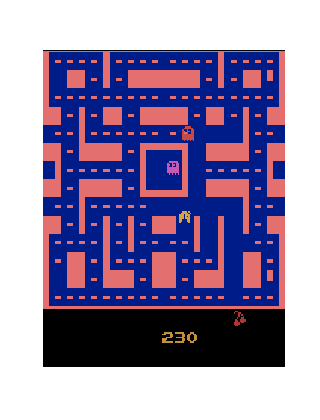
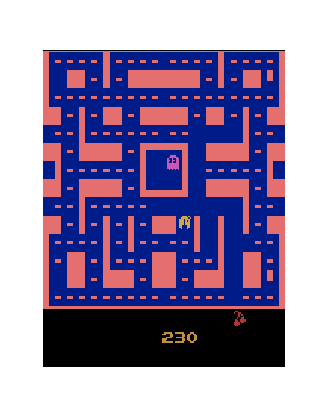
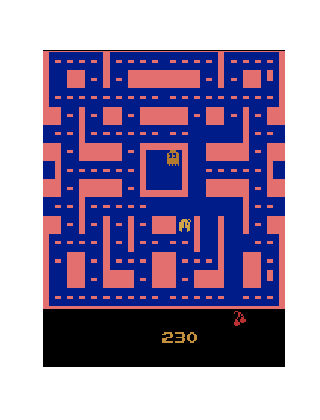
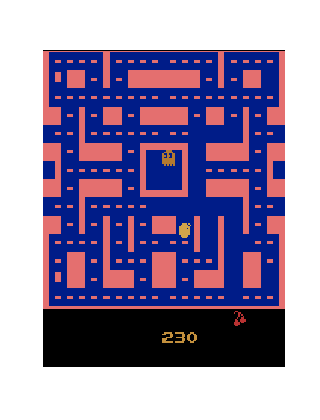
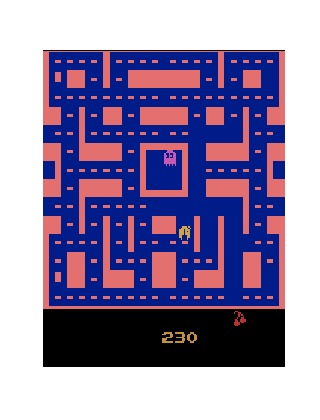
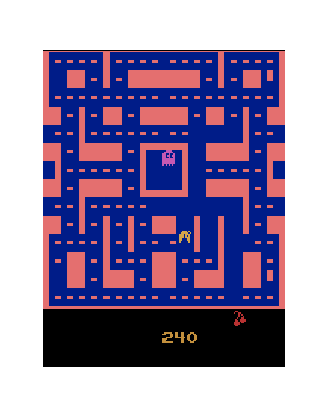
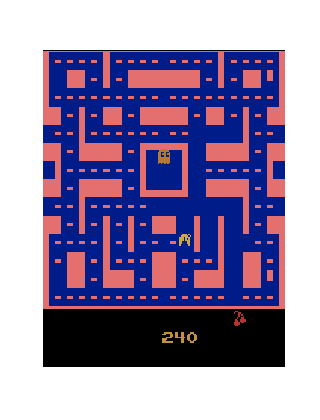
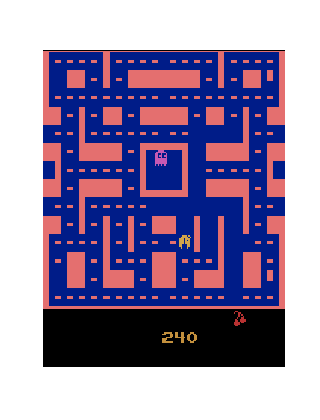
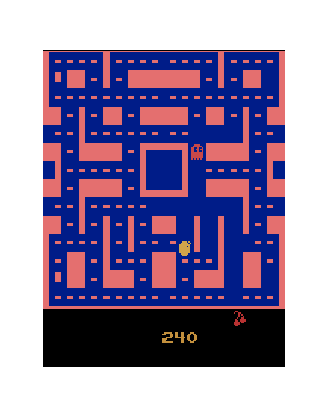
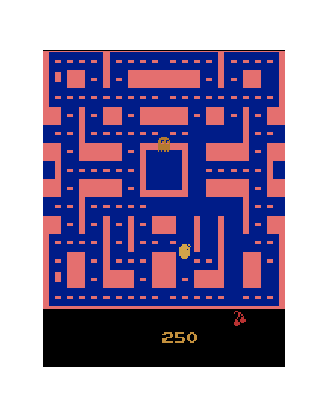
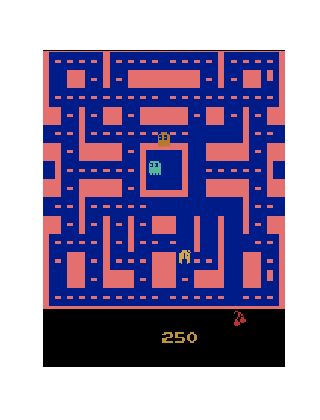
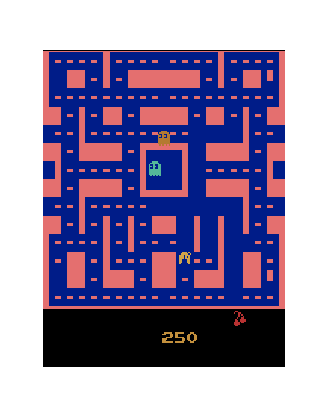
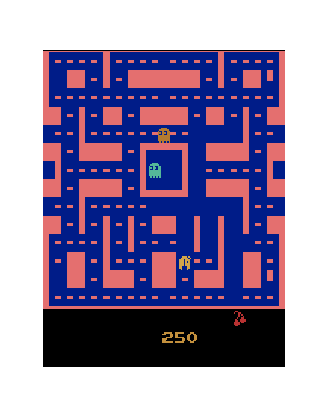
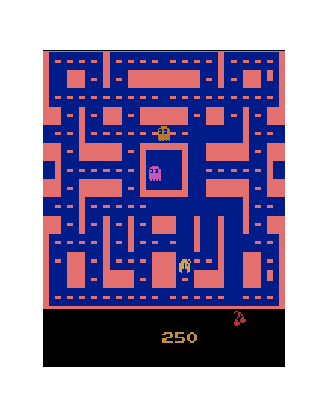
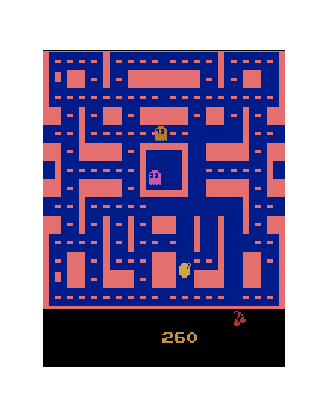
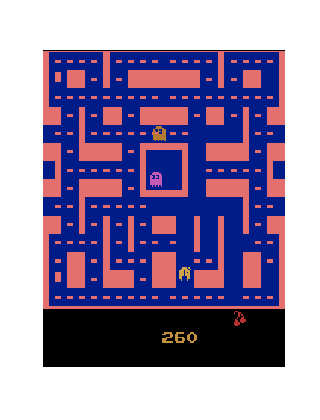
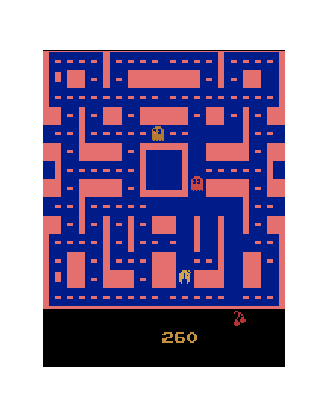
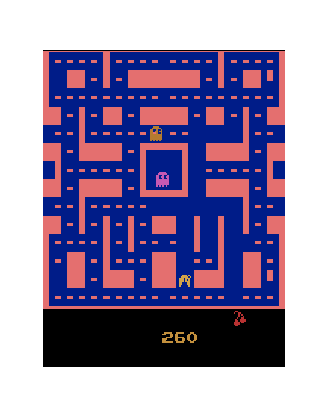
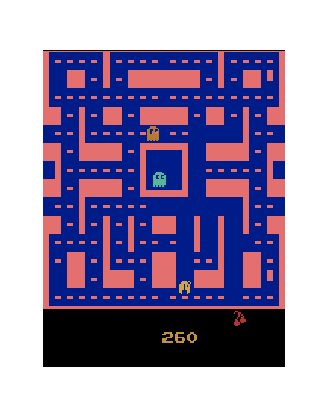
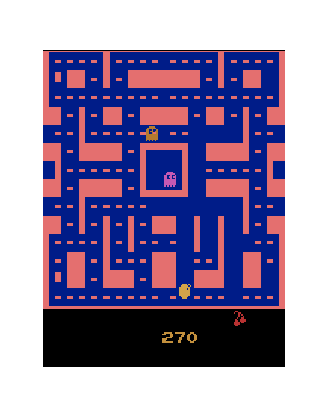
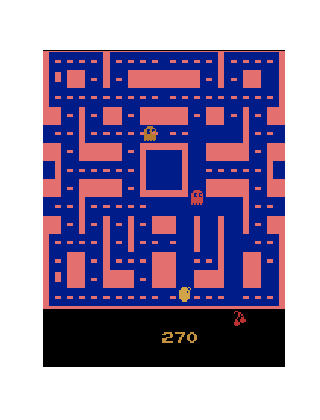
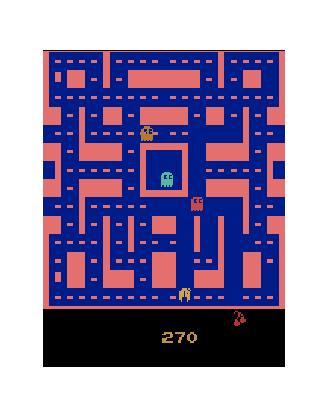
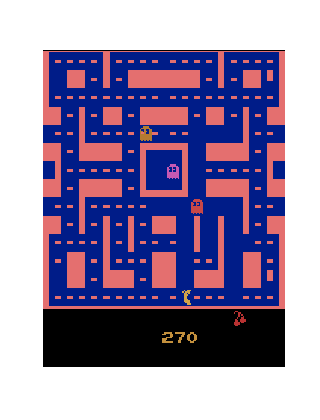
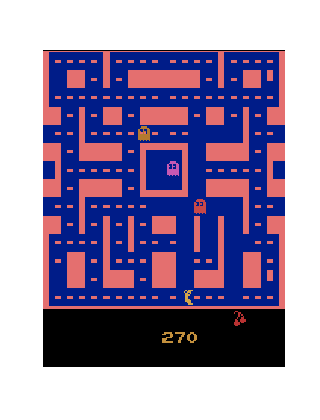
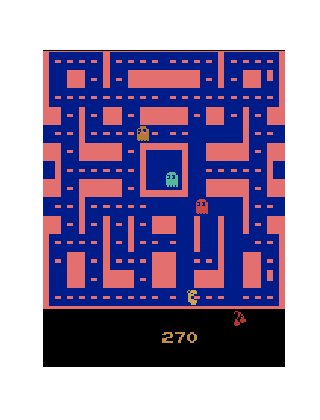
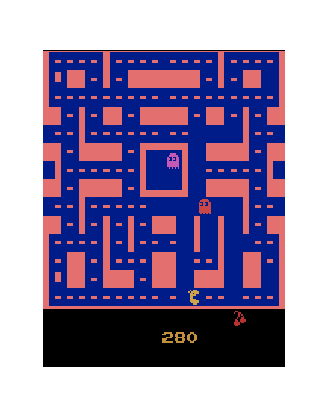
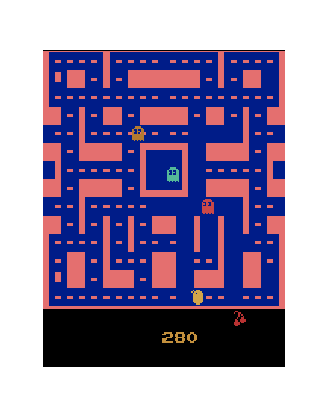
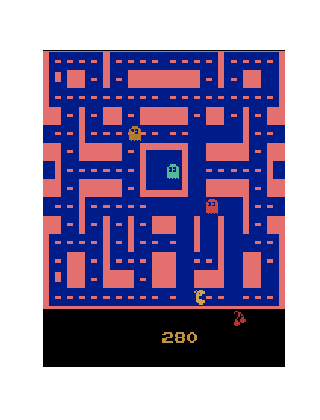
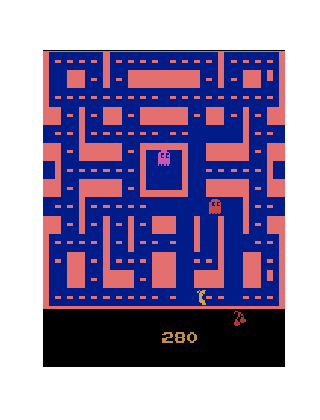
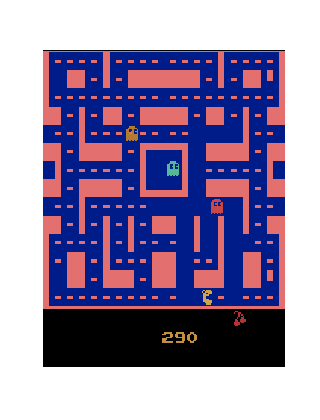
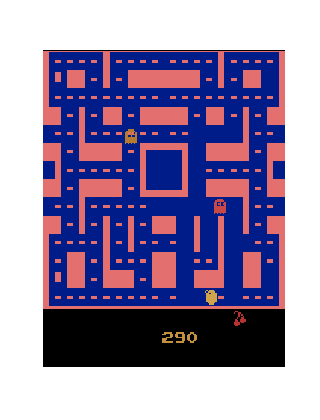
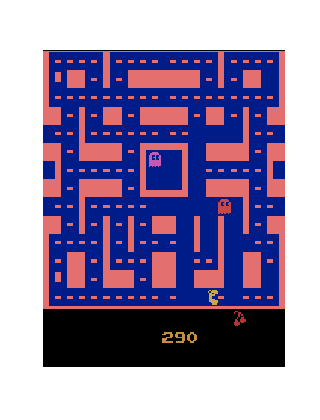
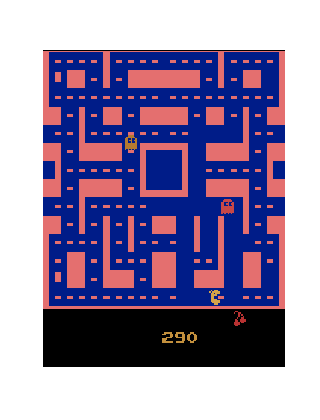
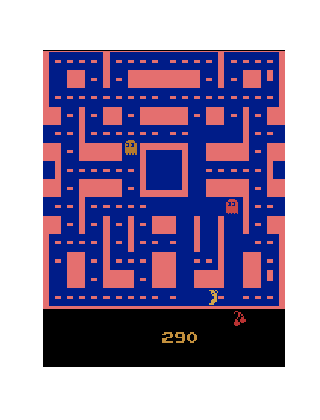
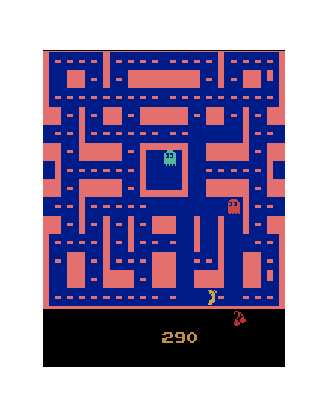
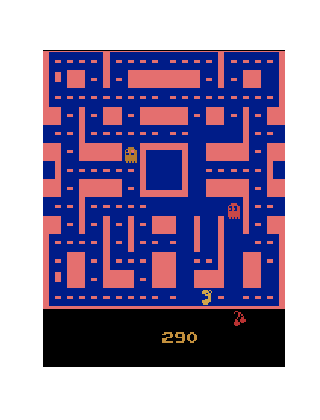
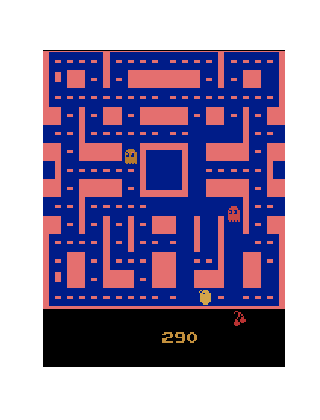
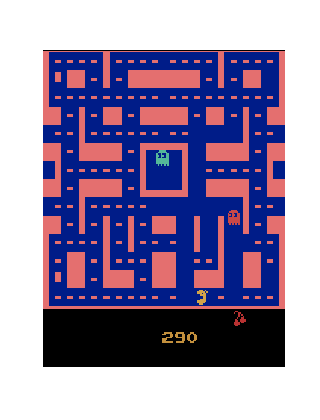
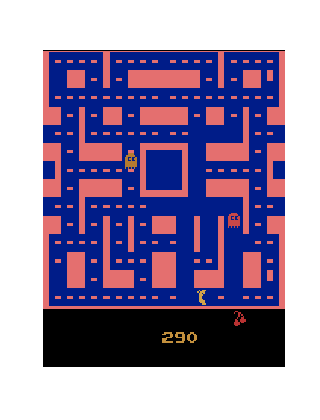
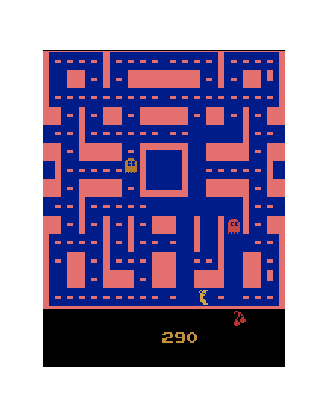
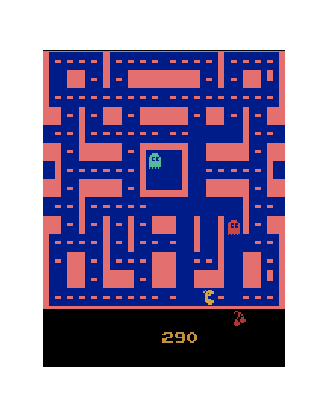
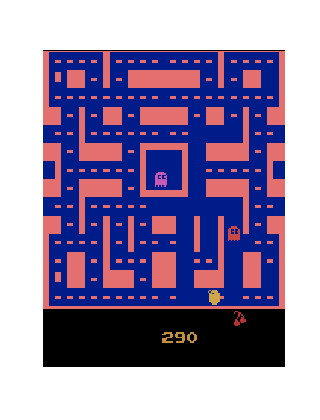
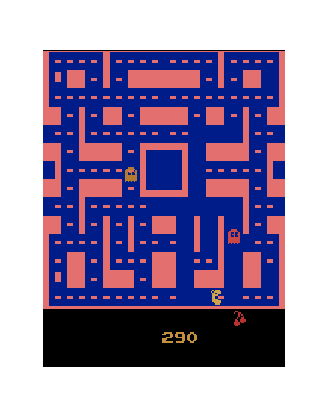
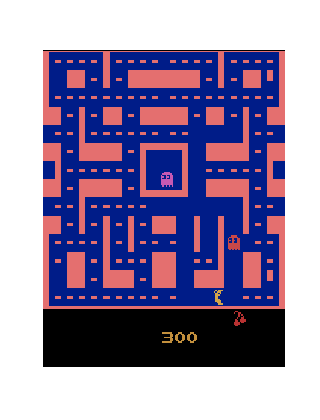
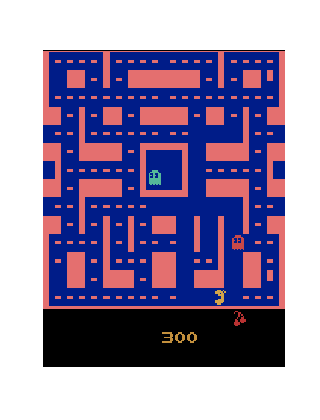
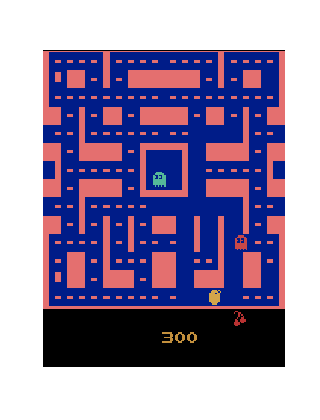
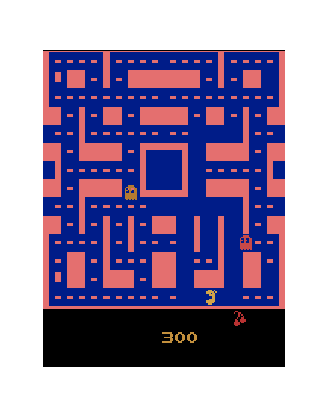
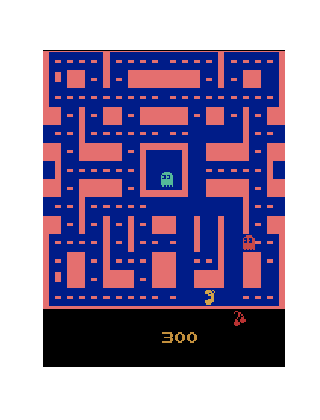
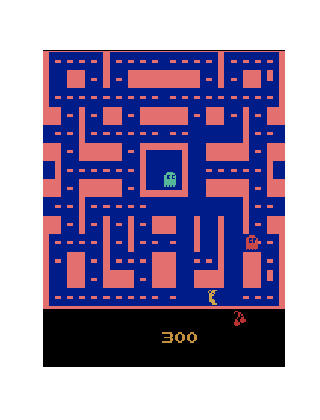
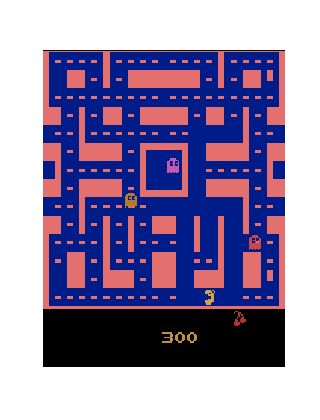
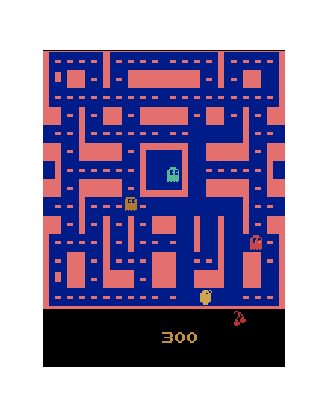
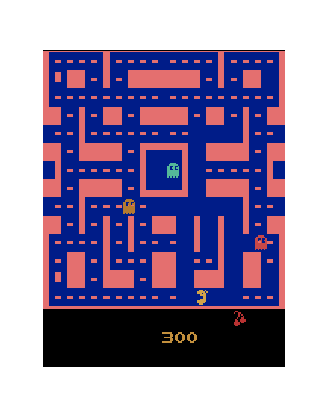
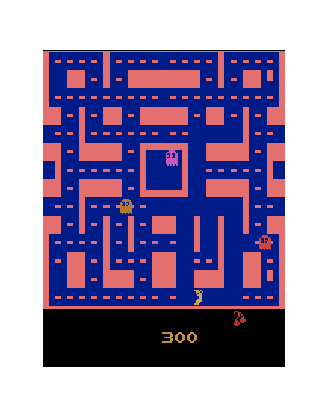
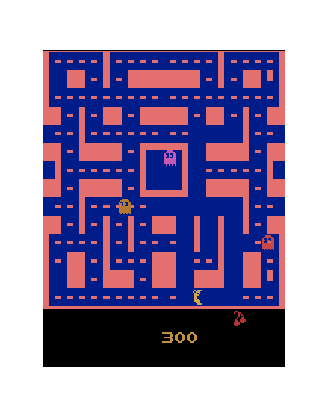
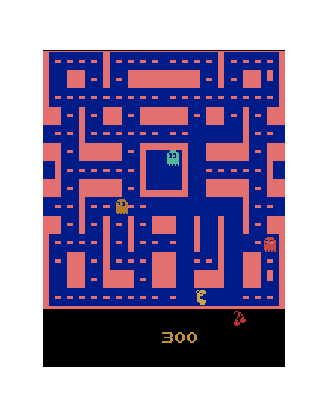
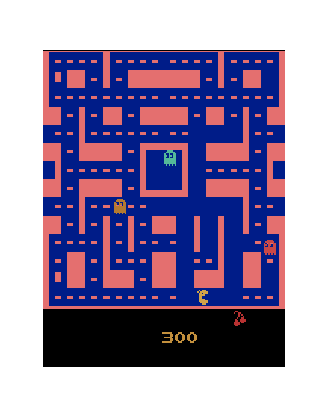
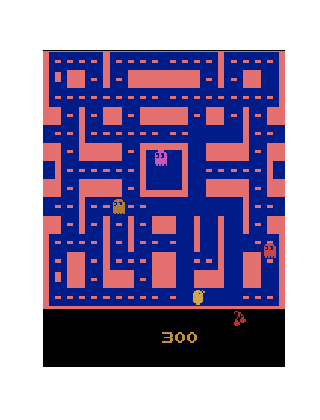
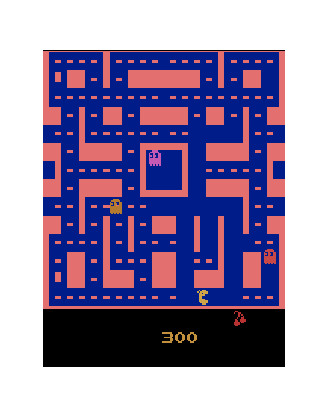
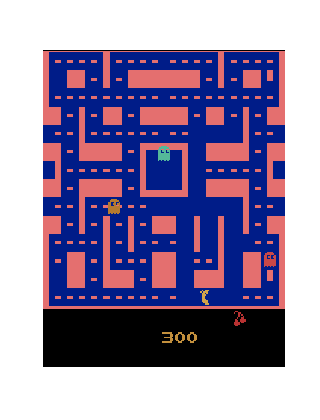
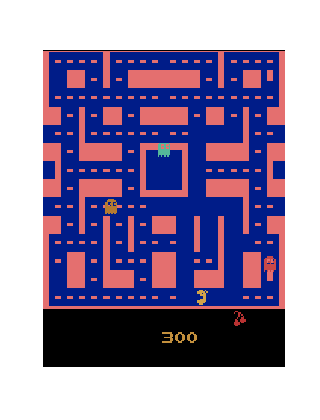
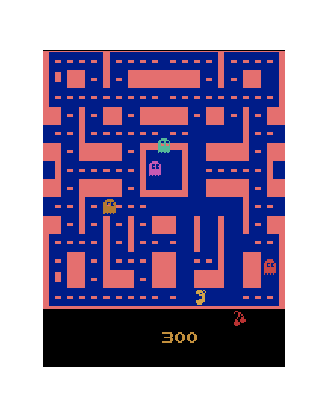
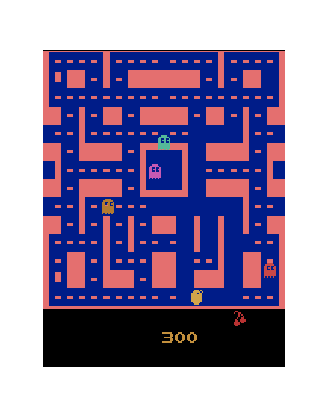
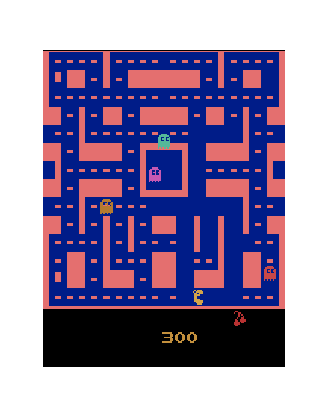
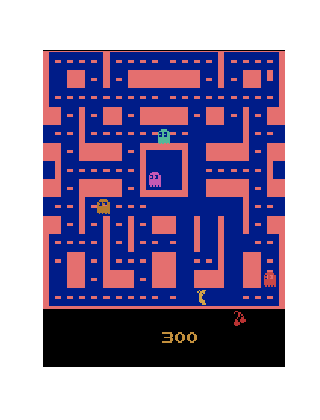
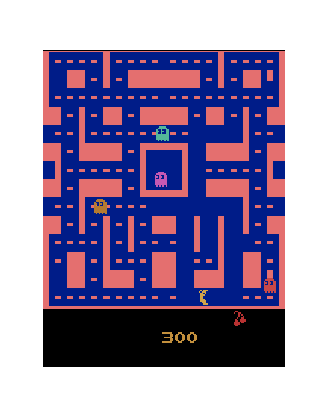
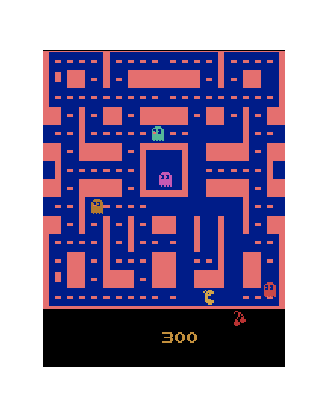
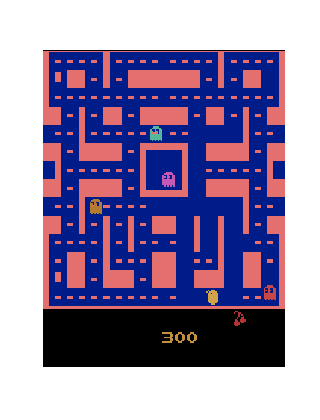
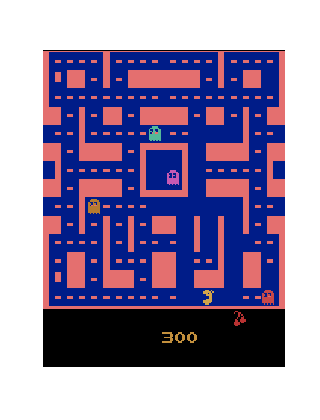
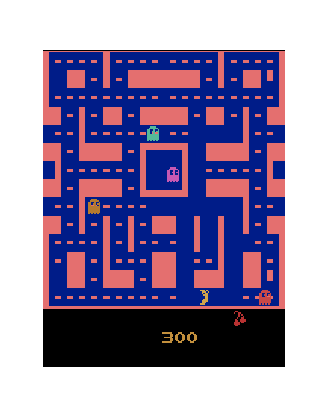
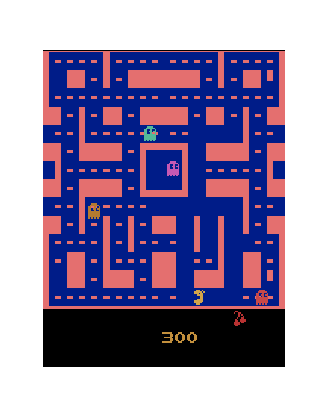
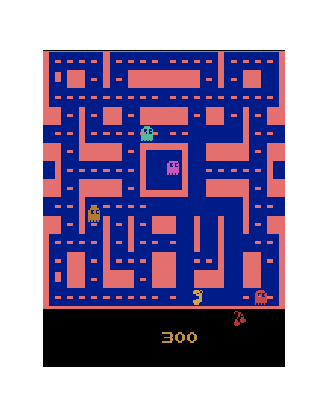
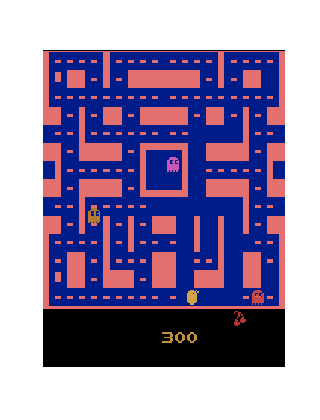
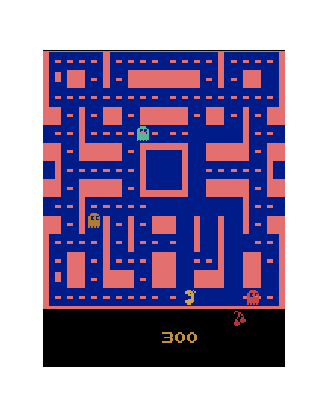
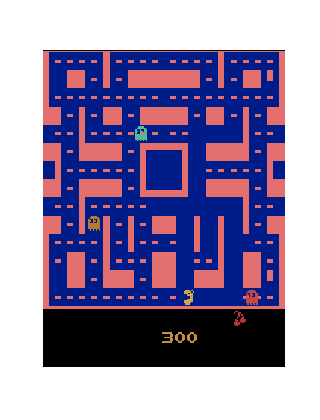
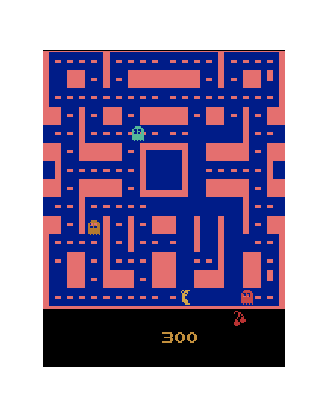
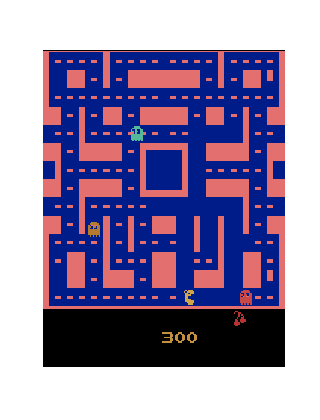
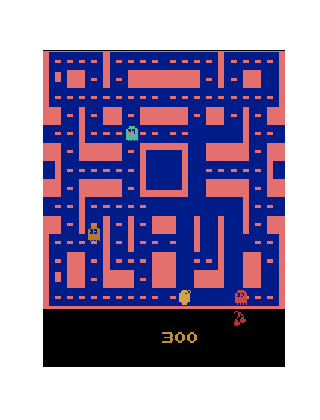
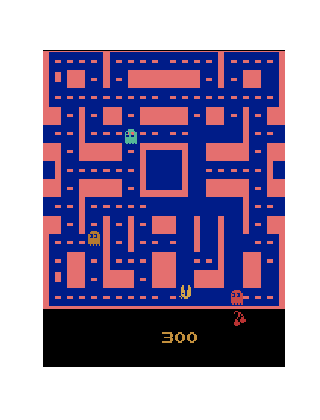
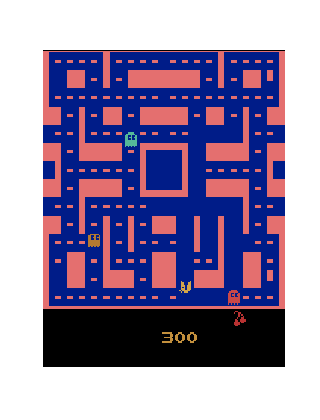
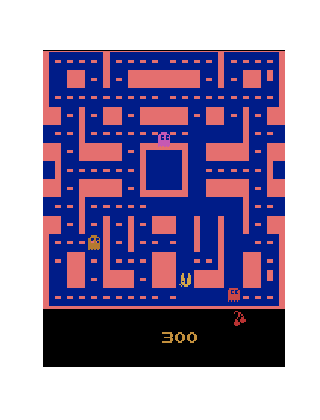
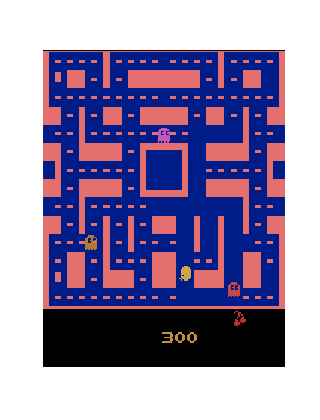
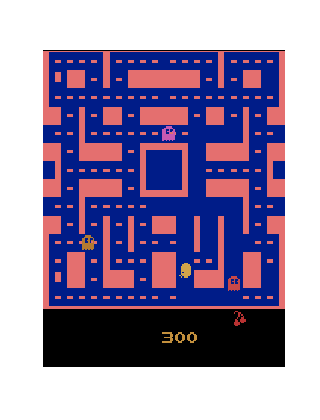
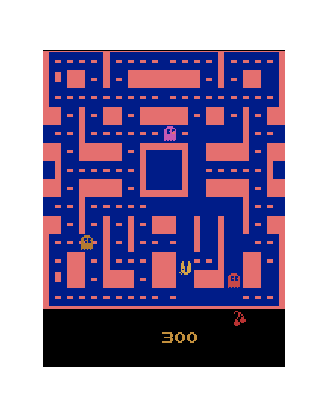
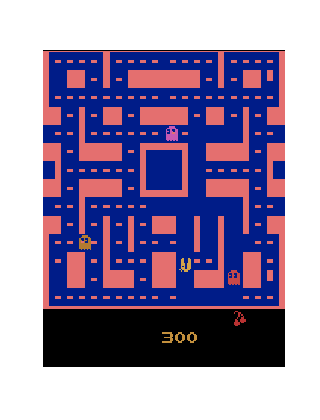
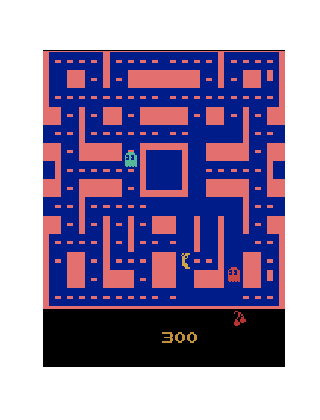
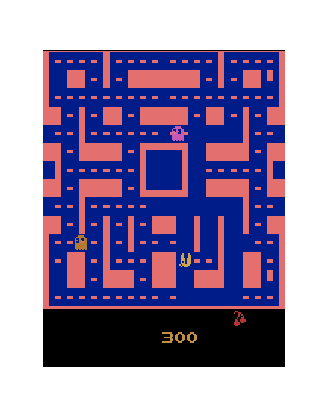
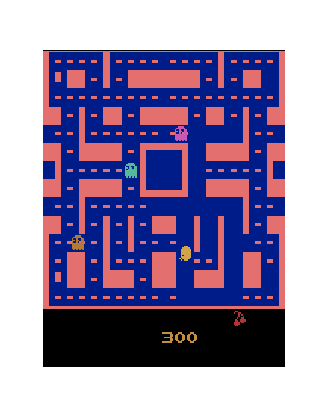
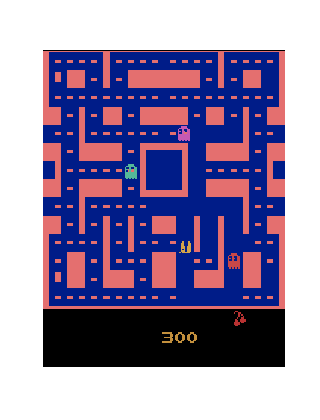
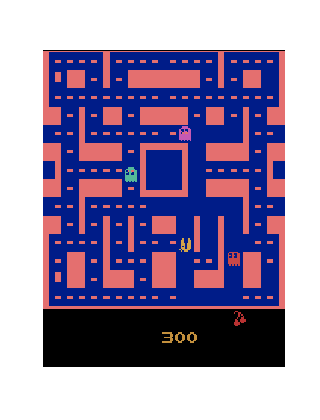
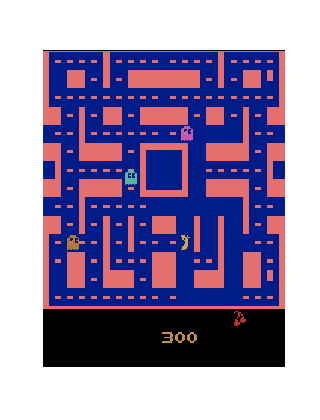
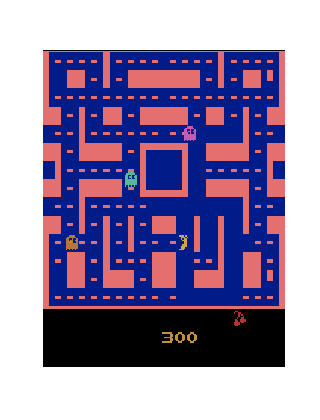
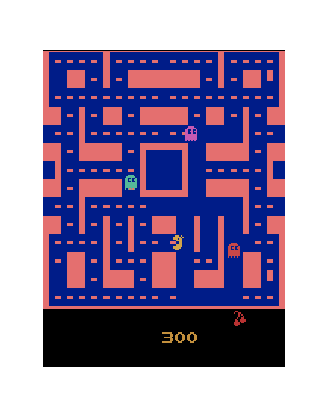
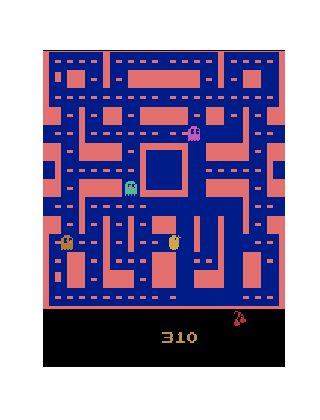
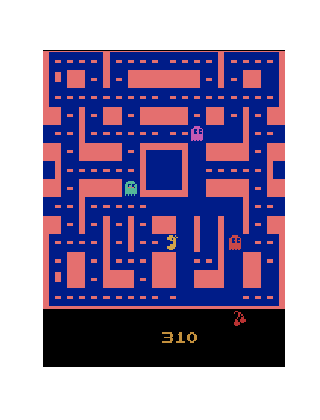
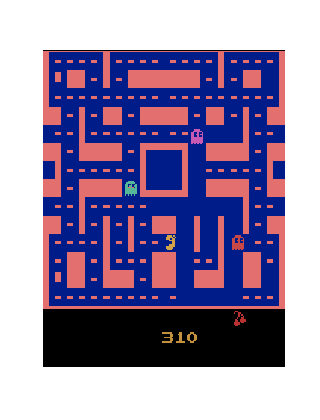
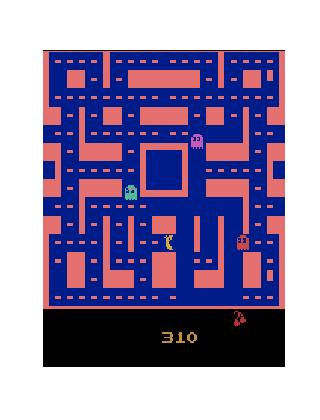
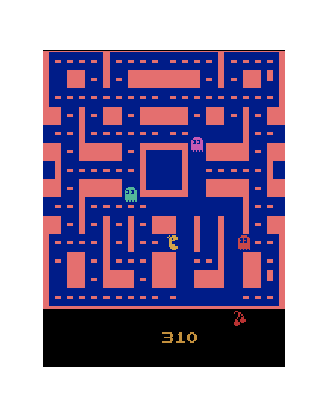
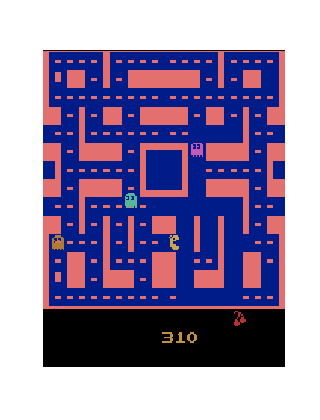
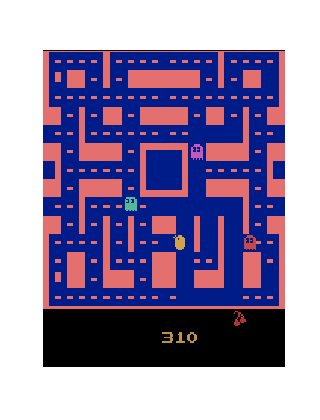
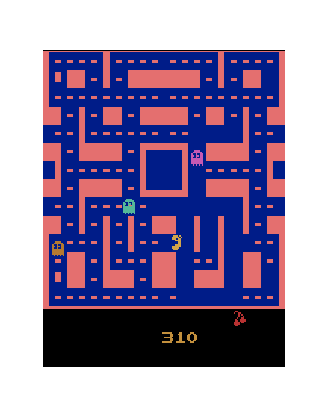
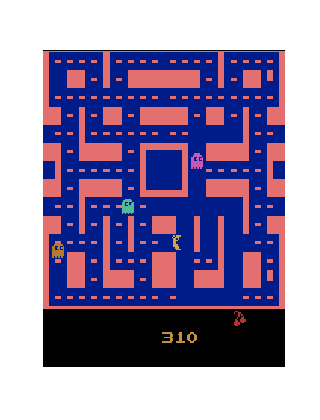
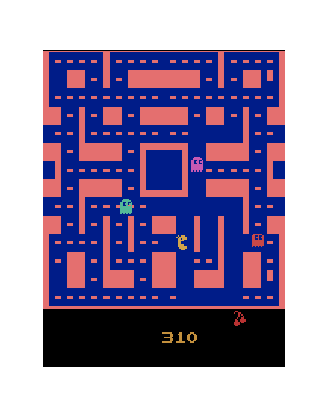
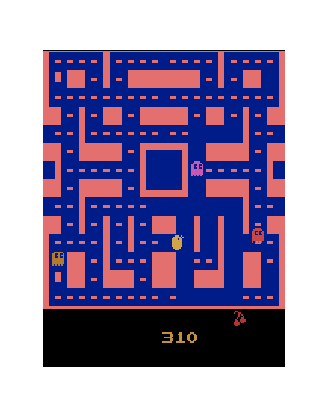
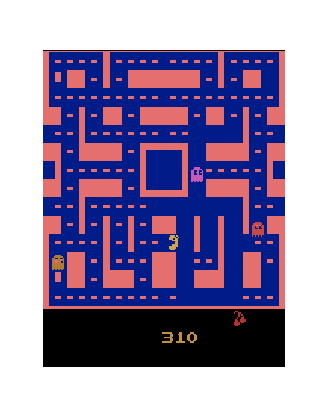
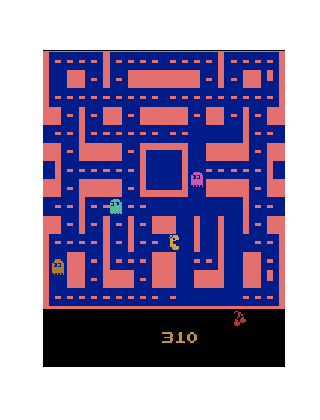
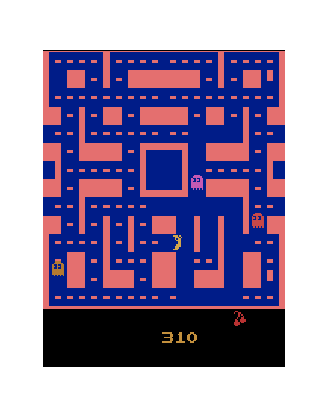
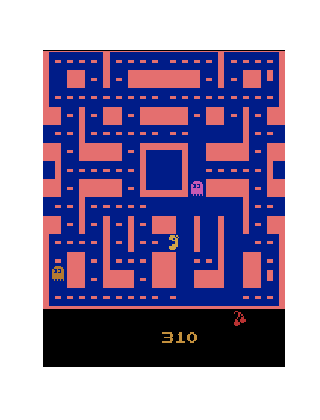
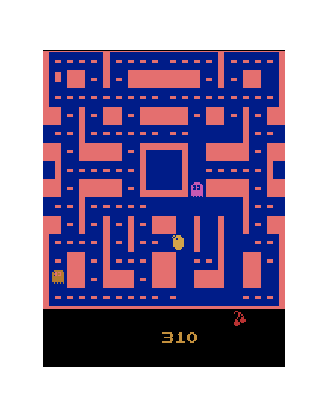
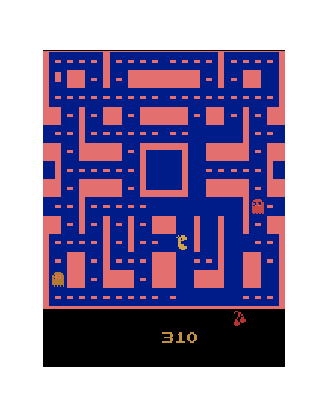
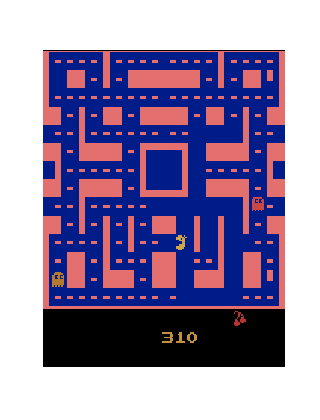
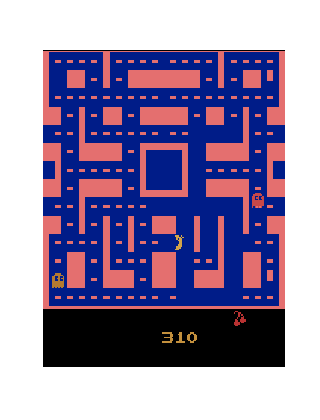
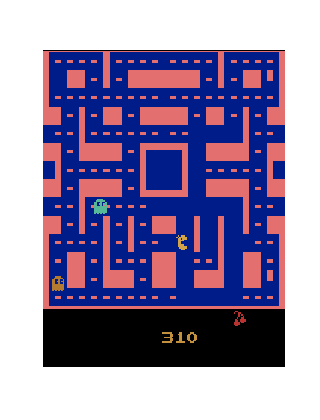
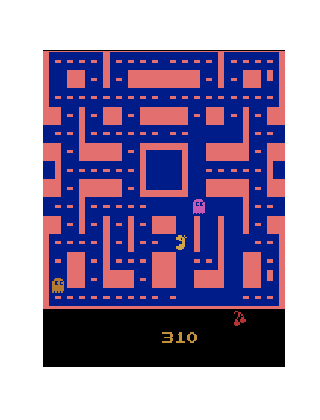
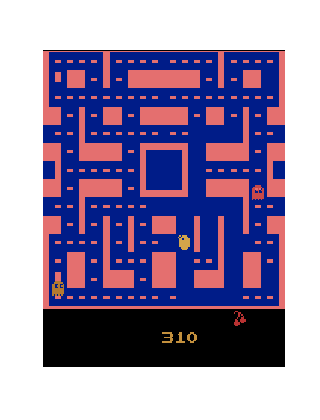
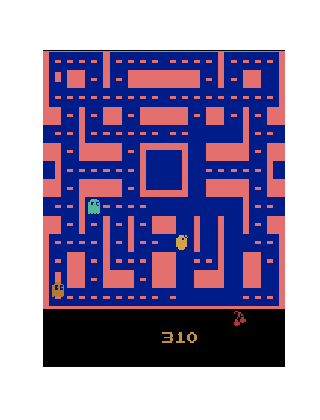
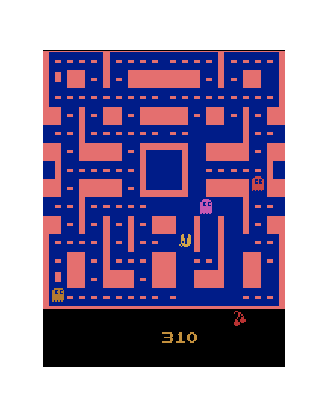
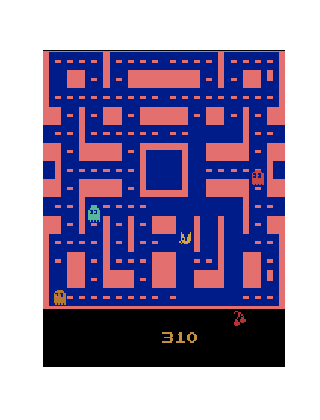
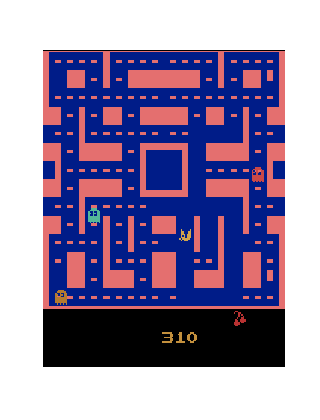
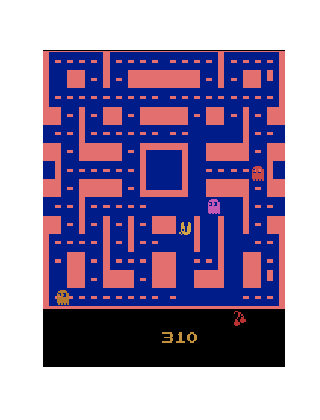
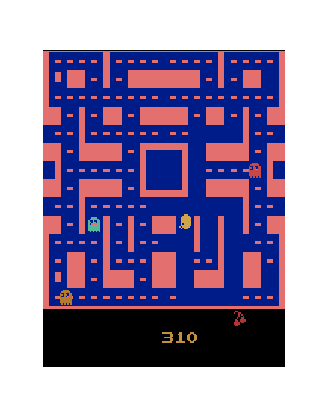
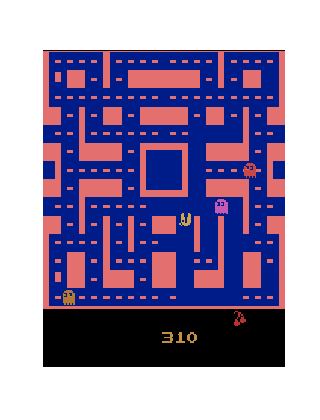
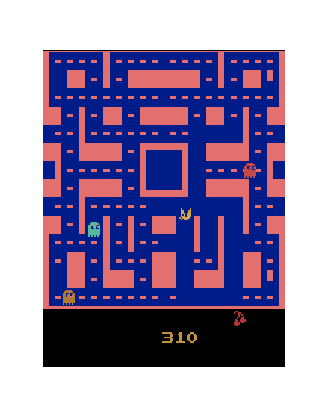
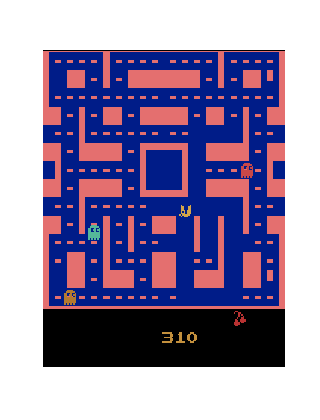
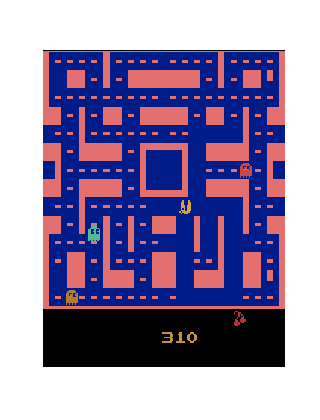
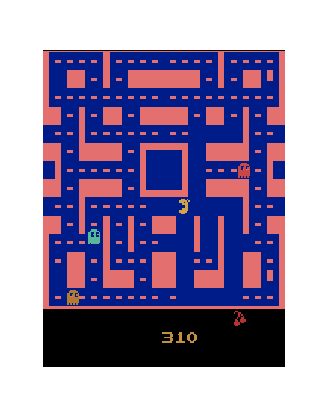
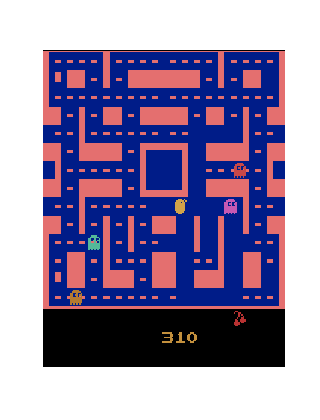
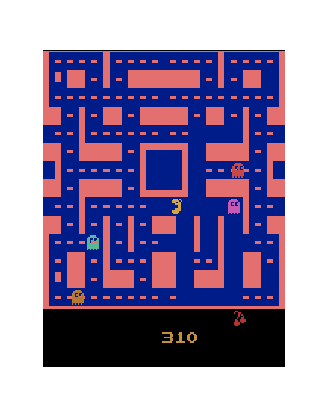
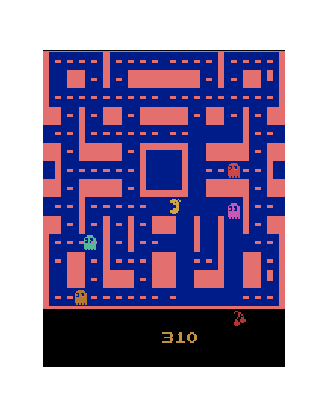
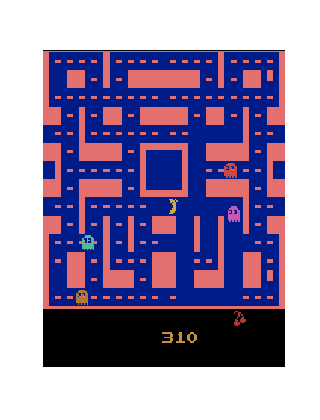
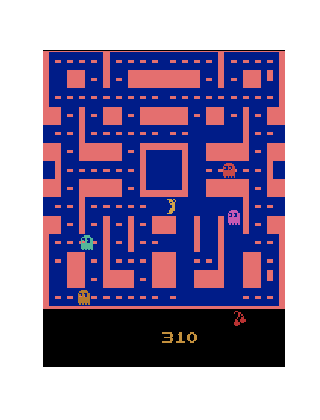
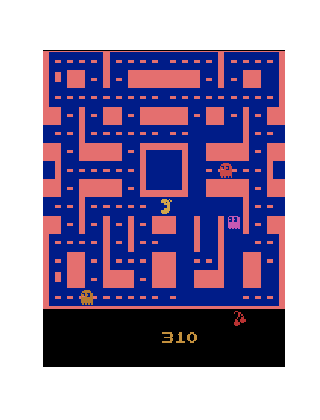
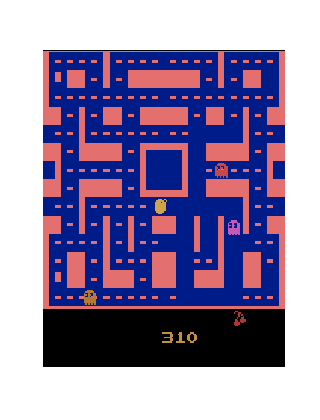
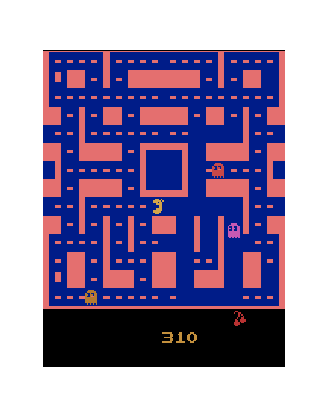
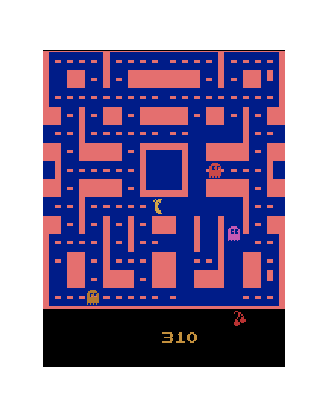
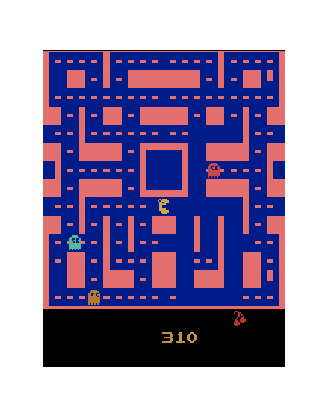
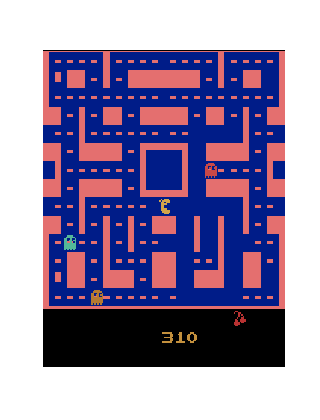
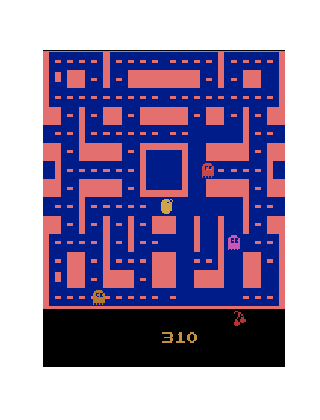
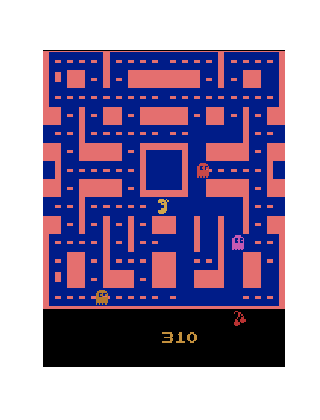
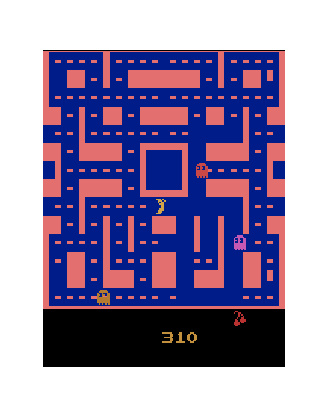
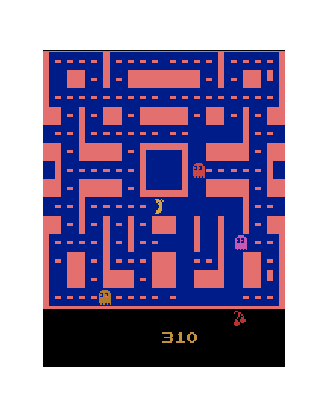
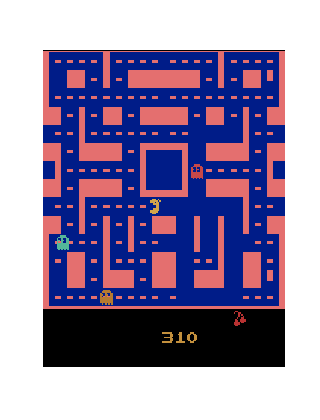
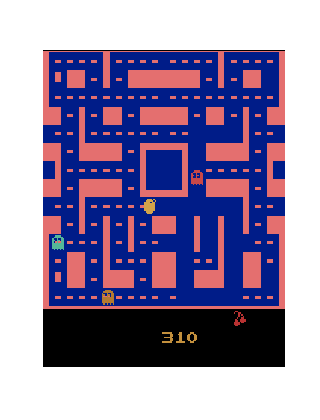
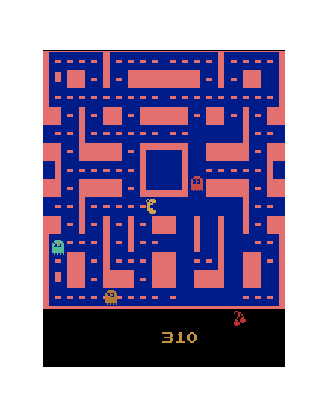
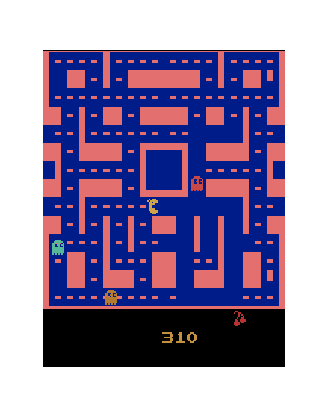
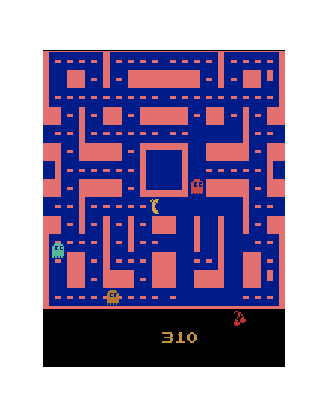
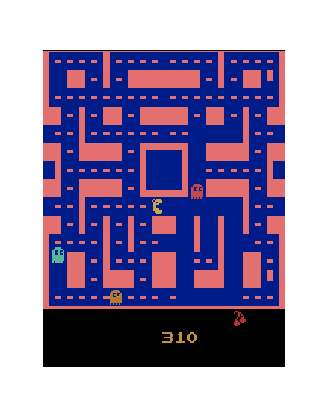
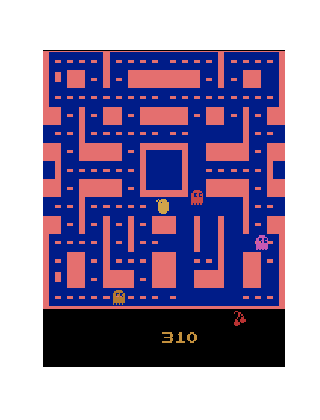
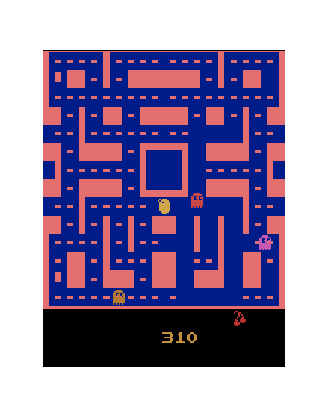
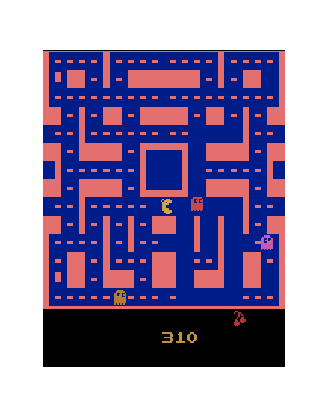
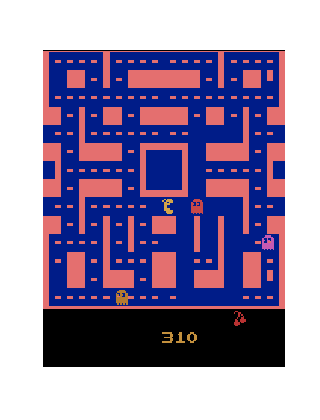
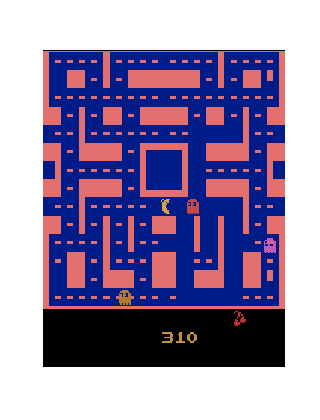
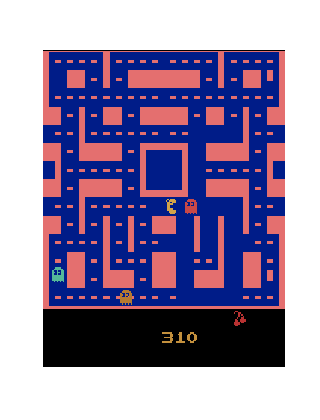
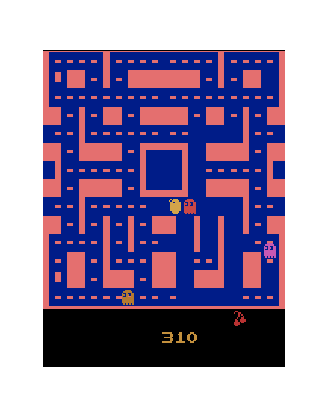
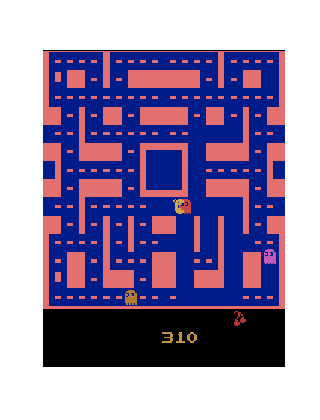
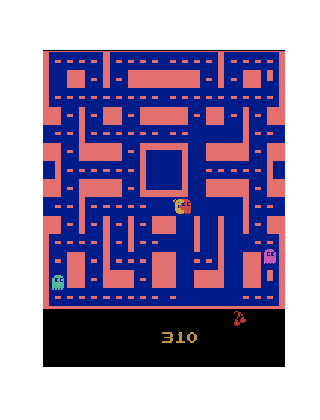
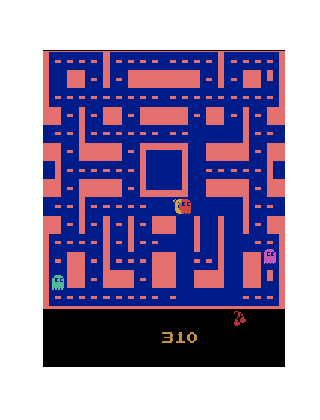
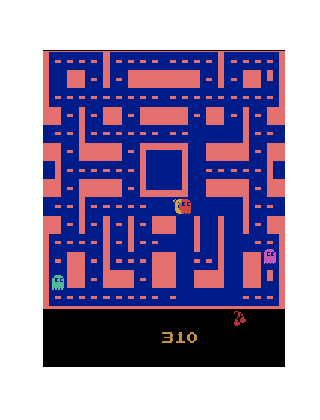
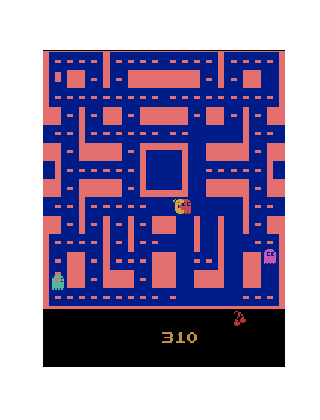
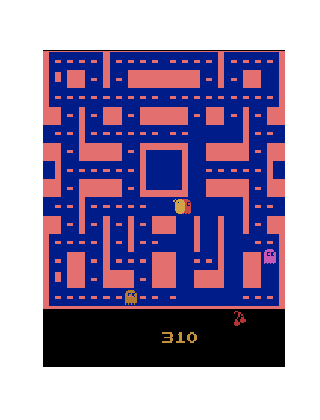
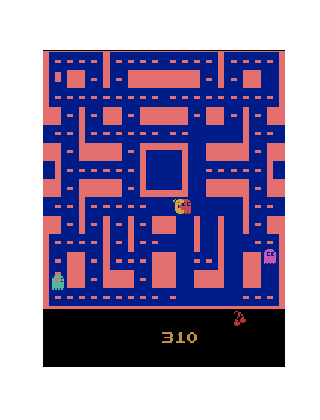
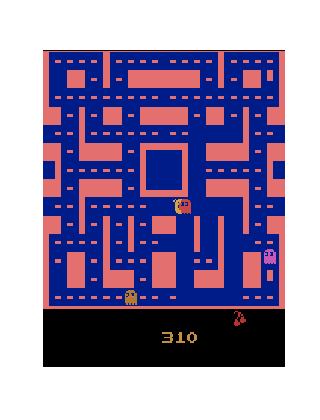
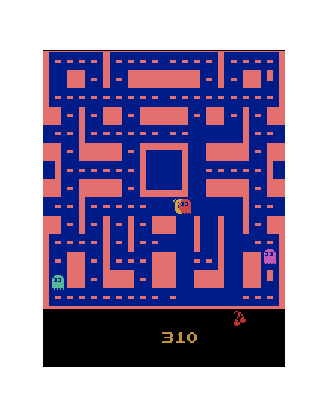
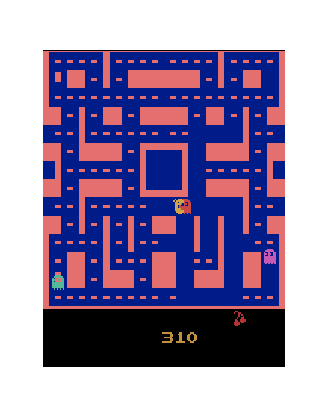
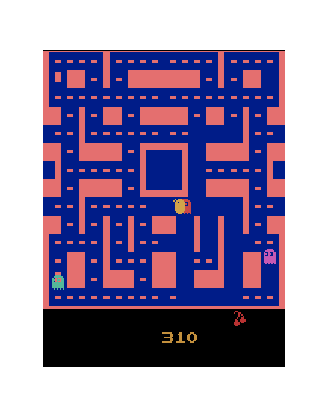
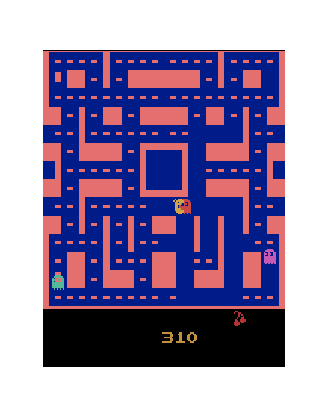
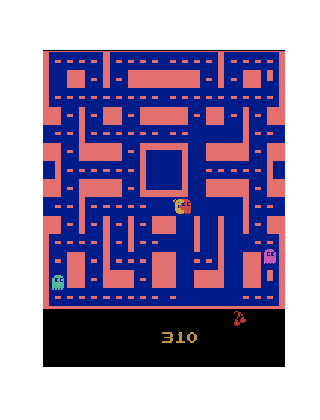
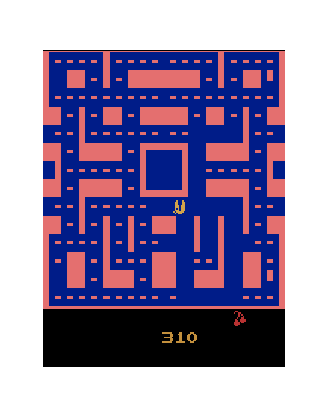
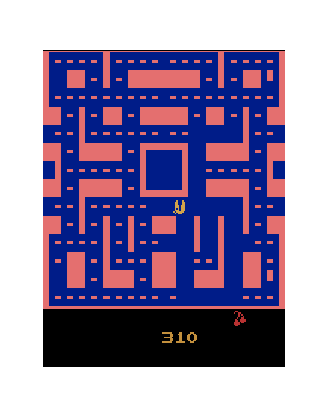
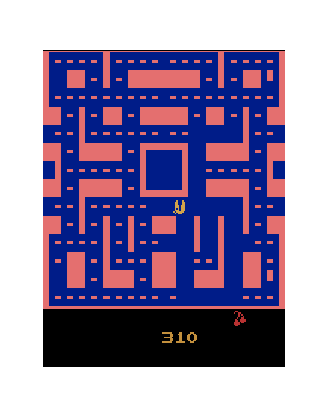
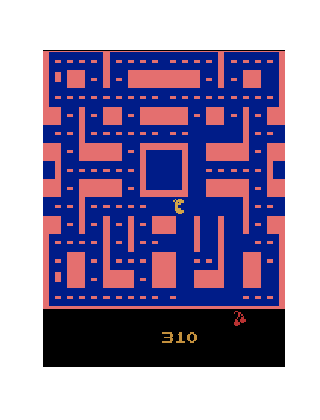
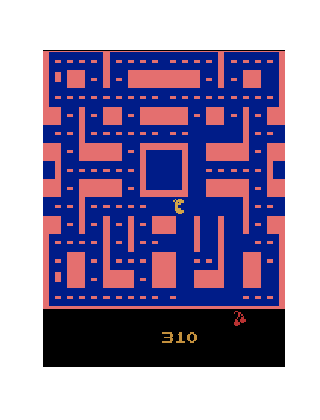
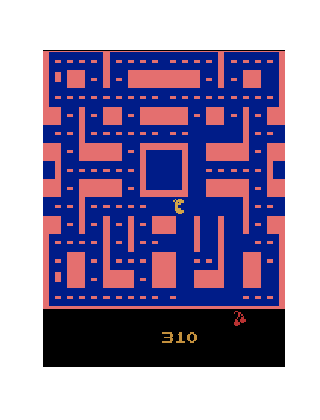
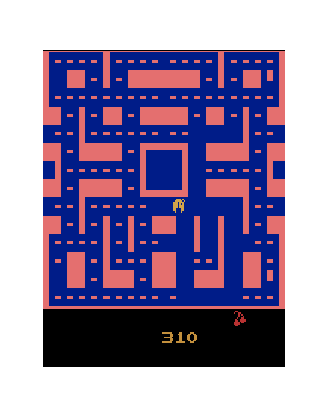
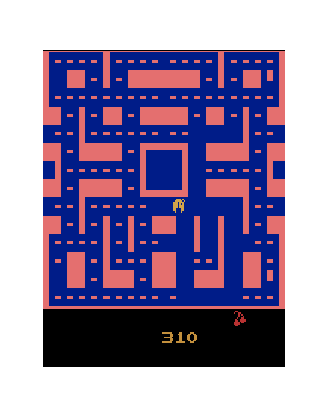
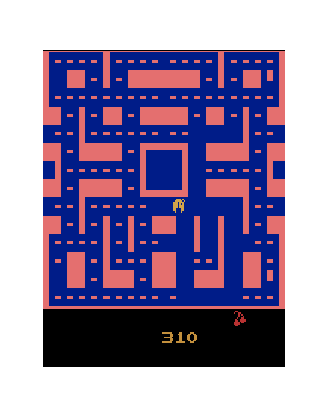
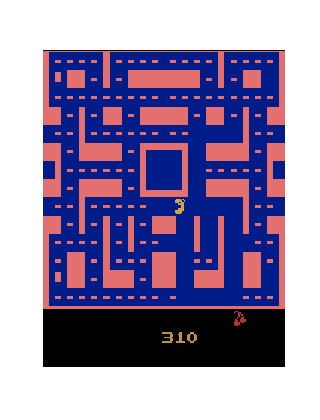
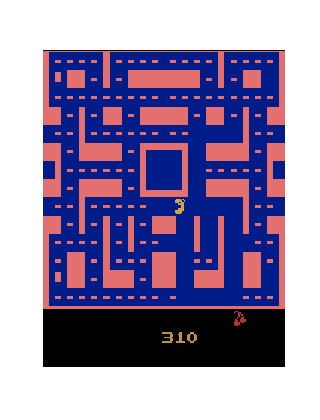
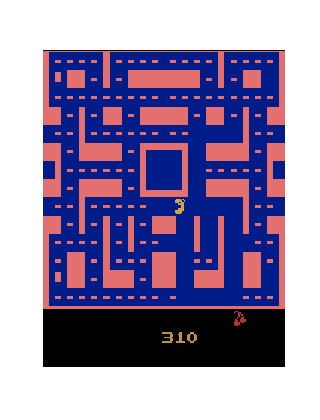
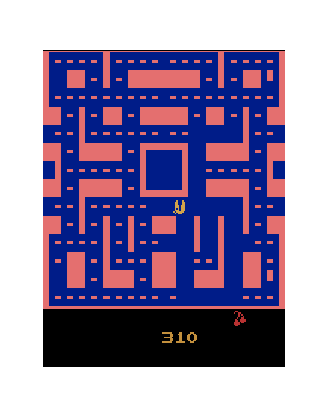
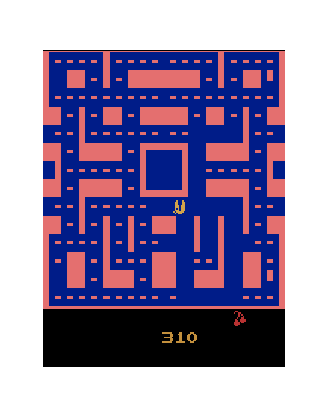

In [14]:
display_frames_as_gif(frames)